In [1334]:
#importing necessary libraries
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder, LabelEncoder, PowerTransformer
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score,roc_curve, roc_auc_score, plot_roc_curve
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor,RandomForestClassifier, BaggingClassifier
from sklearn.metrics import confusion_matrix, classification_report
from scipy.stats import norm, stats
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import statistics as st
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import time


#import plotty
import warnings
warnings.filterwarnings('ignore')

In [1335]:
df = pd.read_excel(r"C:\Users\hp-pc\Desktop\Internship22\Customer_retention_case_study\Customer_retention_dataset_1\Customer_retention_dataset\Customer_retention_dataset.xlsx")
df.head()

1Gender of respondent 2 How old are you?   \
0                  Male         31-40 years   
1                Female         21-30 years   
2                Female         21-30 years   
3                  Male         21-30 years   
4                Female         21-30 years   

  3 Which city do you shop online from?  \
0                                 Delhi   
1                                 Delhi   
2                         Greater Noida   
3                               Karnal    
4                            Bangalore    

   4 What is the Pin Code of where you shop online from?  \
0                                             110009       
1                                             110030       
2                                             201308       
3                                             132001       
4                                             530068       

  5 Since How Long You are Shopping Online ?  \
0                              Above 4 years   
1                              Above 4 years   
2                                  3-4 years   
3                                  3-4 years   
4                                  2-3 years   

  6 How many times you have made an online purchase in the past 1 year?  \
0                                        31-40 times                      
1                                 41 times and above                      
2                                 41 times and above                      
3                                 Less than 10 times                      
4                                        11-20 times                      

  7 How do you access the internet while shopping on-line?  \
0                                            Dial-up         
1                                              Wi-Fi         
2                                    Mobile Internet         
3                                    Mobile Internet         
4                                              Wi-Fi         

  8 Which device do you use to access the online shopping?  \
0                                            Desktop         
1                                         Smartphone         
2                                         Smartphone         
3                                         Smartphone         
4                                         Smartphone         

  9 What is the screen size of your mobile device?\t\t\t\t\t\t                                          \
0                                             Others                                                     
1                                         4.7 inches                                                     
2                                         5.5 inches                                                     
3                                         5.5 inches                                                     
4                                         4.7 inches                                                     

  10 What is the operating system (OS) of your device?\t\t\t\t                                            \
0                              Window/windows Mobile                                                       
1                                            IOS/Mac                                                       
2                                            Android                                                       
3                                            IOS/Mac                                                       
4                                            IOS/Mac                                                       

   ... Longer time to get logged in (promotion, sales period)  \
0  ...                                          Amazon.in       
1  ...                            Amazon.in, Flipkart.com       
2  ...                                         Myntra.com       
3  ...                                       Snapdeal.com       
4 

In [1336]:
df1 = pd.read_excel(r"C:\Users\hp-pc\Desktop\Internship22\Customer_retention_case_study\Customer_retention_dataset_1\Customer_retention_dataset\Customer_retention_codebook.xlsx")
df1.head()

1Gender of respondent  2 How old are you?   \
0                      0                    3   
1                      1                    2   
2                      1                    2   
3                      0                    2   
4                      1                    2   

  3 Which city do you shop online from?  \
0                                 Delhi   
1                                 Delhi   
2                         Greater Noida   
3                               Karnal    
4                            Bangalore    

   4 What is the Pin Code of where you shop online from?  \
0                                             110009       
1                                             110030       
2                                             201308       
3                                             132001       
4                                             530068       

   5 Since How Long You are Shopping Online ?  \
0                                           5   
1                                           5   
2                                           4   
3                                           4   
4                                           3   

   6 How many times you have made an online purchase in the past 1 year?  \
0                                                  4                       
1                                                  5                       
2                                                  5                       
3                                                  1                       
4                                                  2                       

   7 How do you access the internet while shopping on-line?  \
0                                                  4          
1                                                  2          
2                                                  3          
3                                                  3          
4                                                  2          

   8 Which device do you use to access the online shopping?  \
0                                                  3          
1                                                  1          
2                                                  1          
3                                                  1          
4                                                  1          

   9 What is the screen size of your mobile device?\t\t\t\t\t\t                                          \
0                                                  5                                                      
1                                                  2                                                      
2                                                  4                                                      
3                                                  4                                                      
4                                                  2                                                      

   10 What is the operating system (OS) of your device?\t\t\t\t                                            \
0                                                  1                                                        
1                                                  3                                                        
2                                                  2                                                        
3                                                  3                                                        
4                                                  3                                                        

   ...  Longer time to get logged in (promotion, sales period)  \
0  ...                                          Amazon.in        
1  ...                            Amazon.in, Flipkart.com        
2  ...                                         Myntra.com        
3  ...          

In [1337]:
df.shape #check the shape of the dataset

(269, 71)

In [1338]:
df.columns #check the columns of the dataset

Index(['1Gender of respondent', '2 How old are you? ',
       '3 Which city do you shop online from?',
       '4 What is the Pin Code of where you shop online from?',
       '5 Since How Long You are Shopping Online ?',
       '6 How many times you have made an online purchase in the past 1 year?',
       '7 How do you access the internet while shopping on-line?',
       '8 Which device do you use to access the online shopping?',
       '9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ',
       '10 What is the operating system (OS) of your device?\t\t\t\t                                          ',
       '11 What browser do you run on your device to access the website?\t\t\t                                                          ',
       '12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ',
       '13 After first visit, how 

In [1339]:
df.isnull().sum() #check the null values 

1Gender of respondent                                                   0
2 How old are you?                                                      0
3 Which city do you shop online from?                                   0
4 What is the Pin Code of where you shop online from?                   0
5 Since How Long You are Shopping Online ?                              0
                                                                       ..
Longer delivery period                                                  0
Change in website/Application design                                    0
Frequent disruption when moving from one page to another                0
Website is as efficient as before                                       0
Which of the Indian online retailer would you recommend to a friend?    0
Length: 71, dtype: int64

In [1340]:
df.info() #check the DType of the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 71 columns):
 #   Column                                                                                                                                                                                                          Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                          --------------  ----- 
 0   1Gender of respondent                                                                                                                                                                                           269 non-null    object
 1   2 How old are you?                                                                                                                                                                    

In [1341]:
df.duplicated().sum() #check the duplicate values

166

In [1342]:
df.drop_duplicates(inplace=True) #drop duplicate rows

In [1343]:
df.duplicated().sum() #check the duplicate values

0

In [1344]:
#check the updated shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (103, 71)


In [1345]:
#Checking for wrong entries like symbols -,?,#,*,etc.
for col in df.columns:
    print('{} : {}'.format(col,df[col].unique()))

1Gender of respondent : ['Male' 'Female']
2 How old are you?  : ['31-40 years' '21-30 years' '41-50 yaers' 'Less than 20 years'
 '51 years and above']
3 Which city do you shop online from? : ['Delhi' 'Greater Noida' 'Karnal ' 'Bangalore ' 'Noida' 'Solan'
 'Moradabad' 'Gurgaon ' 'Merrut' 'Ghaziabad' 'Bulandshahr']
4 What is the Pin Code of where you shop online from? : [110009 110030 201308 132001 530068 110011 110018 173229 110039 244001
 122018 201310 560037 203207 250001 201005 110044 201306 560010 201305
 110042 132036 560018 110008 560002 201303 201312 203202 560001 201304
 560003 110014 560013 173212 122009 201009 201008 201001 203001]
5 Since How Long You are Shopping Online ? : ['Above 4 years' '3-4 years' '2-3 years' 'Less than 1 year' '1-2 years']
6 How many times you have made an online purchase in the past 1 year? : ['31-40 times' '41 times and above' 'Less than 10 times' '11-20 times'
 '21-30 times' '42 times and above']
7 How do you access the internet while shopping on-li

# Column1: Gender of respondent

In [1346]:
#Rename the column to make it clean and proper 
df.rename(columns={'1Gender of respondent': 'Gender of respondent'}, inplace=True)

In [1347]:
df['Gender of respondent'].unique() #check the unique values

array(['Male', 'Female'], dtype=object)

In [1348]:
df['Gender of respondent'].value_counts() #check the counts of unique values

Female    66
Male      37
Name: Gender of respondent, dtype: int64

In [1703]:
df['Gender of respondent'].value_counts(normalize = True) #check the counts of unique values

Female    0.640777
Male      0.359223
Name: Gender of respondent, dtype: float64

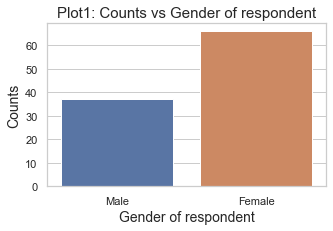

In [1349]:
#visualize this column by Countplot
plt.figure(figsize =(5,3))
sns.countplot(x = 'Gender of respondent', data=df)
plt.xlabel('Gender of respondent', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)
plt.title("Plot1: Counts vs Gender of respondent", fontsize = 15)
plt.savefig('gender.jpg')

Observation:
1. As we can see by countplot and value_counts, 64.08% are Females and 35.92% are Males  

In [1350]:
#check the updated shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (103, 71)


# Column2: How old are you? 

In [1351]:
#Rename the column to make it clean and proper 
df.rename(columns={'2 How old are you? ': 'How old are you?'}, inplace=True)

In [1352]:
df['How old are you?'].unique() #check the unique values

array(['31-40 years', '21-30 years', '41-50 yaers', 'Less than 20 years',
       '51 years and above'], dtype=object)

In [1353]:
df['How old are you?'].value_counts() #check the counts of unique values

21-30 years           32
31-40 years           30
41-50 yaers           29
Less than 20 years     6
51 years and above     6
Name: How old are you?, dtype: int64

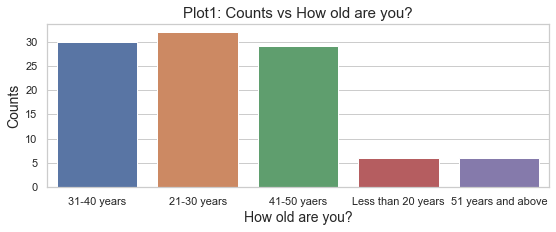

In [1354]:
#visualize this column by Countplot
plt.figure(figsize =(9,3))
sns.countplot(x = 'How old are you?', data=df)
plt.xlabel('How old are you?', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)
plt.title("Plot1: Counts vs How old are you?", fontsize = 15)
plt.savefig('age.jpg')

In [1355]:
df.groupby('How old are you?')['Gender of respondent'].value_counts() 
#check the relationship1 between column and label

How old are you?    Gender of respondent
21-30 years         Female                  25
                    Male                     7
31-40 years         Female                  16
                    Male                    14
41-50 yaers         Female                  18
                    Male                    11
51 years and above  Female                   4
                    Male                     2
Less than 20 years  Female                   3
                    Male                     3
Name: Gender of respondent, dtype: int64

In [1356]:
df.groupby('How old are you?')['Gender of respondent'].value_counts(normalize = True) 
#check the relationship2 between column and label in terms of percentage

How old are you?    Gender of respondent
21-30 years         Female                  0.781250
                    Male                    0.218750
31-40 years         Female                  0.533333
                    Male                    0.466667
41-50 yaers         Female                  0.620690
                    Male                    0.379310
51 years and above  Female                  0.666667
                    Male                    0.333333
Less than 20 years  Female                  0.500000
                    Male                    0.500000
Name: Gender of respondent, dtype: float64

Observation: 
1. In plot1, we can see, the age group of 21-30 years are more in percentage than others.
2. In relationship1, we can see, in every age groups, females are more than males
3. In relationship2, we can see, In the age group of peoples 21-30 years group, females are more in percentage wise than in any other group.

In [1357]:
#check the updated shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (103, 71)


# Column3: Which city do you shop online from?

In [1358]:
#Rename the column to make it clean and proper 
df.rename(columns={'3 Which city do you shop online from?': 'Which city do you shop online from?'}, inplace=True)

In [1359]:
df['Which city do you shop online from?'].unique() #check the unique values

array(['Delhi', 'Greater Noida', 'Karnal ', 'Bangalore ', 'Noida',
       'Solan', 'Moradabad', 'Gurgaon ', 'Merrut', 'Ghaziabad',
       'Bulandshahr'], dtype=object)

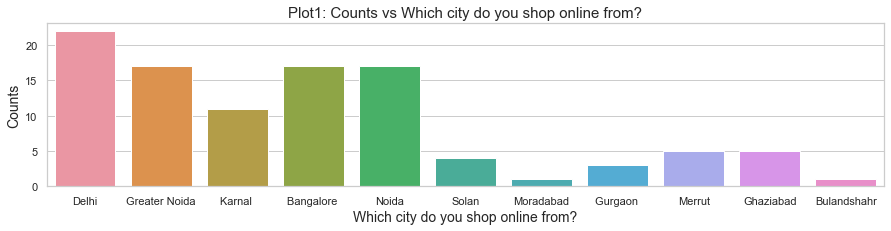

In [1360]:
#visualize this column by Countplot
plt.figure(figsize =(15,3))
sns.countplot(x = 'Which city do you shop online from?', data=df)
plt.xlabel('Which city do you shop online from?', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)
plt.title("Plot1: Counts vs Which city do you shop online from?", fontsize = 15)
plt.savefig('city.jpg')

In [1361]:
#second observation
df['Which city do you shop online from?'].value_counts(normalize = True) 
#check the counts of unique values in terms of percentage

Delhi            0.213592
Noida            0.165049
Bangalore        0.165049
Greater Noida    0.165049
Karnal           0.106796
Merrut           0.048544
Ghaziabad        0.048544
Solan            0.038835
Gurgaon          0.029126
Moradabad        0.009709
Bulandshahr      0.009709
Name: Which city do you shop online from?, dtype: float64

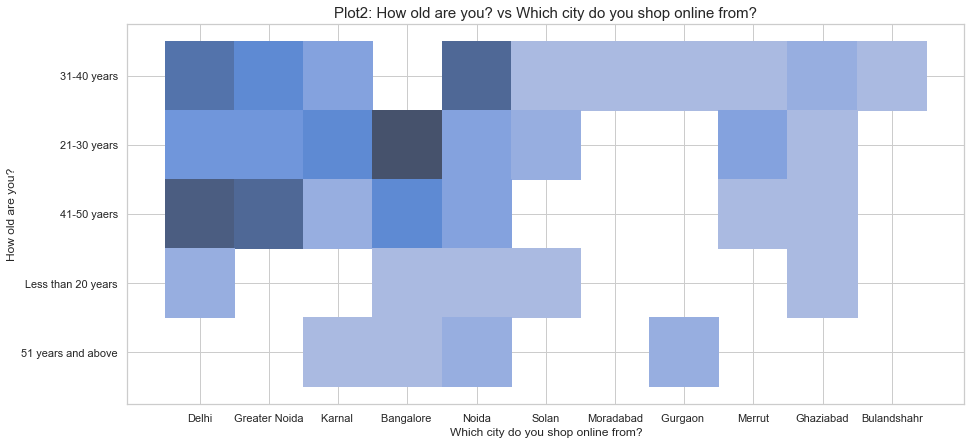

In [1362]:
#visualize by histogram
plt.figure(figsize =(15,7))
sns.set_theme(style="whitegrid")
ax = sns.histplot(x="Which city do you shop online from?", y="How old are you?", data=df)
plt.title("Plot2: How old are you? vs Which city do you shop online from?", fontsize = 15)
plt.savefig('agevscity.jpg')

In [1363]:
df.groupby('How old are you?')['Which city do you shop online from?'].value_counts() 
#check the relationship1 between column and label

How old are you?    Which city do you shop online from?
21-30 years         Bangalore                              10
                    Karnal                                  5
                    Delhi                                   4
                    Greater Noida                           4
                    Merrut                                  3
                    Noida                                   3
                    Solan                                   2
                    Ghaziabad                               1
31-40 years         Noida                                   8
                    Delhi                                   7
                    Greater Noida                           5
                    Karnal                                  3
                    Ghaziabad                               2
                    Bulandshahr                             1
                    Gurgaon                                 1
              

In [1364]:
df.groupby('How old are you?')['Which city do you shop online from?'].value_counts(normalize = True) 
#check the relationship2 between column and label

How old are you?    Which city do you shop online from?
21-30 years         Bangalore                              0.312500
                    Karnal                                 0.156250
                    Delhi                                  0.125000
                    Greater Noida                          0.125000
                    Merrut                                 0.093750
                    Noida                                  0.093750
                    Solan                                  0.062500
                    Ghaziabad                              0.031250
31-40 years         Noida                                  0.266667
                    Delhi                                  0.233333
                    Greater Noida                          0.166667
                    Karnal                                 0.100000
                    Ghaziabad                              0.066667
                    Bulandshahr                            0

In [1365]:
df.groupby('Gender of respondent')['Which city do you shop online from?'].value_counts() 
#check the relationship3 between column and label

Gender of respondent  Which city do you shop online from?
Female                Bangalore                              16
                      Greater Noida                          16
                      Karnal                                 10
                      Delhi                                   6
                      Merrut                                  5
                      Ghaziabad                               4
                      Solan                                   4
                      Noida                                   3
                      Gurgaon                                 2
Male                  Delhi                                  16
                      Noida                                  14
                      Bangalore                               1
                      Bulandshahr                             1
                      Ghaziabad                               1
                      Greater Noida           

In [1366]:
df.groupby('Gender of respondent')['Which city do you shop online from?'].value_counts(normalize = True) 
#check the relationship4 between column and label in terms of percentage

Gender of respondent  Which city do you shop online from?
Female                Bangalore                              0.242424
                      Greater Noida                          0.242424
                      Karnal                                 0.151515
                      Delhi                                  0.090909
                      Merrut                                 0.075758
                      Ghaziabad                              0.060606
                      Solan                                  0.060606
                      Noida                                  0.045455
                      Gurgaon                                0.030303
Male                  Delhi                                  0.432432
                      Noida                                  0.378378
                      Bangalore                              0.027027
                      Bulandshahr                            0.027027
                      Ghaziabad 

Observation
1. In plot1, Delhi city has more number of counts than others
2. In second observation, we can see, Counts of delhi city is 21% in terms of percentage.
3. In plot2, we can see, peoples of delhi are more in 41-50 age group, and then peoples of bangalore are more in 21-30 age group. It means, maximum young peoples are doing online shopping in delhi and bangalore.
5. In relationship1 between age and city, we can see the exact counts of cities which are more and less. if we see, only two cities Bulandshr and muradabad, there are only one age group who are doing online shopping that is 31-40 years
6. In relationship2 between age and city, we can see the relationshipm in percentage wise
7. In relationship3-4, between gender and city, 43% males are from delhi and 24% females are from greater noida and bangalore
7. And we can see, there is no male from solan

In [1367]:
#check the updated shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (103, 71)


# Column4:What is the Pin Code of where you shop online from?

In [1368]:
df.rename(columns={'4 What is the Pin Code of where you shop online from?': 'What is the Pin Code of where you shop online from?'}, inplace=True)

In [1369]:
df['What is the Pin Code of where you shop online from?'].unique() #check the unique value

array([110009, 110030, 201308, 132001, 530068, 110011, 110018, 173229,
       110039, 244001, 122018, 201310, 560037, 203207, 250001, 201005,
       110044, 201306, 560010, 201305, 110042, 132036, 560018, 110008,
       560002, 201303, 201312, 203202, 560001, 201304, 560003, 110014,
       560013, 173212, 122009, 201009, 201008, 201001, 203001],
      dtype=int64)

In [1370]:
df['What is the Pin Code of where you shop online from?'].value_counts()

201308    13
132001     7
110044     7
201310     6
250001     5
132036     4
560037     4
110008     3
201305     3
110011     3
201312     3
560010     3
201306     3
201303     2
110014     2
110018     2
201005     2
201304     2
173229     2
560002     2
122018     2
173212     2
110042     2
530068     2
560018     2
560003     2
110039     1
560001     1
244001     1
110030     1
203207     1
110009     1
201009     1
201008     1
201001     1
203202     1
122009     1
560013     1
203001     1
Name: What is the Pin Code of where you shop online from?, dtype: int64

In [1371]:
#check the zeros, null and skew data
#check the zero value in column
print('Check the zeros in Column:-------->',df['What is the Pin Code of where you shop online from?'].all())
time.sleep(1)
print("\n",'*'*50)
time.sleep(1)
#check the null value in column
print('Check the null values in Column:---------->', df['What is the Pin Code of where you shop online from?'].isnull().sum())
time.sleep(1)
print("\n",'*'*50)
time.sleep(1)#delay of 1 sec
#check the skewness
print('Check the skewness in Column:---------->',df['What is the Pin Code of where you shop online from?'].skew())

Check the zeros in Column:--------> True

 **************************************************
Check the null values in Column:----------> 0

 **************************************************
Check the skewness in Column:----------> 1.5243643080276916


In [1372]:
# calculate the mean, median, mode to check how much our column is skewed  
print('mean of the column-------> ',df['What is the Pin Code of where you shop online from?'].mean())
print('median of the column--------> ',df['What is the Pin Code of where you shop online from?'].median())
print('mode of the column--------> ', st.mode(df['What is the Pin Code of where you shop online from?']))
print('std of the column:----->',df['What is the Pin Code of where you shop online from?'].std())

mean of the column------->  232449.84466019418
median of the column-------->  201305.0
mode of the column-------->  201308
std of the column:-----> 150755.5964813453


In [1373]:
df['What is the Pin Code of where you shop online from?']= df['What is the Pin Code of where you shop online from?'].replace(201308,df['What is the Pin Code of where you shop online from?'].mean())
#replacing mode value into column mean 

In [1374]:
# calculate the mean, median, mode to check how much our column is skewed  
print('mean of the column-------> ',df['What is the Pin Code of where you shop online from?'].mean())
print('median of the column--------> ',df['What is the Pin Code of where you shop online from?'].median())
print('mode of the column--------> ', st.mode(df['What is the Pin Code of where you shop online from?']))
print('std of the column:----->',df['What is the Pin Code of where you shop online from?'].std())

mean of the column------->  236380.36874351962
median of the column-------->  201305.0
mode of the column-------->  232449.84466019418
std of the column:-----> 150293.1987233598


In [1375]:
#check the zeros, null and skew data
#check the zero value in column
print('Check the zeros in Column:-------->',df['What is the Pin Code of where you shop online from?'].all())
time.sleep(1)
print("\n",'*'*50)
time.sleep(1)
#check the null value in column
print('Check the null values in Column:---------->', df['What is the Pin Code of where you shop online from?'].isnull().sum())
time.sleep(1)
print("\n",'*'*50)
time.sleep(1)#delay of 1 sec
#check the skewness
print('Check the skewness in Column:---------->',df['What is the Pin Code of where you shop online from?'].skew())

Check the zeros in Column:--------> True

 **************************************************
Check the null values in Column:----------> 0

 **************************************************
Check the skewness in Column:----------> 1.4596045494512837


Observation:
1. No Null values are found
2. No zero values are found
3. Skewness is improved by replacing mode value into mean value of column

In [1376]:
#check the updated shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (103, 71)


# Column5: Since How Long You are Shopping Online ?

In [1377]:
#Rename the column to make it clean and proper 
df.rename(columns={'5 Since How Long You are Shopping Online ?': 'Since How Long You are Shopping Online?'}, inplace=True)

In [1378]:
df['Since How Long You are Shopping Online?'].unique() #check the unique value

array(['Above 4 years', '3-4 years', '2-3 years', 'Less than 1 year',
       '1-2 years'], dtype=object)

In [1379]:
df['Since How Long You are Shopping Online?'].value_counts() #check the counts of unique values

Above 4 years       39
2-3 years           23
Less than 1 year    18
3-4 years           16
1-2 years            7
Name: Since How Long You are Shopping Online?, dtype: int64

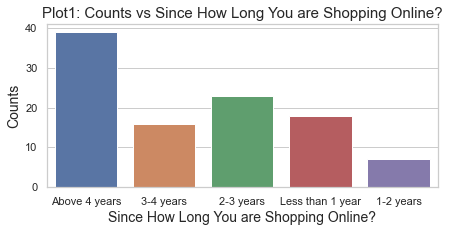

In [1380]:
#visualize this column by Countplot
plt.figure(figsize =(7,3))
sns.countplot(x = 'Since How Long You are Shopping Online?', data=df)
plt.xlabel('Since How Long You are Shopping Online?', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)
plt.title("Plot1: Counts vs Since How Long You are Shopping Online?", fontsize = 15)
plt.savefig('shoppingonline.jpg')

In [1381]:
#second observation
df['Since How Long You are Shopping Online?'].value_counts(normalize = True) 
#check the counts of unique values in terms of percentage

Above 4 years       0.378641
2-3 years           0.223301
Less than 1 year    0.174757
3-4 years           0.155340
1-2 years           0.067961
Name: Since How Long You are Shopping Online?, dtype: float64

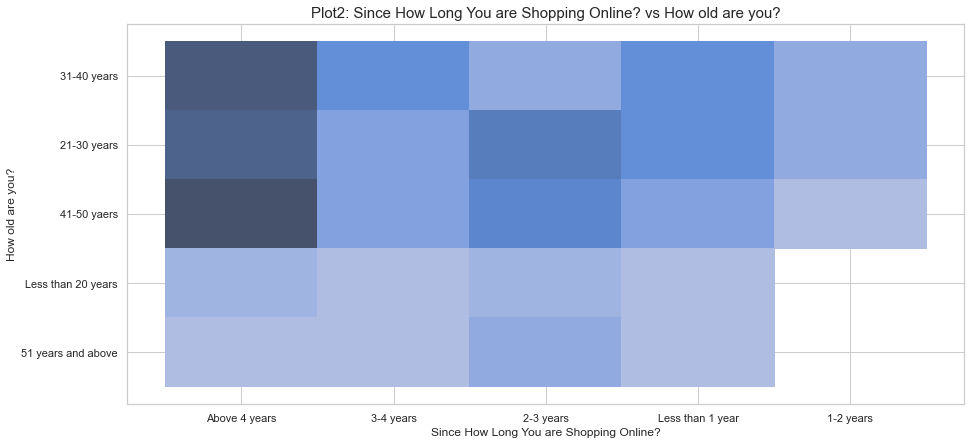

In [1382]:
#visualize by histogram
plt.figure(figsize =(15,7))
sns.set_theme(style="whitegrid")
ax = sns.histplot(x="Since How Long You are Shopping Online?", y="How old are you?", data=df)
plt.title("Plot2: Since How Long You are Shopping Online? vs How old are you?", fontsize = 15)
plt.savefig('agevsonlineshopping.jpg')

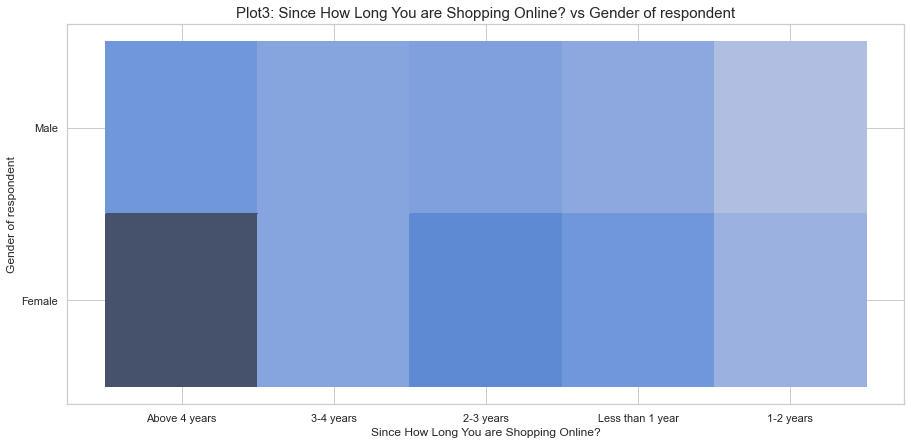

In [1383]:
#visualize by histogram
plt.figure(figsize =(15,7))
sns.set_theme(style="whitegrid")
ax = sns.histplot(x="Since How Long You are Shopping Online?", y="Gender of respondent", data=df)
plt.title("Plot3: Since How Long You are Shopping Online? vs Gender of respondent", fontsize = 15)
plt.savefig('gendervsonlineshopping.jpg')

In [1384]:
df.groupby('Gender of respondent')['Since How Long You are Shopping Online?'].value_counts(normalize = True) 
#check the relationship between column and label

Gender of respondent  Since How Long You are Shopping Online?
Female                Above 4 years                              0.424242
                      2-3 years                                  0.212121
                      Less than 1 year                           0.166667
                      3-4 years                                  0.121212
                      1-2 years                                  0.075758
Male                  Above 4 years                              0.297297
                      2-3 years                                  0.243243
                      3-4 years                                  0.216216
                      Less than 1 year                           0.189189
                      1-2 years                                  0.054054
Name: Since How Long You are Shopping Online?, dtype: float64

In [1385]:
df.groupby('Since How Long You are Shopping Online?')['Which city do you shop online from?'].value_counts(normalize = True) 
#check the relationship between column and label

Since How Long You are Shopping Online?  Which city do you shop online from?
1-2 years                                Noida                                  0.285714
                                         Solan                                  0.285714
                                         Bulandshahr                            0.142857
                                         Delhi                                  0.142857
                                         Ghaziabad                              0.142857
2-3 years                                Bangalore                              0.260870
                                         Noida                                  0.217391
                                         Delhi                                  0.173913
                                         Greater Noida                          0.086957
                                         Karnal                                 0.086957
                                 

Text(0.5, 1.0, 'Plot4: Since How Long You are Shopping Online? vs Which city do you shop online from?')

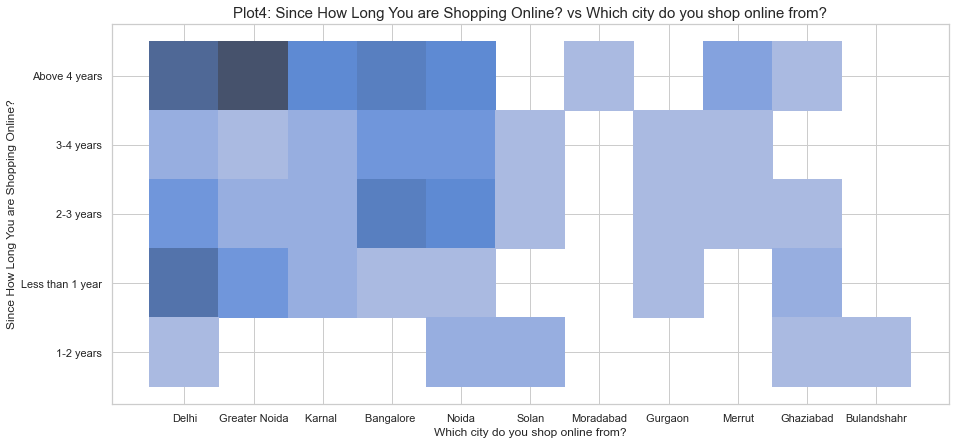

In [1386]:
#visualize by histogram
plt.figure(figsize =(15,7))
sns.set_theme(style="whitegrid")
ax = sns.histplot(y="Since How Long You are Shopping Online?", x="Which city do you shop online from?", data=df)
plt.title("Plot4: Since How Long You are Shopping Online? vs Which city do you shop online from?", fontsize = 15)

Observation:
1. In plot1, we can see, Those people's are more who are doing online shoping more than 4 years in percentage wise also. that is 37.86%
2. In plot2, we can see, Peoples who are doing shopping more than 4 years, their age groups are 31-50 years old
3. In plot3, we can see, Peoples who are doing shopping more than 4 years, we see, mostly are females in this category
4. In plot4, we can see, Peoples who are doing shopping more than 4 years,Mostly peoples are from Greater Noida

In [1387]:
#check the updated shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (103, 71)


# Column6: How many times you have made an online purchase in the past 1 year?

In [1388]:
#Rename the column to make it clean and proper 
df.rename(columns={'6 How many times you have made an online purchase in the past 1 year?': 'How many times you have made an online purchase in the past 1 year?'}, inplace=True)

In [1389]:
df['How many times you have made an online purchase in the past 1 year?'].unique() #check the unique value

array(['31-40 times', '41 times and above', 'Less than 10 times',
       '11-20 times', '21-30 times', '42 times and above'], dtype=object)

In [1390]:
df['How many times you have made an online purchase in the past 1 year?'].value_counts() #check the counts of unique values

Less than 10 times    39
31-40 times           24
41 times and above    22
11-20 times           12
21-30 times            4
42 times and above     2
Name: How many times you have made an online purchase in the past 1 year?, dtype: int64

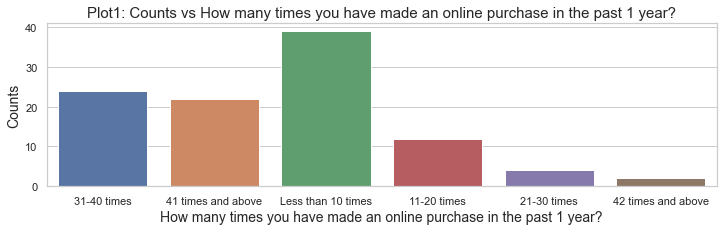

In [1391]:
#visualize this column by Countplot
plt.figure(figsize =(12,3))
sns.countplot(x = 'How many times you have made an online purchase in the past 1 year?', data=df)
plt.xlabel('How many times you have made an online purchase in the past 1 year?', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)
plt.title("Plot1: Counts vs How many times you have made an online purchase in the past 1 year?", fontsize = 15)
plt.savefig('timespurchase.jpg')

Text(0.5, 1.0, 'Plot2: Since How Long You are Shopping Online ? vs Which city do you shop online from?')

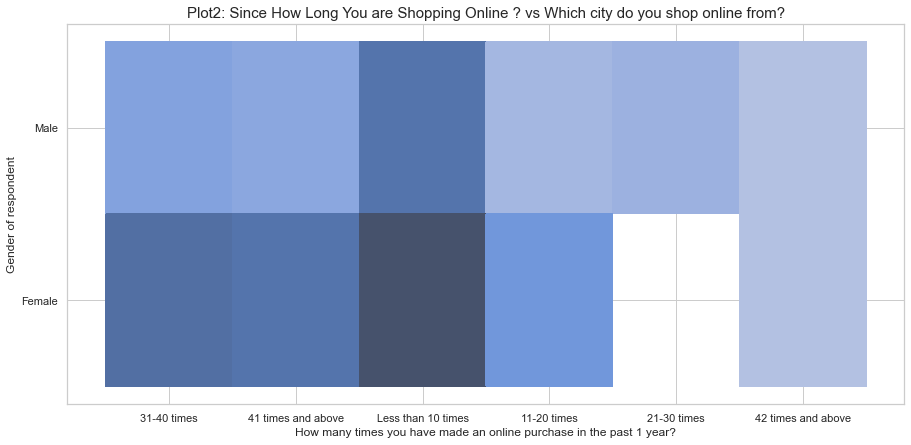

In [1392]:
#visualize by histogram
plt.figure(figsize =(15,7))
sns.set_theme(style="whitegrid")
ax = sns.histplot(y="Gender of respondent", x="How many times you have made an online purchase in the past 1 year?", data=df)
plt.title("Plot2: Since How Long You are Shopping Online ? vs Which city do you shop online from?", fontsize = 15)

Text(0.5, 1.0, 'Plot3: How old are you? vs How many times you have made an online purchase in the past 1 year?')

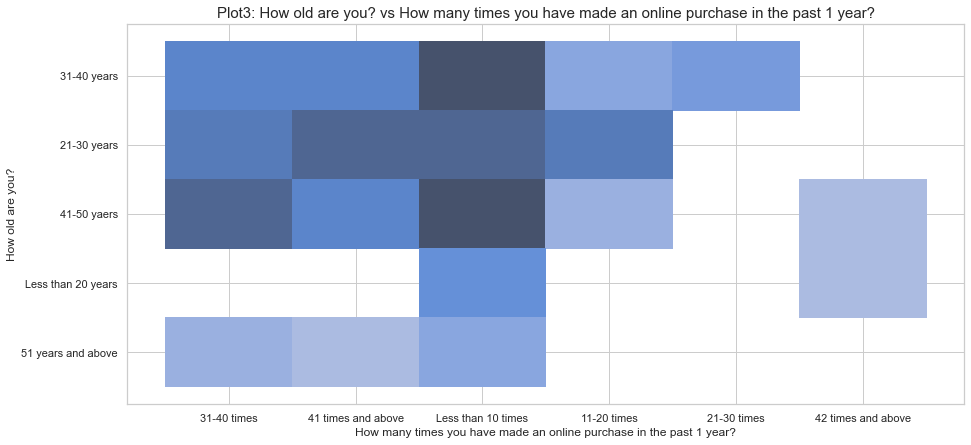

In [1393]:
#visualize by histogram
plt.figure(figsize =(15,7))
sns.set_theme(style="whitegrid")
ax = sns.histplot(y="How old are you?", x="How many times you have made an online purchase in the past 1 year?", data=df)
plt.title("Plot3: How old are you? vs How many times you have made an online purchase in the past 1 year?", fontsize = 15)

Text(0.5, 1.0, 'Plot4: Since How Long You are Shopping Online? vs How many times you have made an online purchase in the past 1 year?')

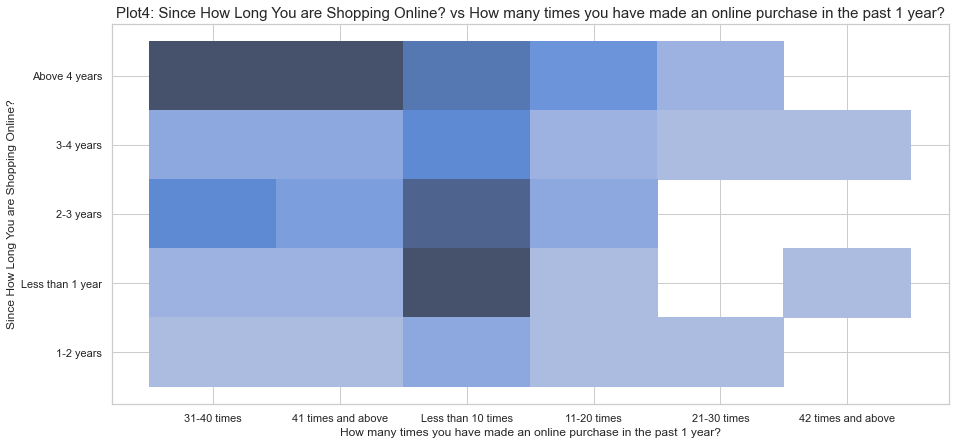

In [1394]:
#visualize by histogram
plt.figure(figsize =(15,7))
sns.set_theme(style="whitegrid")
ax = sns.histplot(y="Since How Long You are Shopping Online?", x="How many times you have made an online purchase in the past 1 year?", data=df)
plt.title("Plot4: Since How Long You are Shopping Online? vs How many times you have made an online purchase in the past 1 year?", fontsize = 15)

Observation:
1. In plo1, we can see, peoples are in category 'less than 10 times' are more than others
2. In plot2, generally females are doing shopping less than 10 times
3. In plot3, we can see, the age group of 'less than 10 times' category is around 30-50 years
4. In plot4, People's are doing shopping more than 4 years, they are doing shopping 31 and above times.

In [1395]:
#check the updated shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (103, 71)


# Column7: How do you access the internet while shopping on-line?

In [1396]:
#Rename the column to make it clean and proper 
df.rename(columns={'7 How do you access the internet while shopping on-line?': 'How do you access the internet while shopping on-line?'}, inplace=True)

In [1397]:
df['How do you access the internet while shopping on-line?'].unique() #check the unique value

array(['Dial-up', 'Wi-Fi', 'Mobile Internet', 'Mobile internet'],
      dtype=object)

In [1398]:
#replace the 'Mobile Internet' into 'Mobile internet'
df['How do you access the internet while shopping on-line?'] = df['How do you access the internet while shopping on-line?'].str.replace('Mobile Internet','Mobile internet')

In [1399]:
df['How do you access the internet while shopping on-line?'].value_counts() 
#check the counts of unique values

Mobile internet    81
Wi-Fi              21
Dial-up             1
Name: How do you access the internet while shopping on-line?, dtype: int64

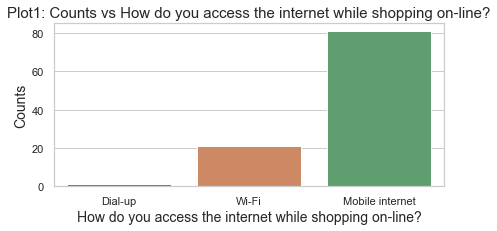

In [1400]:
#visualize this column by Countplot
plt.figure(figsize =(7,3))
sns.countplot(x = 'How do you access the internet while shopping on-line?', data=df)
plt.xlabel('How do you access the internet while shopping on-line?', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)
plt.title("Plot1: Counts vs How do you access the internet while shopping on-line?", fontsize = 15)
plt.savefig('accessinternet.jpg')

In [1401]:
df.groupby('Gender of respondent')['How do you access the internet while shopping on-line?'].value_counts(normalize = True) 
#check the relationship2 between column and label

Gender of respondent  How do you access the internet while shopping on-line?
Female                Mobile internet                                           0.727273
                      Wi-Fi                                                     0.272727
Male                  Mobile internet                                           0.891892
                      Wi-Fi                                                     0.081081
                      Dial-up                                                   0.027027
Name: How do you access the internet while shopping on-line?, dtype: float64

In [1402]:
df.groupby('How old are you?')['How do you access the internet while shopping on-line?'].value_counts(normalize = True) 
#check the relationship3 between column and label

How old are you?    How do you access the internet while shopping on-line?
21-30 years         Mobile internet                                           0.781250
                    Wi-Fi                                                     0.218750
31-40 years         Mobile internet                                           0.766667
                    Wi-Fi                                                     0.200000
                    Dial-up                                                   0.033333
41-50 yaers         Mobile internet                                           0.862069
                    Wi-Fi                                                     0.137931
51 years and above  Mobile internet                                           0.666667
                    Wi-Fi                                                     0.333333
Less than 20 years  Mobile internet                                           0.666667
                    Wi-Fi                              

Observation:
1. First, we see, there are two data values which are alphabetically different, so, we replace one into other.
2. In plot1, We can see, there are more people's who are using mobile internet than others
3. In plot1, we can see, there is only one person who use dial up service
4. In relationship2, we can see, Males are using more mobile internet than females in terms of percentage
5. In relationship3, in every age group, mobile internet users are more than others.
6. In relationship3, the one male people using dial up service, he is around 31-40 years

In [1403]:
#check the updated shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (103, 71)


# Column8: Which device do you use to access the online shopping?

In [1404]:
#Rename the column to make it clean and proper 
df.rename(columns={'8 Which device do you use to access the online shopping?': 'Which device do you use to access the online shopping?'}, inplace=True)

In [1405]:
df['Which device do you use to access the online shopping?'].unique() #check the unique value

array(['Desktop', 'Smartphone', 'Tablet', 'Laptop'], dtype=object)

In [1406]:
df['Which device do you use to access the online shopping?'].value_counts() #check the counts of unique values

Smartphone    52
Laptop        32
Desktop       13
Tablet         6
Name: Which device do you use to access the online shopping?, dtype: int64

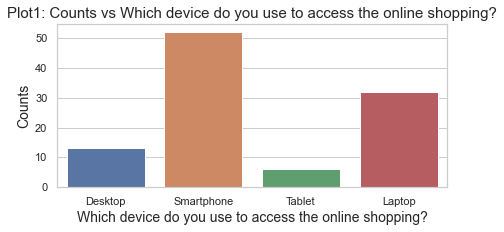

In [1407]:
#visualize this column by Countplot
plt.figure(figsize =(7,3))
sns.countplot(x = 'Which device do you use to access the online shopping?', data=df)
plt.xlabel('Which device do you use to access the online shopping?', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)
plt.title("Plot1: Counts vs Which device do you use to access the online shopping?", fontsize = 15)
plt.savefig('device.jpg')

In [1408]:
df.groupby('Gender of respondent')['Which device do you use to access the online shopping?'].value_counts(normalize = True) 
#check the relationship1 between column and label

Gender of respondent  Which device do you use to access the online shopping?
Female                Smartphone                                                0.560606
                      Laptop                                                    0.318182
                      Desktop                                                   0.121212
Male                  Smartphone                                                0.405405
                      Laptop                                                    0.297297
                      Tablet                                                    0.162162
                      Desktop                                                   0.135135
Name: Which device do you use to access the online shopping?, dtype: float64

In [1409]:
df.groupby('How old are you?')['Which device do you use to access the online shopping?'].value_counts(normalize = True) 
#check the relationship2 between column and label

How old are you?    Which device do you use to access the online shopping?
21-30 years         Smartphone                                                0.562500
                    Laptop                                                    0.375000
                    Desktop                                                   0.031250
                    Tablet                                                    0.031250
31-40 years         Smartphone                                                0.433333
                    Laptop                                                    0.400000
                    Desktop                                                   0.133333
                    Tablet                                                    0.033333
41-50 yaers         Smartphone                                                0.413793
                    Desktop                                                   0.241379
                    Laptop                             

Text(0.5, 1.0, 'Plot2: Which city do you shop online from? vs Which device do you use to access the online shopping?')

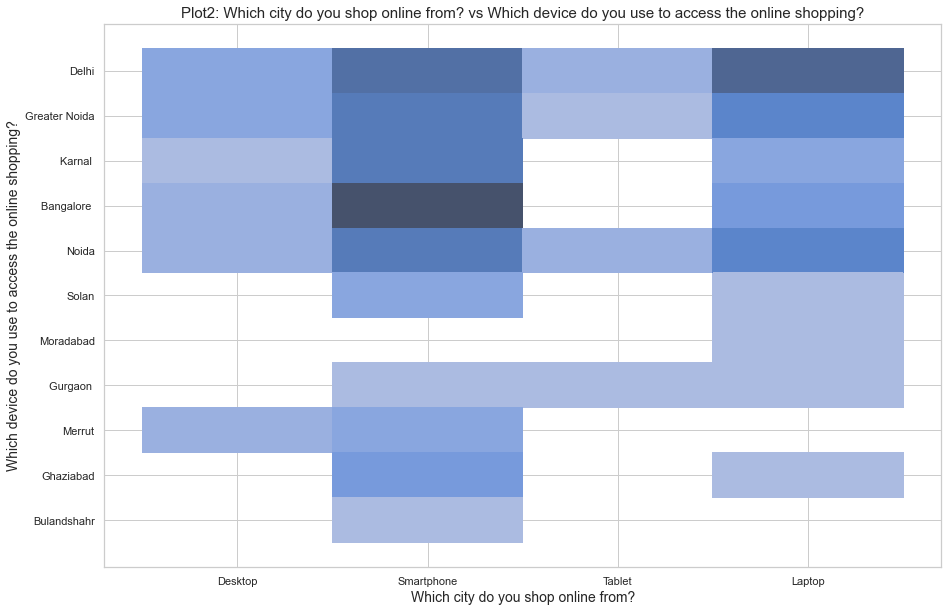

In [1410]:
#visualize this column by lineplot
plt.figure(figsize=(15,10))
sns.histplot(y= 'Which city do you shop online from?',x= 'Which device do you use to access the online shopping?', data=df)
plt.ylabel('Which device do you use to access the online shopping?', fontsize = 14)
plt.xlabel('Which city do you shop online from?', fontsize = 14)
plt.title('Plot2: Which city do you shop online from? vs Which device do you use to access the online shopping?', fontsize = 15)

Text(0.5, 1.0, 'Plot3: How do you access the internet while shopping on-line? vs Which device do you use to access the online shopping?')

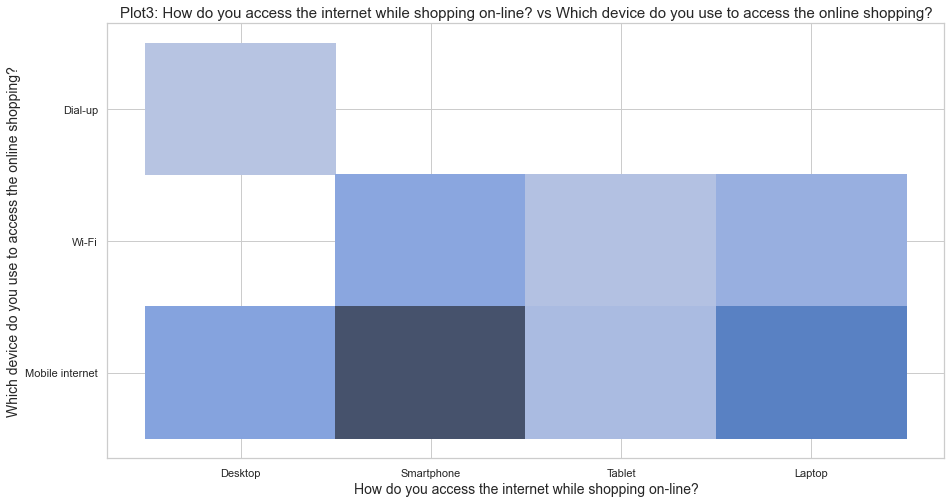

In [1411]:
#visualize this column by lineplot
plt.figure(figsize=(15,8))
sns.histplot(y= 'How do you access the internet while shopping on-line?',x= 'Which device do you use to access the online shopping?', data=df)
plt.ylabel('Which device do you use to access the online shopping?', fontsize = 14)
plt.xlabel('How do you access the internet while shopping on-line?', fontsize = 14)
plt.title('Plot3: How do you access the internet while shopping on-line? vs Which device do you use to access the online shopping?', fontsize = 15)

Observation:
1. In plot1, we can see, smartphone users are more than others.
2. In relationship1, we can see, females are using more smartphone than males, and only males are using Tablets
3. In relationship2, we can see, in every age group, smartphone users are more than others.
4. In plot2, we can see, mostly smartphone users are from bangalore
5. In plot3, we can see, mostly smartphone users are using mobile internet

In [1412]:
#check the updated shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (103, 71)


# Column9: What is the screen size of your mobile device?

In [1413]:
#clean the column by using rename command
df.rename(columns={'9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ': 'What is the screen size of your mobile device?'}, inplace=True)

In [1414]:
df['What is the screen size of your mobile device?'].unique() #check the unique value

array(['Others', '4.7 inches', '5.5 inches', '5 inches'], dtype=object)

In [1415]:
df['What is the screen size of your mobile device?'].value_counts() #check the counts of unique values

Others        51
5.5 inches    35
4.7 inches    13
5 inches       4
Name: What is the screen size of your mobile device?, dtype: int64

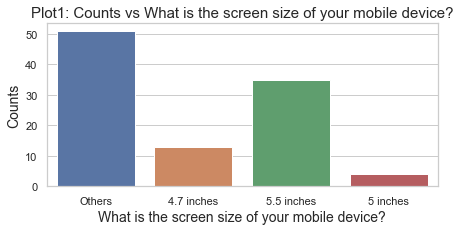

In [1416]:
#visualize this column by Countplot
plt.figure(figsize =(7,3))
sns.countplot(x = 'What is the screen size of your mobile device?', data=df)
plt.xlabel('What is the screen size of your mobile device?', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)
plt.title("Plot1: Counts vs What is the screen size of your mobile device?", fontsize = 15)
plt.savefig('screensize.jpg')

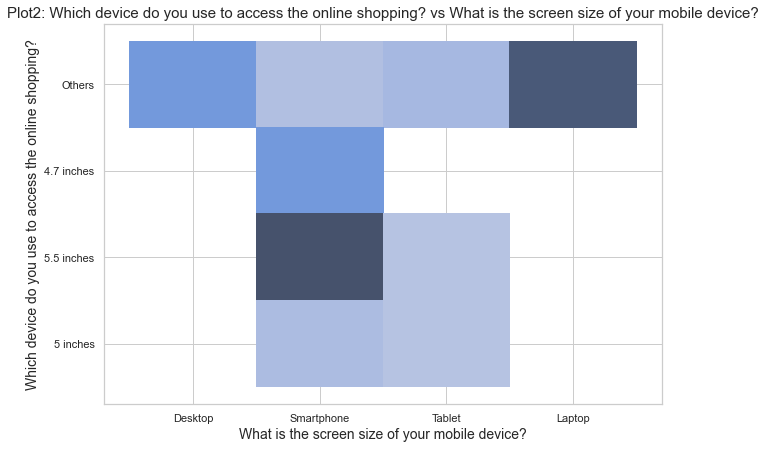

In [1704]:
#visualize this column by lineplot
plt.figure(figsize=(10,7))
sns.histplot(x= 'Which device do you use to access the online shopping?',y= 'What is the screen size of your mobile device?', data=df)
plt.xlabel('What is the screen size of your mobile device?', fontsize = 14)
plt.ylabel('Which device do you use to access the online shopping?', fontsize = 14)
plt.title('Plot2: Which device do you use to access the online shopping? vs What is the screen size of your mobile device?', fontsize = 15)
plt.savefig('screensize1.jpg')

Observation:
1. In plot1, we see, others are more 
2. In plot2, generally smartphone users has screensize 5.5 inches and laptops users has others screensize. 

In [1418]:
#check the updated shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (103, 71)


# Column10:What is the operating system (OS) of your device?

In [1419]:
#clean the column by using rename command
df.rename(columns={'10 What is the operating system (OS) of your device?\t\t\t\t                                          ': 'What is the operating system (OS) of your device?'}, inplace=True)

In [1420]:
df['What is the operating system (OS) of your device?'].unique() #check the unique value

array(['Window/windows Mobile', 'IOS/Mac', 'Android'], dtype=object)

In [1421]:
df['What is the operating system (OS) of your device?'].value_counts() #check the counts of unique values

Window/windows Mobile    46
Android                  30
IOS/Mac                  27
Name: What is the operating system (OS) of your device?, dtype: int64

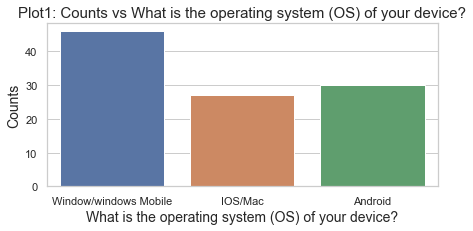

In [1422]:
#visualize this column by Countplot
plt.figure(figsize =(7,3))
sns.countplot(x = 'What is the operating system (OS) of your device?', data=df)
plt.xlabel('What is the operating system (OS) of your device?', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)
plt.title("Plot1: Counts vs What is the operating system (OS) of your device?", fontsize = 15)
plt.savefig('operatingsystem.jpg')

In [1423]:
df.groupby('Gender of respondent')['What is the operating system (OS) of your device?'].value_counts(normalize = True) 
#check the relationship1 between column and label

Gender of respondent  What is the operating system (OS) of your device?
Female                Window/windows Mobile                                0.454545
                      IOS/Mac                                              0.287879
                      Android                                              0.257576
Male                  Window/windows Mobile                                0.432432
                      Android                                              0.351351
                      IOS/Mac                                              0.216216
Name: What is the operating system (OS) of your device?, dtype: float64

Text(0.5, 1.0, 'Plot2: Which device do you use to access the online shopping? vs What is the operating system (OS) of your device?')

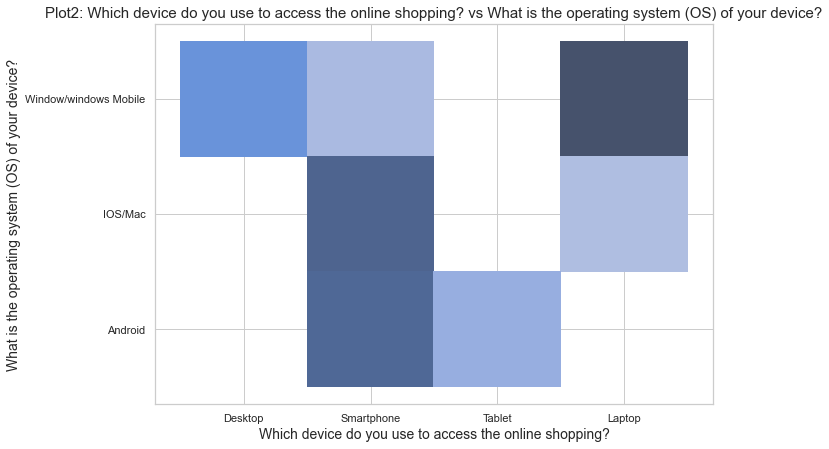

In [1424]:
#visualize this column by lineplot
plt.figure(figsize=(10,7))
sns.histplot(x= 'Which device do you use to access the online shopping?',y= 'What is the operating system (OS) of your device?', data=df)
plt.xlabel('Which device do you use to access the online shopping?', fontsize = 14)
plt.ylabel('What is the operating system (OS) of your device?', fontsize = 14)
plt.title('Plot2: Which device do you use to access the online shopping? vs What is the operating system (OS) of your device?', fontsize = 15)

Observation:
1. In plot1, we see, mostly peoples are using window/windows mobile than others
2. In relationmship1, both female and male are using window mobile more than other category
3. In plot2, we see, mostly laptop users are using windows mobile 

In [1425]:
#check the updated shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (103, 71)


# Column11: What browser do you run on your device to access the website?

In [1426]:
#clean the column by using rename command
df.rename(columns={'11 What browser do you run on your device to access the website?\t\t\t                                                          ':'What browser do you run on your device to access the website?'}, inplace = True)

In [1427]:
df['What browser do you run on your device to access the website?'].unique() #check the unique value

array(['Google chrome', 'Safari', 'Opera', 'Mozilla Firefox'],
      dtype=object)

In [1428]:
df['What browser do you run on your device to access the website?'].value_counts() #check the counts of unique values

Google chrome      80
Safari             19
Opera               2
Mozilla Firefox     2
Name: What browser do you run on your device to access the website?, dtype: int64

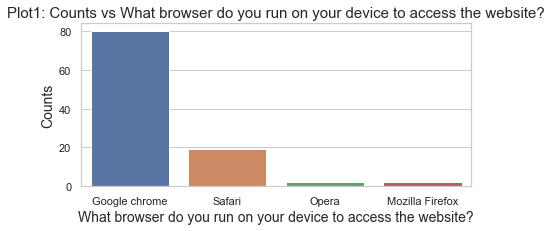

In [1429]:
#visualize this column by Countplot
plt.figure(figsize =(7,3))
sns.countplot(x = 'What browser do you run on your device to access the website?', data=df)
plt.xlabel('What browser do you run on your device to access the website?', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)
plt.title("Plot1: Counts vs What browser do you run on your device to access the website?", fontsize = 15)
plt.savefig('browser.jpg')

Text(0.5, 1.0, 'Plot2: Which device do you use to access the online shopping? vs What browser do you run on your device to access the website?')

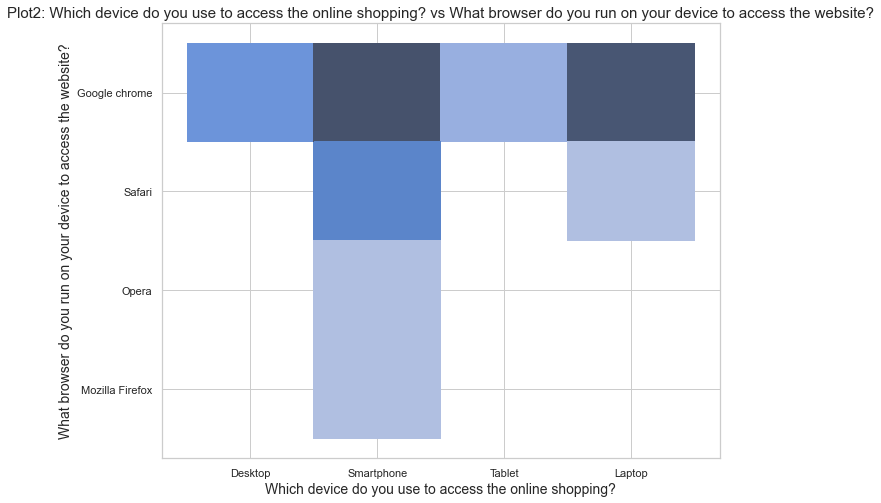

In [1430]:
#visualize this column by lineplot
plt.figure(figsize=(10,8))
sns.histplot(x= 'Which device do you use to access the online shopping?',y= 'What browser do you run on your device to access the website?', data=df)
plt.xlabel('Which device do you use to access the online shopping?', fontsize = 14)
plt.ylabel('What browser do you run on your device to access the website?', fontsize = 14)
plt.title('Plot2: Which device do you use to access the online shopping? vs What browser do you run on your device to access the website?', fontsize = 15)

Observation:
1. In plot1, we can see, people using google chrome more than other browser
2. In plot2, we can see, smartphone users use google chrome more than other category users

In [1431]:
#check the updated shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (103, 71)


# Column12: Which channel did you follow to arrive at your favorite online store for the first time?                                                                   

In [1432]:
#clean the column by using rename command
df.rename(columns={'12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ':'Which channel did you follow to arrive at your favorite online store for the first time?'},inplace=True)

In [1433]:
df['Which channel did you follow to arrive at your favorite online store for the first time?'].unique() #check the unique value

array(['Search Engine', 'Content Marketing', 'Display Adverts'],
      dtype=object)

In [1434]:
df['Which channel did you follow to arrive at your favorite online store for the first time?'].value_counts() #check the counts of unique values

Search Engine        86
Content Marketing    10
Display Adverts       7
Name: Which channel did you follow to arrive at your favorite online store for the first time?, dtype: int64

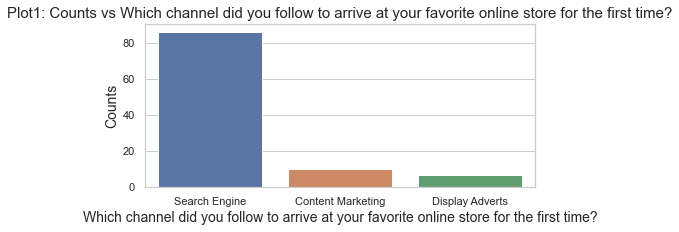

In [1435]:
#visualize this column by Countplot
plt.figure(figsize =(7,3))
sns.countplot(x = 'Which channel did you follow to arrive at your favorite online store for the first time?', data=df)
plt.xlabel('Which channel did you follow to arrive at your favorite online store for the first time?', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)
plt.title("Plot1: Counts vs Which channel did you follow to arrive at your favorite online store for the first time?", fontsize = 15)
plt.savefig('channel.jpg')

Text(0.5, 1.0, 'Plot2: What browser do you run on your device to access the website? vs Which channel did you follow to arrive at your favorite online store for the first time?')

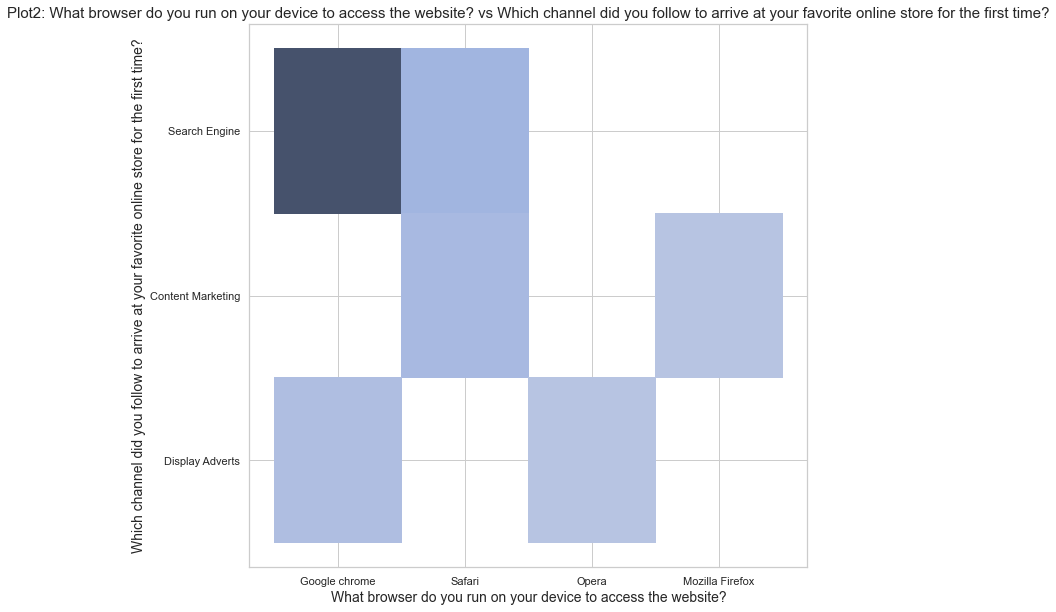

In [1436]:
#visualize this column by lineplot
plt.figure(figsize=(10,10))
sns.histplot(x= 'What browser do you run on your device to access the website?',y= 'Which channel did you follow to arrive at your favorite online store for the first time?', data=df)
plt.xlabel('What browser do you run on your device to access the website?', fontsize = 14)
plt.ylabel('Which channel did you follow to arrive at your favorite online store for the first time?', fontsize = 14)
plt.title('Plot2: What browser do you run on your device to access the website? vs Which channel did you follow to arrive at your favorite online store for the first time?', fontsize = 15)

Observation:
1. In plot1, we can see, peoples are using search engine more than others
2. In plot2, mostly people uses google chrome as a search engine

In [1437]:
#check the updated shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (103, 71)


# Column13: After first visit, how do you reach the online retail store?

In [1438]:
#clean the column by using rename command
df.rename(columns={'13 After first visit, how do you reach the online retail store?\t\t\t\t                                                   ':'After first visit, how do you reach the online retail store?'},inplace=True)

In [1439]:
df['After first visit, how do you reach the online retail store?'].unique() #check the unique value

array(['Search Engine', 'Via application', 'Direct URL', 'E-mail',
       'Social Media'], dtype=object)

In [1440]:
df['After first visit, how do you reach the online retail store?'].value_counts() #check the counts of unique values

Via application    34
Search Engine      33
Direct URL         26
E-mail              8
Social Media        2
Name: After first visit, how do you reach the online retail store?, dtype: int64

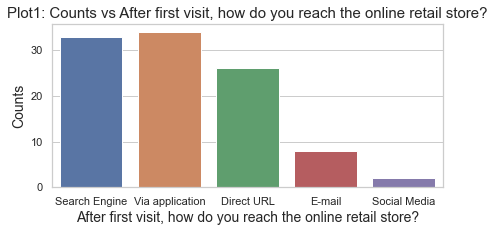

In [1441]:
#visualize this column by Countplot
plt.figure(figsize =(7,3))
sns.countplot(x = 'After first visit, how do you reach the online retail store?', data=df)
plt.xlabel('After first visit, how do you reach the online retail store?', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)
plt.title("Plot1: Counts vs After first visit, how do you reach the online retail store?", fontsize = 15)
plt.savefig('reach.jpg')

Observation:
1. In plot1, we can see, mostly people uses search engine and Via application to reach the online retail store

In [1442]:
#check the updated shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (103, 71)


# Column14: How much time do you explore the e- retail store before making a purchase decision?

In [1443]:
#clean the column by using rename command
df.rename(columns={'14 How much time do you explore the e- retail store before making a purchase decision?                                                                   ': 'How much time do you explore the e- retail store before making a purchase decision?'}, inplace=True)

In [1444]:
df['How much time do you explore the e- retail store before making a purchase decision?'].unique() #check the unique value

array(['6-10 mins', 'more than 15 mins', '11-15 mins', '1-5 mins',
       'Less than 1 min'], dtype=object)

In [1445]:
df['How much time do you explore the e- retail store before making a purchase decision?'].value_counts() #check the counts of unique values

more than 15 mins    48
6-10 mins            31
11-15 mins           15
1-5 mins              5
Less than 1 min       4
Name: How much time do you explore the e- retail store before making a purchase decision?, dtype: int64

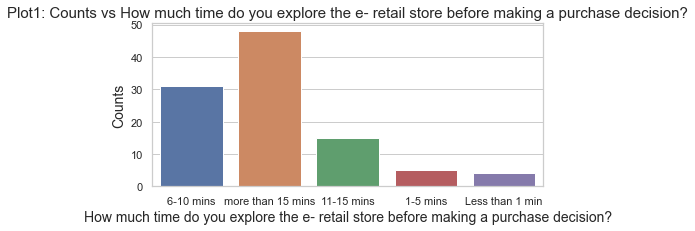

In [1446]:
#visualize this column by Countplot
plt.figure(figsize =(7,3))
sns.countplot(x = 'How much time do you explore the e- retail store before making a purchase decision?', data=df)
plt.xlabel('How much time do you explore the e- retail store before making a purchase decision?', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)
plt.title("Plot1: Counts vs How much time do you explore the e- retail store before making a purchase decision?", fontsize = 15)
plt.savefig('explore.jpg')

Text(0.5, 1.0, 'Plot2: Gender of respondent vs How much time do you explore the e- retail store before making a purchase decision?')

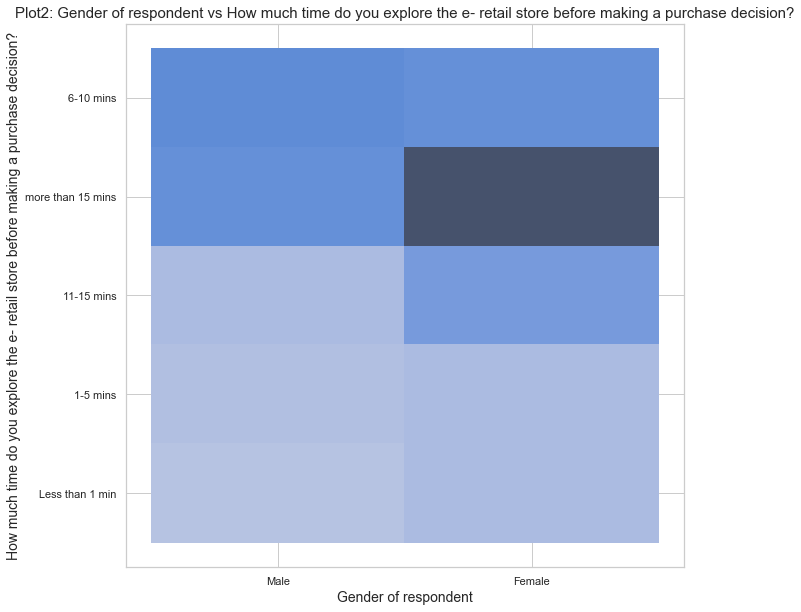

In [1447]:
#visualize this column by lineplot
plt.figure(figsize=(10,10))
sns.histplot(x= 'Gender of respondent',y= 'How much time do you explore the e- retail store before making a purchase decision?', data=df)
plt.xlabel('Gender of respondent', fontsize = 14)
plt.ylabel('How much time do you explore the e- retail store before making a purchase decision?', fontsize = 14)
plt.title('Plot2: Gender of respondent vs How much time do you explore the e- retail store before making a purchase decision?', fontsize = 15)

Text(0.5, 1.0, 'Plot3: How old are you?  vs How much time do you explore the e- retail store before making a purchase decision?')

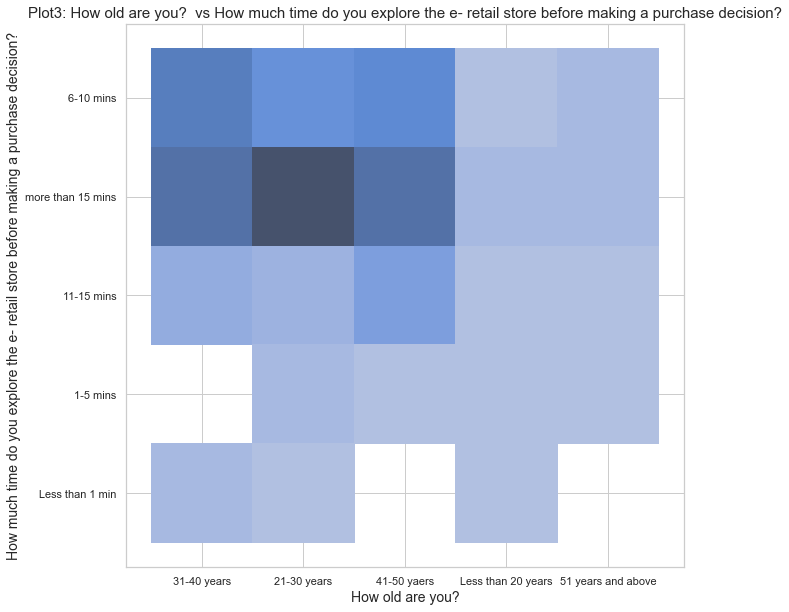

In [1448]:
#visualize this column by histplot
plt.figure(figsize=(10,10))
sns.histplot(x= 'How old are you?',y= 'How much time do you explore the e- retail store before making a purchase decision?', data=df)
plt.xlabel('How old are you?', fontsize = 14)
plt.ylabel('How much time do you explore the e- retail store before making a purchase decision?', fontsize = 14)
plt.title('Plot3: How old are you?  vs How much time do you explore the e- retail store before making a purchase decision?', fontsize = 15)

Observation:
1. In plot1, peoples who spent time more than 15 mins are than other category
2. In plot2, mostly females spents more in 'more than 15 mins' category
3. In plot3, mostly 21-30 years old females are spent time more than 15 mins to take decisions

In [1449]:
#check the updated shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (103, 71)


# Column15: What is your preferred payment Option?

In [1450]:
#clean the column by using rename command
df.rename(columns={'15 What is your preferred payment Option?\t\t\t\t\t                                                                                                                               ': 'What is your preferred payment Option?'}, inplace=True)

In [1451]:
df['What is your preferred payment Option?'].unique() #check the unique value

array(['E-wallets (Paytm, Freecharge etc.)', 'Credit/Debit cards',
       'Cash on delivery (CoD)'], dtype=object)

In [1452]:
df['What is your preferred payment Option?'].value_counts() #check the counts of unique values

Credit/Debit cards                    59
Cash on delivery (CoD)                25
E-wallets (Paytm, Freecharge etc.)    19
Name: What is your preferred payment Option?, dtype: int64

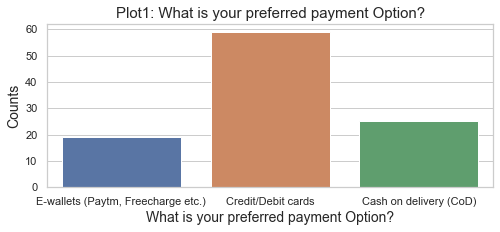

In [1453]:
#visualize this column by Countplot
plt.figure(figsize =(8,3))
sns.countplot(x = 'What is your preferred payment Option?', data=df)
plt.xlabel('What is your preferred payment Option?', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)
plt.title("Plot1: What is your preferred payment Option?", fontsize = 15)
plt.savefig('paymentoption.jpg')

Text(0.5, 1.0, 'Plot2: Gender of respondent vs What is your preferred payment Option?')

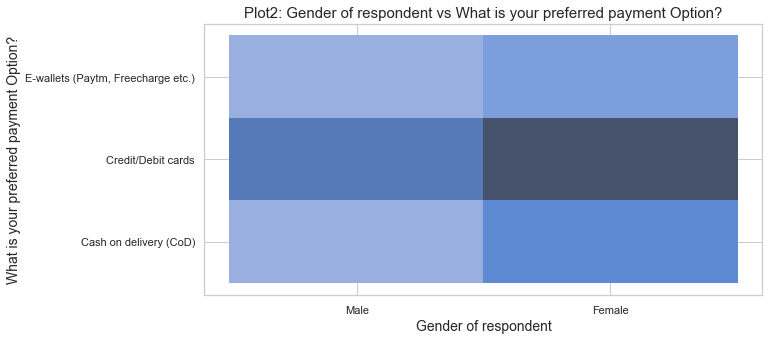

In [1454]:
#visualize this column by histplot
plt.figure(figsize=(10,5))
sns.histplot(x= 'Gender of respondent',y= 'What is your preferred payment Option?', data=df)
plt.xlabel('Gender of respondent', fontsize = 14)
plt.ylabel('What is your preferred payment Option?', fontsize = 14)
plt.title('Plot2: Gender of respondent vs What is your preferred payment Option?', fontsize = 15)

Text(0.5, 1.0, 'Plot3: How old are you? vs What is your preferred payment Option?')

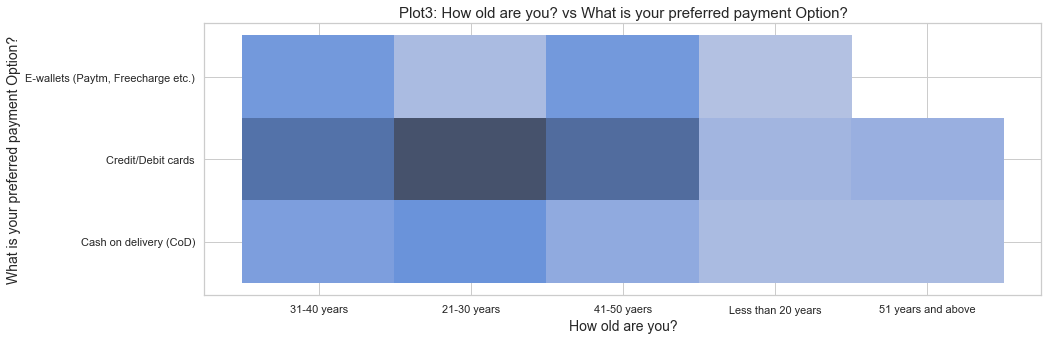

In [1455]:
#visualize this column by histplot
plt.figure(figsize=(15,5))
sns.histplot(x= 'How old are you?',y= 'What is your preferred payment Option?', data=df)
plt.xlabel('How old are you?', fontsize = 14)
plt.ylabel('What is your preferred payment Option?', fontsize = 14)
plt.title('Plot3: How old are you? vs What is your preferred payment Option?', fontsize = 15)

Text(0.5, 1.0, 'Plot4: Which city do you shop online from? vs What is your preferred payment Option?')

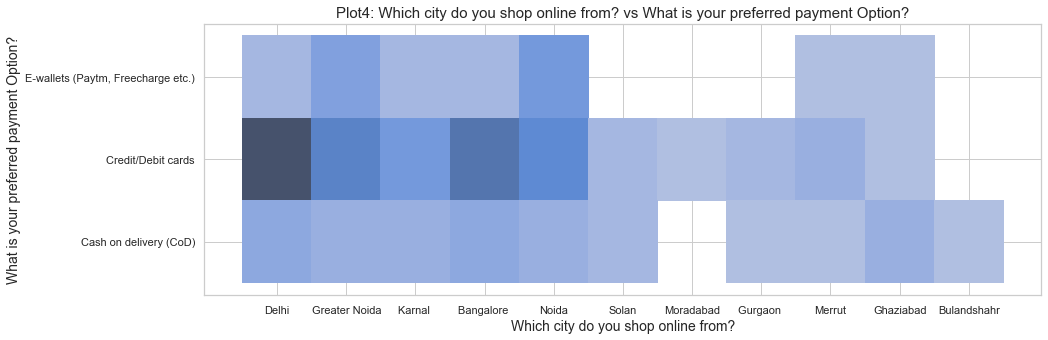

In [1456]:
#visualize this column by histplot
plt.figure(figsize=(15,5))
sns.histplot(x= 'Which city do you shop online from?',y= 'What is your preferred payment Option?', data=df)
plt.xlabel('Which city do you shop online from?', fontsize = 14)
plt.ylabel('What is your preferred payment Option?', fontsize = 14)
plt.title('Plot4: Which city do you shop online from? vs What is your preferred payment Option?', fontsize = 15)

Observation:
1. in plot1, most prefered payment option is credit/debit card
2. In plot2, mostly females are using credit/debit card
3. in plot3, age group 21-30 years old are using credit/debit card most
4. in plot4, mostly in delhi peoples are using credit/debit card

In [1457]:
#check the updated shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (103, 71)


# Column16: How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?

In [1458]:
#clean the column by using rename command
df.rename(columns={'16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t                                                   ': 'How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?'}, inplace=True)

In [1459]:
df['How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?'].unique() #check the unique value

array(['Sometimes', 'Very frequently', 'Never', 'Frequently'],
      dtype=object)

In [1460]:
df['How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?'].value_counts() #check the counts of unique values

Sometimes          64
Never              17
Frequently         16
Very frequently     6
Name: How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?, dtype: int64

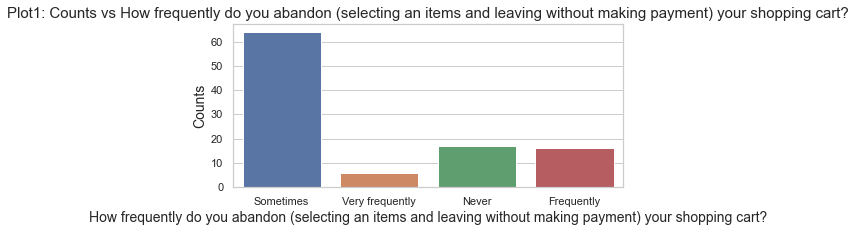

In [1461]:
#visualize this column by Countplot
plt.figure(figsize =(7,3))
sns.countplot(x = 'How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?', data=df)
plt.xlabel('How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)
plt.title("Plot1: Counts vs How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?", fontsize = 15)
plt.savefig('abandonshoppingcart.jpg')

Observation:
1. In plot1, we see, people sometimes abandon (selecting an items and leaving without making payment) your shopping cart

In [1462]:
#check the updated shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (103, 71)


# Column17: Why did you abandon the “Bag”, “Shopping Cart”?

In [1463]:
#clean the column by using rename command
df.rename(columns={'17 Why did you abandon the “Bag”, “Shopping Cart”?\t\t\t\t\t                                                                                                                                                       ': 'Why did you abandon the “Bag”, “Shopping Cart”?'}, inplace=True)

In [1464]:
df['Why did you abandon the “Bag”, “Shopping Cart”?'].unique() #check the unique value

array(['Lack of trust', 'Promo code not applicable',
       'Better alternative offer', 'Change in price',
       'No preferred mode of payment'], dtype=object)

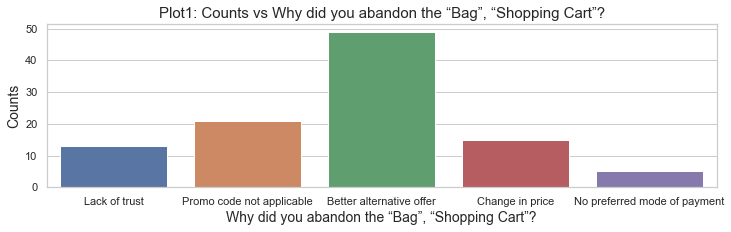

In [1465]:
#visualize this column by Countplot
plt.figure(figsize =(12,3))
sns.countplot(x = 'Why did you abandon the “Bag”, “Shopping Cart”?', data=df)
plt.xlabel('Why did you abandon the “Bag”, “Shopping Cart”?', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)
plt.title("Plot1: Counts vs Why did you abandon the “Bag”, “Shopping Cart”?", fontsize = 15)
plt.savefig('abnadon.jpg')

Text(0.5, 1.0, 'Plot2: How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?vs Why did you abandon the “Bag”, “Shopping Cart”?')

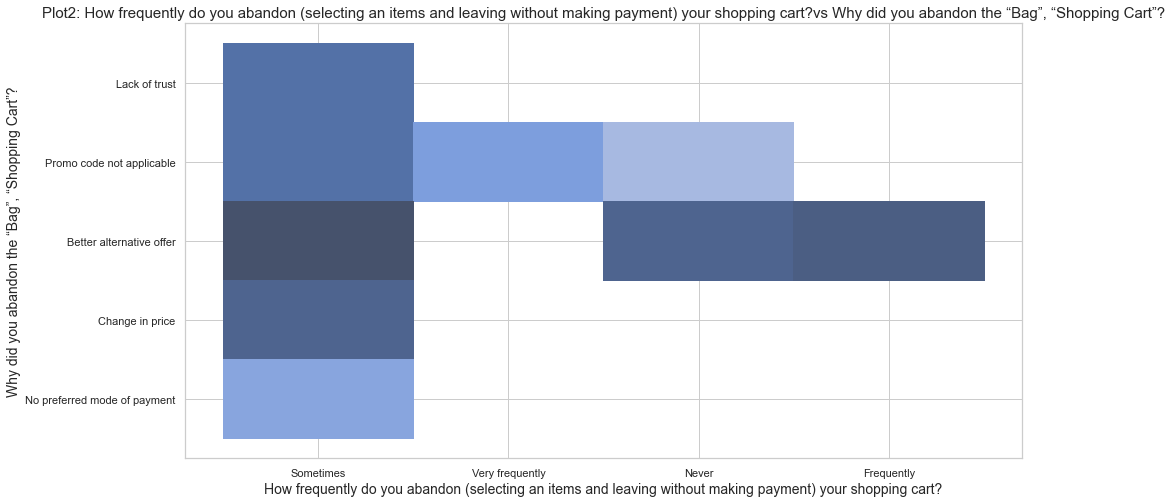

In [1466]:
#visualize this column by histplot
plt.figure(figsize=(15,8))
sns.histplot(x= 'How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?',y= 'Why did you abandon the “Bag”, “Shopping Cart”?', data=df)
plt.xlabel('How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?', fontsize = 14)
plt.ylabel('Why did you abandon the “Bag”, “Shopping Cart”?', fontsize = 14)
plt.title('Plot2: How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?vs Why did you abandon the “Bag”, “Shopping Cart”?', fontsize = 15)

Observation:
1. in plot1 and plot2, we can see, people abandon the “Bag”, “Shopping Cart” beacuse they see better alternatives

In [1467]:
#check the updated shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (103, 71)


# Column18: The content on the website must be easy to read and understand

In [1468]:
#clean the column by using rename command
df.rename(columns={'18 The content on the website must be easy to read and understand': 'The content on the website must be easy to read and understand'}, inplace=True)

In [1469]:
df['The content on the website must be easy to read and understand'].unique() #check the unique value

array(['Agree (4)', 'Strongly agree (5)', 'Strongly disagree (1)',
       'Indifferent (3)'], dtype=object)

In [1470]:
df['The content on the website must be easy to read and understand'].value_counts() #check the counts of unique values

Strongly agree (5)       60
Agree (4)                33
Strongly disagree (1)     8
Indifferent (3)           2
Name: The content on the website must be easy to read and understand, dtype: int64

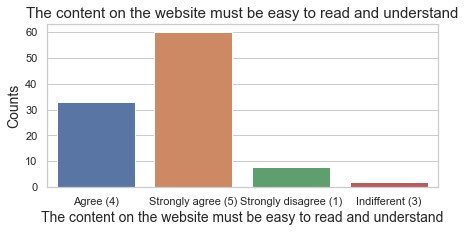

In [1471]:
#visualize this column by Countplot
plt.figure(figsize =(7,3))
sns.countplot(x = 'The content on the website must be easy to read and understand', data=df)
plt.xlabel('The content on the website must be easy to read and understand', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)
plt.title("The content on the website must be easy to read and understand", fontsize = 15)
plt.savefig('website.jpg')

Text(0.5, 1.0, 'Plot2: How old are you? vs The content on the website must be easy to read and understand')

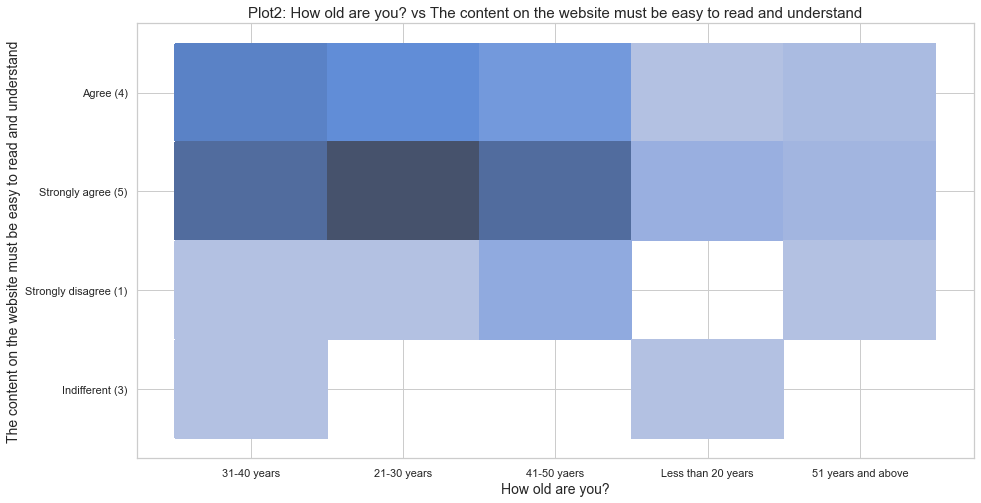

In [1472]:
#visualize this column by histplot
plt.figure(figsize=(15,8))
sns.histplot(x= 'How old are you?',y= 'The content on the website must be easy to read and understand', data=df)
plt.xlabel('How old are you?', fontsize = 14)
plt.ylabel('The content on the website must be easy to read and understand', fontsize = 14)
plt.title('Plot2: How old are you? vs The content on the website must be easy to read and understand', fontsize = 15)

In [1473]:
df.groupby('Gender of respondent')['The content on the website must be easy to read and understand'].value_counts(normalize = True) 
#check the relationship3 between column and label

Gender of respondent  The content on the website must be easy to read and understand
Female                Strongly agree (5)                                                0.636364
                      Agree (4)                                                         0.272727
                      Strongly disagree (1)                                             0.075758
                      Indifferent (3)                                                   0.015152
Male                  Strongly agree (5)                                                0.486486
                      Agree (4)                                                         0.405405
                      Strongly disagree (1)                                             0.081081
                      Indifferent (3)                                                   0.027027
Name: The content on the website must be easy to read and understand, dtype: float64

Text(0.5, 1.0, 'Plot2: Which city do you shop online from? vs The content on the website must be easy to read and understand')

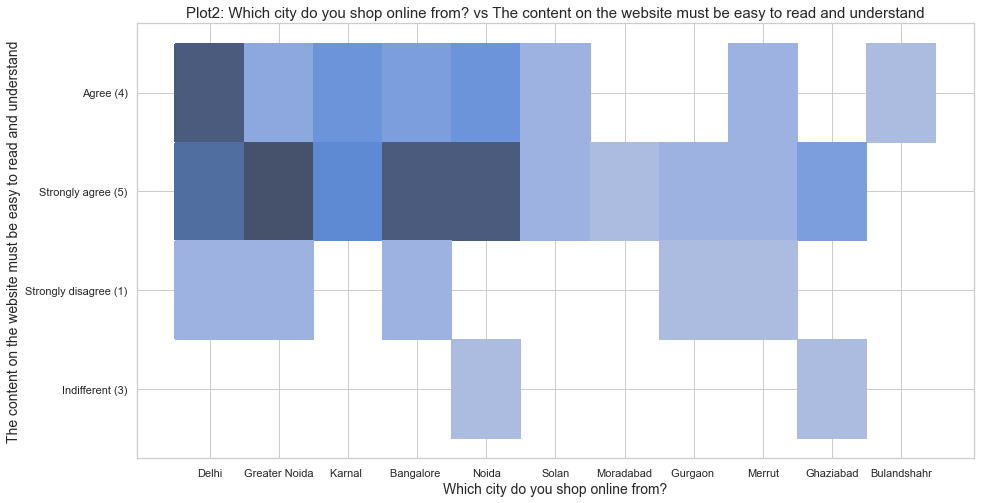

In [1474]:
#visualize this column by histplot
plt.figure(figsize=(15,8))
sns.histplot(x= 'Which city do you shop online from?',y= 'The content on the website must be easy to read and understand', data=df)
plt.xlabel('Which city do you shop online from?', fontsize = 14)
plt.ylabel('The content on the website must be easy to read and understand', fontsize = 14)
plt.title('Plot2: Which city do you shop online from? vs The content on the website must be easy to read and understand', fontsize = 15)

Text(0.5, 1.0, 'Plot3: Since How Long You are Shopping Online? vs The content on the website must be easy to read and understand')

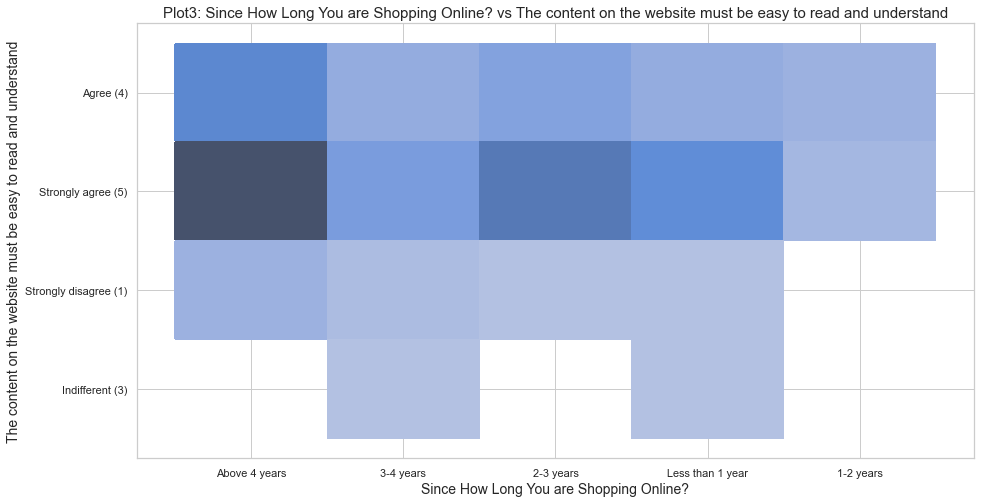

In [1475]:
#visualize this column by histplot
plt.figure(figsize=(15,8))
sns.histplot(x= 'Since How Long You are Shopping Online?',y= 'The content on the website must be easy to read and understand', data=df)
plt.xlabel('Since How Long You are Shopping Online?', fontsize = 14)
plt.ylabel('The content on the website must be easy to read and understand', fontsize = 14)
plt.title('Plot3: Since How Long You are Shopping Online? vs The content on the website must be easy to read and understand', fontsize = 15)

Observation:
1. In plot1, peoples are strongly agree about the content on the website must be easy to read and understand
2. In plot2, 21-30 years old people's are strongly agree with this thing
3. In plot3, peoples who are doing shopping more than 4 years, they are strongly agree about the content on the website must be easy to read and understand

In [1476]:
#check the updated shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (103, 71)


# Column19:Information on similar product to the one highlighted is important for product comparison

In [1477]:
#clean the column by using rename command
df.rename(columns={'19 Information on similar product to the one highlighted  is important for product comparison': 'Information on similar product to the one highlighted is important for product comparison'}, inplace=True)

In [1478]:
df['Information on similar product to the one highlighted is important for product comparison'].unique() #check the unique value

array(['Indifferent (3)', 'Strongly agree (5)', 'Agree (4)',
       'Dis-agree (2)'], dtype=object)

In [1479]:
df['Information on similar product to the one highlighted is important for product comparison'].value_counts() #check the counts of unique values

Strongly agree (5)    40
Agree (4)             35
Indifferent (3)       20
Dis-agree (2)          8
Name: Information on similar product to the one highlighted is important for product comparison, dtype: int64

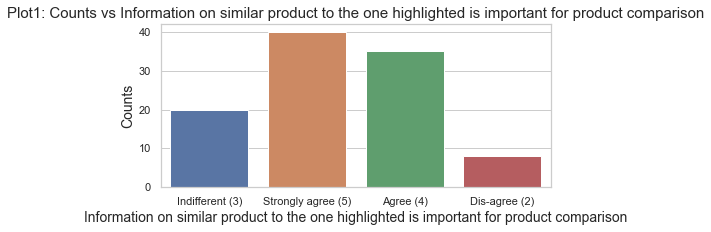

In [1480]:
#visualize this column by Countplot
plt.figure(figsize =(7,3))
sns.countplot(x = 'Information on similar product to the one highlighted is important for product comparison', data=df)
plt.xlabel('Information on similar product to the one highlighted is important for product comparison', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)
plt.title("Plot1: Counts vs Information on similar product to the one highlighted is important for product comparison", fontsize = 15)
plt.savefig('comparison.jpg')

Text(0.5, 1.0, 'Plot2: Since How Long You are Shopping Online? vs Information on similar product to the one highlighted is important for product comparison')

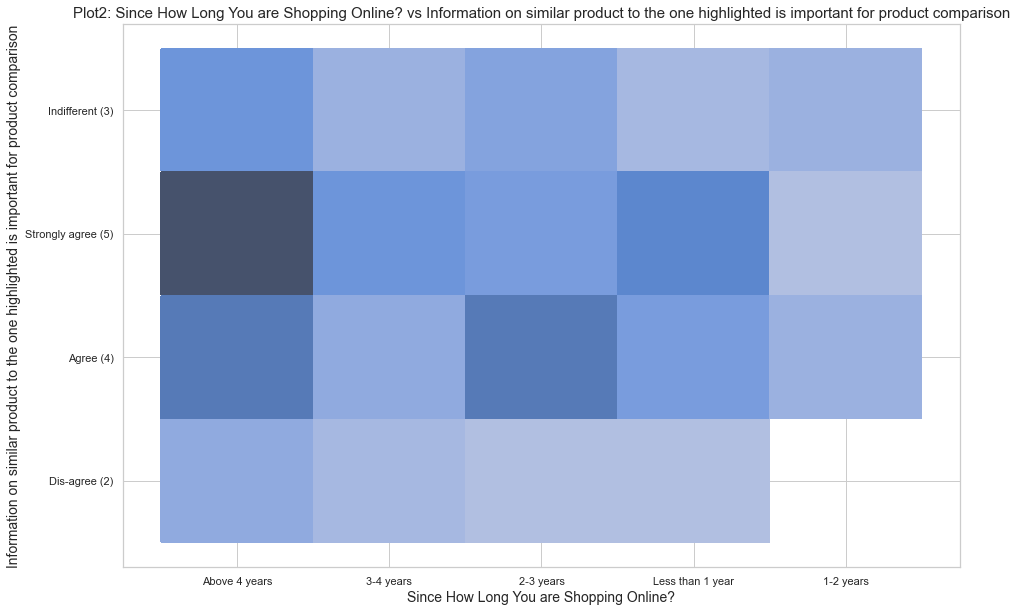

In [1481]:
#visualize this column by histplot
plt.figure(figsize=(15,10))
sns.histplot(x= 'Since How Long You are Shopping Online?',y= 'Information on similar product to the one highlighted is important for product comparison', data=df)
plt.xlabel('Since How Long You are Shopping Online?', fontsize = 14)
plt.ylabel('Information on similar product to the one highlighted is important for product comparison', fontsize = 14)
plt.title('Plot2: Since How Long You are Shopping Online? vs Information on similar product to the one highlighted is important for product comparison', fontsize = 15)

Observation:
1. In plot1, we can see, people's are strongly agree that Information on similar product to the one highlighted is important for product comparison
2. In plot2, we can see, those people's are strongly agree who are doing shopping more than 4 years 

In [1482]:
#check the updated shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (103, 71)


# Column20: Complete information on listed seller and product being offered is important for purchase decision

In [1483]:
#clean the column by using rename command
df.rename(columns={'20 Complete information on listed seller and product being offered is important for purchase decision.': 'Complete information on listed seller and product being offered is important for purchase decision'}, inplace=True)

In [1484]:
df['Complete information on listed seller and product being offered is important for purchase decision'].unique() #check the unique value

array(['Indifferent (3)', 'Strongly agree (5)', 'Agree (4)',
       'Dis-agree (2)', 'Strongly disagree (1)'], dtype=object)

In [1485]:
df['Complete information on listed seller and product being offered is important for purchase decision'].value_counts() #check the counts of unique values

Agree (4)                38
Strongly agree (5)       30
Indifferent (3)          24
Dis-agree (2)             8
Strongly disagree (1)     3
Name: Complete information on listed seller and product being offered is important for purchase decision, dtype: int64

Text(0.5, 1.0, 'Plot1: Counts vs Complete information on listed seller and product being offered is important for purchase decision')

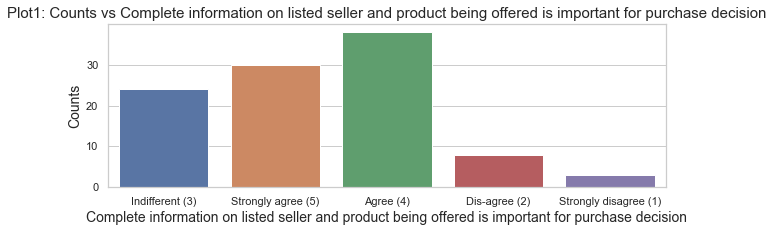

In [1486]:
#visualize this column by Countplot
plt.figure(figsize =(10,3))
sns.countplot(x = 'Complete information on listed seller and product being offered is important for purchase decision', data=df)
plt.xlabel('Complete information on listed seller and product being offered is important for purchase decision', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)
plt.title("Plot1: Counts vs Complete information on listed seller and product being offered is important for purchase decision", fontsize = 15)

Text(0.5, 1.0, 'Plot2: Complete information on listed seller and product being offered is important for purchase decision vs The content on the website must be easy to read and understand')

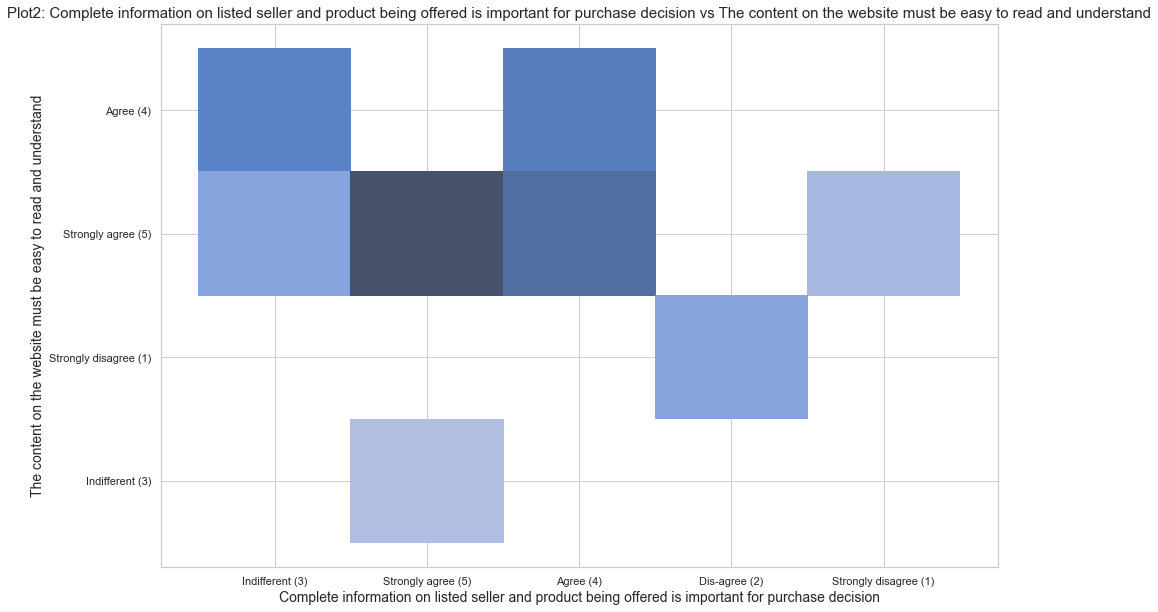

In [1487]:
#visualize this column by histplot
plt.figure(figsize=(15,10))
sns.histplot(x= 'Complete information on listed seller and product being offered is important for purchase decision',y= 'The content on the website must be easy to read and understand', data=df)
plt.xlabel('Complete information on listed seller and product being offered is important for purchase decision', fontsize = 14)
plt.ylabel('The content on the website must be easy to read and understand', fontsize = 14)
plt.title('Plot2: Complete information on listed seller and product being offered is important for purchase decision vs The content on the website must be easy to read and understand', fontsize = 15)

Text(0.5, 1.0, 'Plot3: Complete information on listed seller and product being offered is important for purchase decision vs Since How Long You are Shopping Online?')

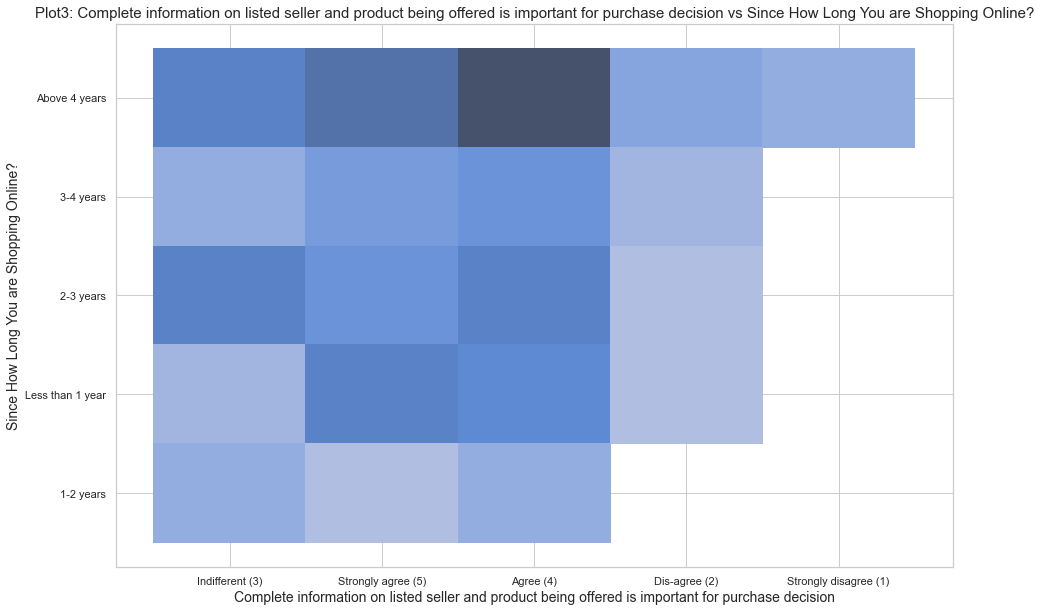

In [1488]:
#visualize this column by histplot
plt.figure(figsize=(15,10))
sns.histplot(x= 'Complete information on listed seller and product being offered is important for purchase decision',y= 'Since How Long You are Shopping Online?', data=df)
plt.xlabel('Complete information on listed seller and product being offered is important for purchase decision', fontsize = 14)
plt.ylabel('Since How Long You are Shopping Online?', fontsize = 14)
plt.title('Plot3: Complete information on listed seller and product being offered is important for purchase decision vs Since How Long You are Shopping Online?', fontsize = 15)

Observation:
1. In plot1, people are agree with 'Complete information on listed seller and product being offered is important for purchase decision'
2. In plot2, people's are strongly agree with if complete information has given than the content on the website is easy to read and understand.
3. In plot3, peoples who do shopping more than 4 years, they also agree with this thing

In [1489]:
#check the updated shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (103, 71)


# Column21: All relevant information on listed products must be stated clearly

In [1490]:
#clean the column by using rename command
df.rename(columns={'21 All relevant information on listed products must be stated clearly': 'All relevant information on listed products must be stated clearly'}, inplace=True)

In [1491]:
df['All relevant information on listed products must be stated clearly'].unique() #check the unique value

array(['Agree (4)', 'Strongly agree (5)', 'Strongly disagree (1)',
       'Dis-agree (2)'], dtype=object)

In [1492]:
df['All relevant information on listed products must be stated clearly'].value_counts() #check the counts of unique values

Agree (4)                54
Strongly agree (5)       37
Strongly disagree (1)     8
Dis-agree (2)             4
Name: All relevant information on listed products must be stated clearly, dtype: int64

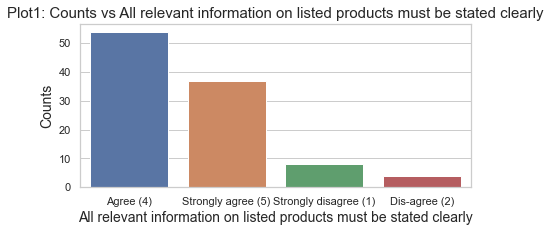

In [1493]:
#visualize this column by Countplot
plt.figure(figsize =(7,3))
sns.countplot(x = 'All relevant information on listed products must be stated clearly', data=df)
plt.xlabel('All relevant information on listed products must be stated clearly', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)
plt.title("Plot1: Counts vs All relevant information on listed products must be stated clearly", fontsize = 15)
plt.savefig('listed.jpg')

Observation:
1. In plot1, mostly people's are agree with this that all relevant information on listed products must be stated clearly

In [1494]:
#check the updated shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (103, 71)


# Column22: Ease of navigation in website

In [1495]:
#clean the column by using rename command
df.rename(columns={'22 Ease of navigation in website': 'Ease of navigation in website'}, inplace=True)

In [1496]:
df['Ease of navigation in website'].unique() #check the unique value

array(['Agree (4)', 'Strongly agree (5)', 'Strongly disagree (1)',
       'Dis-agree (2)'], dtype=object)

In [1497]:
df['Ease of navigation in website'].value_counts() #check the counts of unique values

Strongly agree (5)       51
Agree (4)                42
Strongly disagree (1)     8
Dis-agree (2)             2
Name: Ease of navigation in website, dtype: int64

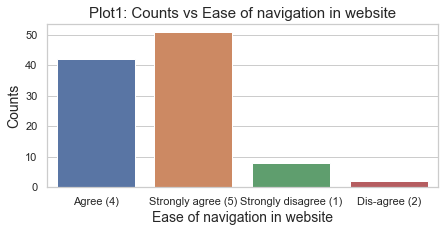

In [1498]:
#visualize this column by Countplot
plt.figure(figsize =(7,3))
sns.countplot(x = 'Ease of navigation in website', data=df)
plt.xlabel('Ease of navigation in website', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)
plt.title("Plot1: Counts vs Ease of navigation in website", fontsize = 15)
plt.savefig('ease.jpg')

Observation:
1. In plot1, people strongly agree that their is ease of navigation in website

In [1499]:
#check the updated shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (103, 71)


# Column23: Loading and processing speed

In [1500]:
#clean the column by using rename command
df.rename(columns={'23 Loading and processing speed': 'Loading and processing speed'}, inplace=True)

In [1501]:
df['Loading and processing speed'].unique() #check the unique value

array(['Strongly disagree (1)', 'Strongly agree (5)', 'Agree (4)',
       'Dis-agree (2)', 'Indifferent (3)'], dtype=object)

In [1502]:
df['Loading and processing speed'].value_counts() #check the counts of unique values

Strongly agree (5)       45
Agree (4)                41
Dis-agree (2)             8
Strongly disagree (1)     5
Indifferent (3)           4
Name: Loading and processing speed, dtype: int64

Text(0.5, 1.0, 'Plot1: Counts vs Loading and processing speed')

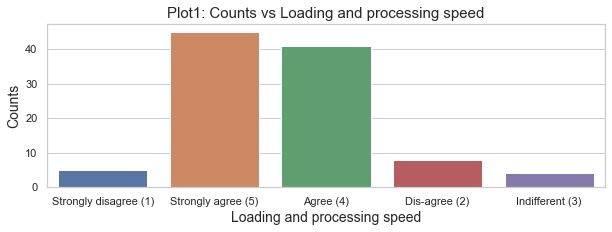

In [1503]:
#visualize this column by Countplot
plt.figure(figsize =(10,3))
sns.countplot(x = 'Loading and processing speed', data=df)
plt.xlabel('Loading and processing speed', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)
plt.title("Plot1: Counts vs Loading and processing speed", fontsize = 15)

In [1504]:
df.groupby('What is the operating system (OS) of your device?')['Loading and processing speed'].value_counts(normalize = True) 
#check the relationship1 between column and label

What is the operating system (OS) of your device?  Loading and processing speed
Android                                            Agree (4)                       0.600000
                                                   Strongly agree (5)              0.300000
                                                   Indifferent (3)                 0.066667
                                                   Dis-agree (2)                   0.033333
IOS/Mac                                            Strongly agree (5)              0.518519
                                                   Agree (4)                       0.481481
Window/windows Mobile                              Strongly agree (5)              0.478261
                                                   Agree (4)                       0.217391
                                                   Dis-agree (2)                   0.152174
                                                   Strongly disagree (1)           0.108696


Observation:
1. In plot1, people's are strongly agree about loading and precessing speed
2. In relationship1, android users are less strongly agree than agree, rest all are strongly agree with this condition

In [1505]:
#check the updated shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (103, 71)


# Column24: User friendly Interface of the website

In [1506]:
#clean the column by using rename command
df.rename(columns={'24 User friendly Interface of the website': 'User friendly Interface of the website'}, inplace=True)

In [1507]:
df['User friendly Interface of the website'].unique() #check the unique value

array(['Dis-agree (2)', 'Strongly agree (5)', 'Agree (4)',
       'Strongly disagree (1)', 'Indifferent (3)'], dtype=object)

In [1508]:
df['User friendly Interface of the website'].value_counts() #check the counts of unique values

Strongly agree (5)       72
Agree (4)                16
Strongly disagree (1)     8
Dis-agree (2)             5
Indifferent (3)           2
Name: User friendly Interface of the website, dtype: int64

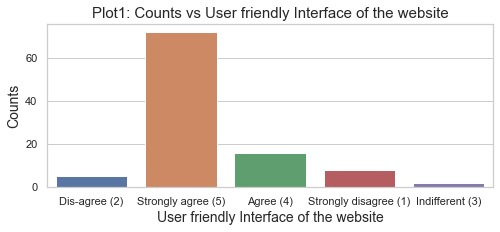

In [1509]:
#visualize this column by Countplot
plt.figure(figsize =(8,3))
sns.countplot(x = 'User friendly Interface of the website', data=df)
plt.xlabel('User friendly Interface of the website', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)
plt.title("Plot1: Counts vs User friendly Interface of the website", fontsize = 15)
plt.savefig('userfriendly.jpg')

Text(0.5, 1.0, 'Plot2: User friendly Interface of the website vs How old are you?')

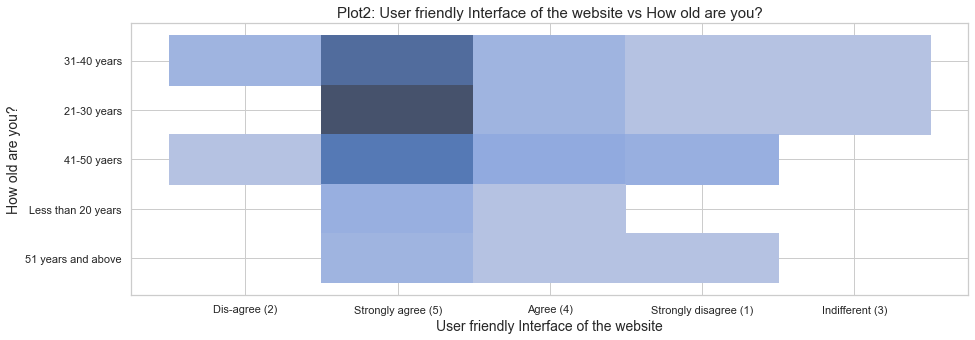

In [1510]:
#visualize this column by histplot
plt.figure(figsize=(15,5))
sns.histplot(x= 'User friendly Interface of the website',y= 'How old are you?', data=df)
plt.xlabel('User friendly Interface of the website', fontsize = 14)
plt.ylabel('How old are you?', fontsize = 14)
plt.title('Plot2: User friendly Interface of the website vs How old are you?', fontsize = 15)

Observation:
1. In plot1, people's are strongly agree with user friendly interface of the website
2. In plot2, 21-30 years old people's are strongly agree with this

In [1511]:
#check the updated shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (103, 71)


# Column25:Convenient Payment methods

In [1512]:
#clean the column by using rename command
df.rename(columns={'25 Convenient Payment methods': 'Convenient Payment methods'}, inplace=True)

In [1513]:
df['Convenient Payment methods'].unique() #check the unique value

array(['Dis-agree (2)', 'Strongly agree (5)', 'Agree (4)'], dtype=object)

In [1514]:
df['Convenient Payment methods'].value_counts() #check the counts of unique values

Strongly agree (5)    60
Agree (4)             30
Dis-agree (2)         13
Name: Convenient Payment methods, dtype: int64

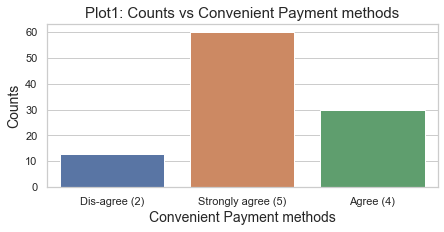

In [1515]:
#visualize this column by Countplot
plt.figure(figsize =(7,3))
sns.countplot(x = 'Convenient Payment methods', data=df)
plt.xlabel('Convenient Payment methods', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)
plt.title("Plot1: Counts vs Convenient Payment methods", fontsize = 15)
plt.savefig('convenient.jpg')

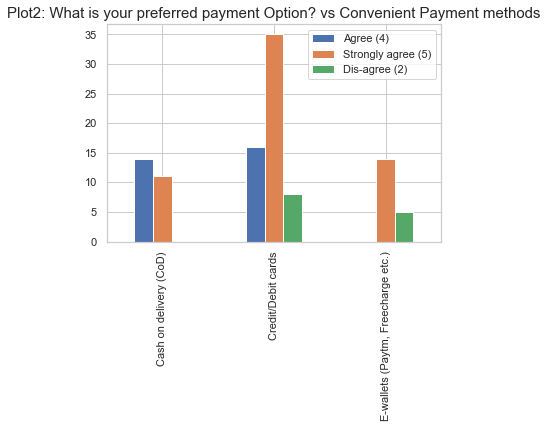

In [1516]:
#visualize by using barplot
df_PaymentMethod = {'Agree (4)': [14,16,0],
        'Strongly agree (5)': [11,35,14], 'Dis-agree (2)':[0,8,5] }
df1 = pd.DataFrame(df_PaymentMethod,columns=['Agree (4)','Strongly agree (5)','Dis-agree (2)'], index = ['Cash on delivery (CoD)','Credit/Debit cards','E-wallets (Paytm, Freecharge etc.)'])
df1.plot.bar()
plt.title('Plot2: What is your preferred payment Option? vs Convenient Payment methods', fontsize = 15)
plt.show()

Observation:
1. In plot1, people's are strongly agree with Convenient Payment methods
2. In plot2, people's who are using credit/debit cards, those people's are agree with this

In [1517]:
#check the updated shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (103, 71)


# Column26: Trust that the online retail store will fulfill its part of the transaction at the stipulated time

In [1518]:
#clean the column by using rename command
df.rename(columns={'26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time': 'Trust that the online retail store will fulfill its part of the transaction at the stipulated time'}, inplace=True)

In [1519]:
df['Trust that the online retail store will fulfill its part of the transaction at the stipulated time'].unique() 
#check the unique value

array(['Disagree (2)', 'Strongly agree (5)', 'Agree (4)',
       'indifferent  (3)'], dtype=object)

In [1520]:
df['Trust that the online retail store will fulfill its part of the transaction at the stipulated time'].value_counts() 
#check the counts of unique values

Strongly agree (5)    52
Agree (4)             34
Disagree (2)          13
indifferent  (3)       4
Name: Trust that the online retail store will fulfill its part of the transaction at the stipulated time, dtype: int64

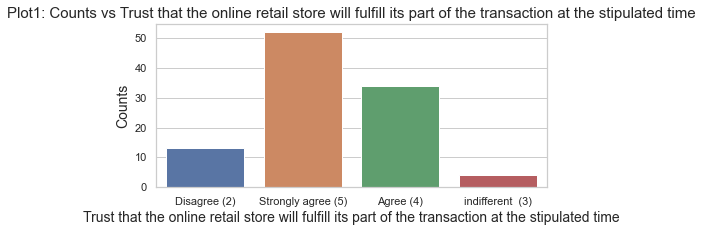

In [1521]:
#visualize this column by Countplot
plt.figure(figsize =(7,3))
sns.countplot(x = 'Trust that the online retail store will fulfill its part of the transaction at the stipulated time', data=df)
plt.xlabel('Trust that the online retail store will fulfill its part of the transaction at the stipulated time', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)
plt.title("Plot1: Counts vs Trust that the online retail store will fulfill its part of the transaction at the stipulated time", fontsize = 15)
plt.savefig('trust.jpg')

In [1522]:
df.groupby('What is your preferred payment Option?')['Trust that the online retail store will fulfill its part of the transaction at the stipulated time'].value_counts(normalize = True) 
#check the relationship1 between column and label

What is your preferred payment Option?  Trust that the online retail store will fulfill its part of the transaction at the stipulated time
Cash on delivery (CoD)                  Strongly agree (5)                                                                                    0.760000
                                        indifferent  (3)                                                                                      0.160000
                                        Agree (4)                                                                                             0.080000
Credit/Debit cards                      Agree (4)                                                                                             0.542373
                                        Strongly agree (5)                                                                                    0.322034
                                        Disagree (2)                                                      

Text(0.5, 1.0, 'Plot2: Trust that the online retail store will fulfill its part of the transaction at the stipulated time vs What is your preferred payment Option?')

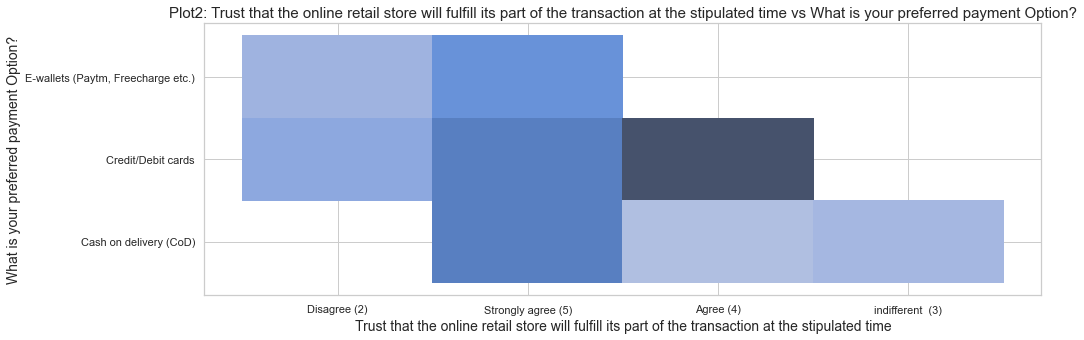

In [1523]:
#visualize this column by histplot
plt.figure(figsize=(15,5))
sns.histplot(x= 'Trust that the online retail store will fulfill its part of the transaction at the stipulated time',y= 'What is your preferred payment Option?', data=df)
plt.xlabel('Trust that the online retail store will fulfill its part of the transaction at the stipulated time', fontsize = 14)
plt.ylabel('What is your preferred payment Option?', fontsize = 14)
plt.title('Plot2: Trust that the online retail store will fulfill its part of the transaction at the stipulated time vs What is your preferred payment Option?', fontsize = 15)

Observation:
1. In plot1, strongly agreed people's are more in count
2. In relationship, people who use COD are more in strongly agree category interms of percentage wise
3. In plot2, credit/debit card users are more to agree this 

In [1524]:
#check the updated shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (103, 71)


# Column27: Empathy (readiness to assist with queries) towards the customers

In [1525]:
#clean the column by using rename command
df.rename(columns={'27 Empathy (readiness to assist with queries) towards the customers': 'Empathy (readiness to assist with queries) towards the customers'}, inplace=True)

In [1526]:
df['Empathy (readiness to assist with queries) towards the customers'].unique() #check the unique value

array(['Strongly agree (5)', 'Agree (4)', 'Strongly disagree (1)',
       'indifferent (3)'], dtype=object)

In [1527]:
df['Empathy (readiness to assist with queries) towards the customers'].value_counts() #check the counts of unique values

Strongly agree (5)       75
Agree (4)                16
Strongly disagree (1)     8
indifferent (3)           4
Name: Empathy (readiness to assist with queries) towards the customers, dtype: int64

Text(0.5, 1.0, 'Plot1: Counts vs Empathy (readiness to assist with queries) towards the customers')

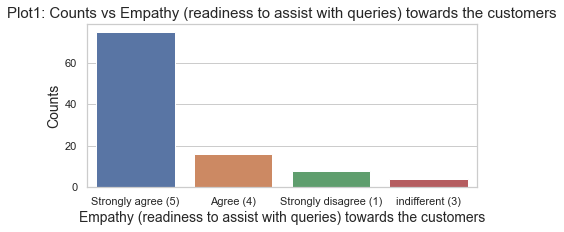

In [1528]:
#visualize this column by Countplot
plt.figure(figsize =(7,3))
sns.countplot(x = 'Empathy (readiness to assist with queries) towards the customers', data=df)
plt.xlabel('Empathy (readiness to assist with queries) towards the customers', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)
plt.title("Plot1: Counts vs Empathy (readiness to assist with queries) towards the customers", fontsize = 15)

Observation:
1. In plot1, the count of strongly agree are more than others

In [1529]:
#check the updated shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (103, 71)


# Column28: Being able to guarantee the privacy of the customer

In [1530]:
#clean the column by using rename command
df.rename(columns={'28 Being able to guarantee the privacy of the customer': 'Being able to guarantee the privacy of the customer'}, inplace=True)

In [1531]:
df['Being able to guarantee the privacy of the customer'].unique() #check the unique value

array(['Agree (4)', 'Strongly agree (5)', 'indifferent (3)'], dtype=object)

In [1532]:
df['Being able to guarantee the privacy of the customer'].value_counts() #check the counts of unique values

Strongly agree (5)    69
Agree (4)             24
indifferent (3)       10
Name: Being able to guarantee the privacy of the customer, dtype: int64

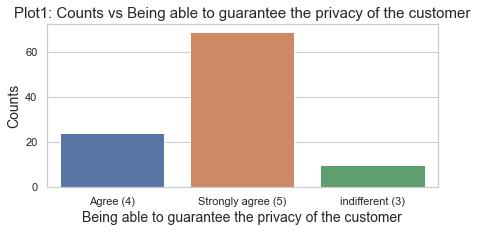

In [1533]:
#visualize this column by Countplot
plt.figure(figsize =(7,3))
sns.countplot(x = 'Being able to guarantee the privacy of the customer', data=df)
plt.xlabel('Being able to guarantee the privacy of the customer', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)
plt.title("Plot1: Counts vs Being able to guarantee the privacy of the customer", fontsize = 15)
plt.savefig('privacy.jpg')

Observation:
1. In plot1, People's are strongly agree with that companies are being able to guarantee the privacy of the customer

In [1534]:
#check the updated shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (103, 71)


# Column29: Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)

In [1535]:
#clean the column by using rename command
df.rename(columns={'29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)': 'Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)'}, inplace=True)

In [1536]:
df['Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)'].unique() 
#check the unique value

array(['Agree (4)', 'Strongly agree (5)', 'indifferent (3)',
       'Strongly disagree (1)'], dtype=object)

In [1537]:
df['Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)'].value_counts() 
#check the counts of unique values

Strongly agree (5)       59
Agree (4)                36
indifferent (3)           5
Strongly disagree (1)     3
Name: Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.), dtype: int64

Text(0.5, 1.0, 'Plot1: Counts vs Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)')

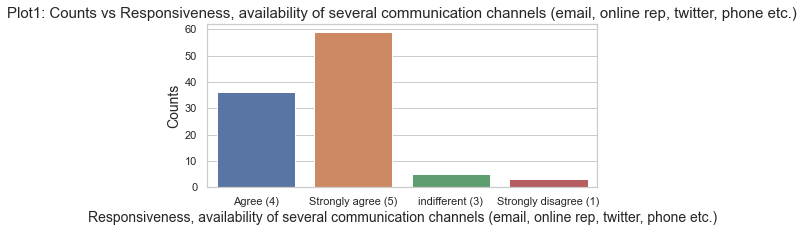

In [1538]:
#visualize this column by Countplot
plt.figure(figsize =(7,3))
sns.countplot(x = 'Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)', data=df)
plt.xlabel('Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)
plt.title("Plot1: Counts vs Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)", fontsize = 15)

Observation:
1. In plot1, People's are strongly agreed with Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)

In [1539]:
#check the updated shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (103, 71)


# Column30: Online shopping gives monetary benefit and discounts

In [1540]:
#clean the column by using rename command
df.rename(columns={'30 Online shopping gives monetary benefit and discounts': 'Online shopping gives monetary benefit and discounts'}, inplace=True)

In [1541]:
df['Online shopping gives monetary benefit and discounts'].unique() #check the unique value

array(['indifferent (3)', 'Strongly agree (5)', 'Agree (4)',
       'Strongly disagree (1)', 'Dis-agree (2)'], dtype=object)

In [1542]:
df['Online shopping gives monetary benefit and discounts'].value_counts() #check the counts of unique values

Strongly agree (5)       41
Agree (4)                33
indifferent (3)          16
Strongly disagree (1)     8
Dis-agree (2)             5
Name: Online shopping gives monetary benefit and discounts, dtype: int64

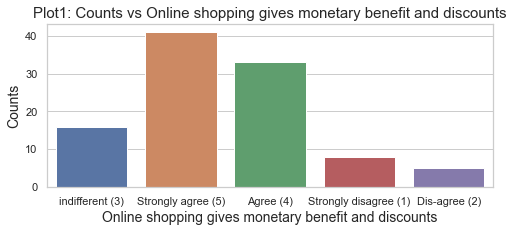

In [1543]:
#visualize this column by Countplot
plt.figure(figsize =(8,3))
sns.countplot(x = 'Online shopping gives monetary benefit and discounts', data=df)
plt.xlabel('Online shopping gives monetary benefit and discounts', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)
plt.title("Plot1: Counts vs Online shopping gives monetary benefit and discounts", fontsize = 15)
plt.savefig('benefits.jpg')

Observation:
1. In plot1, People's are strongly agree with Online shopping gives monetary benefit and discounts

In [1544]:
#check the updated shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (103, 71)


# Column31: Enjoyment is derived from shopping online

In [1545]:
#clean the column by using rename command
df.rename(columns={'31 Enjoyment is derived from shopping online': 'Enjoyment is derived from shopping online'}, inplace=True)

In [1546]:
df['Enjoyment is derived from shopping online'].unique() #check the unique value

array(['Strongly disagree (1)', 'Strongly agree (5)', 'indifferent (3)',
       'Agree (4)', 'Dis-agree (2)'], dtype=object)

In [1547]:
df['Enjoyment is derived from shopping online'].value_counts() #check the counts of unique values

Strongly agree (5)       34
indifferent (3)          27
Agree (4)                23
Strongly disagree (1)    13
Dis-agree (2)             6
Name: Enjoyment is derived from shopping online, dtype: int64

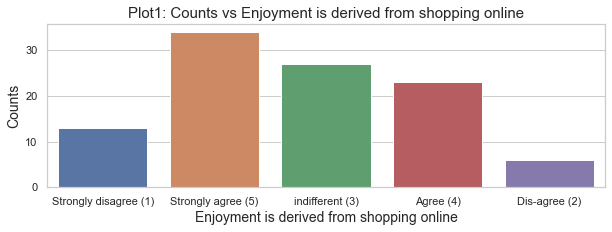

In [1548]:
#visualize this column by Countplot
plt.figure(figsize =(10,3))
sns.countplot(x = 'Enjoyment is derived from shopping online', data=df)
plt.xlabel('Enjoyment is derived from shopping online', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)
plt.title("Plot1: Counts vs Enjoyment is derived from shopping online", fontsize = 15)
plt.savefig('enjoyment.jpg')

Text(0.5, 1.0, 'Plot2: Enjoyment is derived from shopping online vs Since How Long You are Shopping Online?')

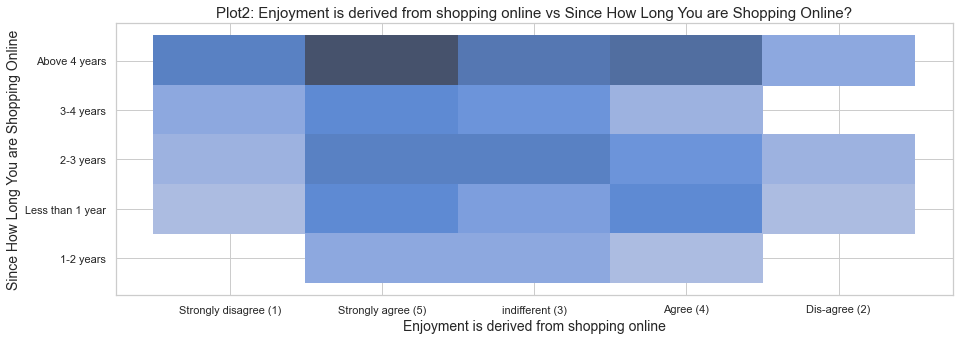

In [1549]:
#visualize this column by histplot
plt.figure(figsize=(15,5))
sns.histplot(x= 'Enjoyment is derived from shopping online',y= 'Since How Long You are Shopping Online?', data=df)
plt.xlabel('Enjoyment is derived from shopping online', fontsize = 14)
plt.ylabel('Since How Long You are Shopping Online', fontsize = 14)
plt.title('Plot2: Enjoyment is derived from shopping online vs Since How Long You are Shopping Online?', fontsize = 15)

Observation:
1. In plot1, People's are strongly agree with the enjoyment is derived from shopping online
2. In plot2, people's who do shopping more than 4 years, they strongly agree about Enjoyment is derived from shopping online

In [1550]:
#check the updated shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (103, 71)


# Column32: Shopping online is convenient and flexible

In [1551]:
#clean the column by using rename command
df.rename(columns={'32 Shopping online is convenient and flexible': 'Shopping online is convenient and flexible'}, inplace=True)

In [1552]:
df['Shopping online is convenient and flexible'].unique() #check the unique value

array(['Dis-agree (2)', 'Strongly agree (5)', 'indifferent (3)',
       'Agree (4)'], dtype=object)

In [1553]:
df['Shopping online is convenient and flexible'].value_counts() #check the counts of unique values

Strongly agree (5)    56
Agree (4)             29
indifferent (3)       13
Dis-agree (2)          5
Name: Shopping online is convenient and flexible, dtype: int64

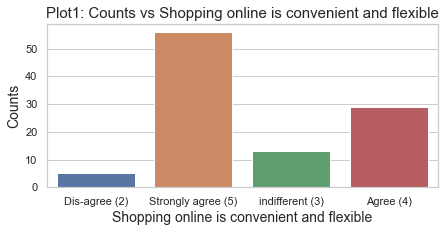

In [1554]:
#visualize this column by Countplot
plt.figure(figsize =(7,3))
sns.countplot(x = 'Shopping online is convenient and flexible', data=df)
plt.xlabel('Shopping online is convenient and flexible', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)
plt.title("Plot1: Counts vs Shopping online is convenient and flexible", fontsize = 15)
plt.savefig('flexible.jpg')

Text(0.5, 1.0, 'Plot2: Shopping online is convenient and flexible vs Since How Long You are Shopping Online?')

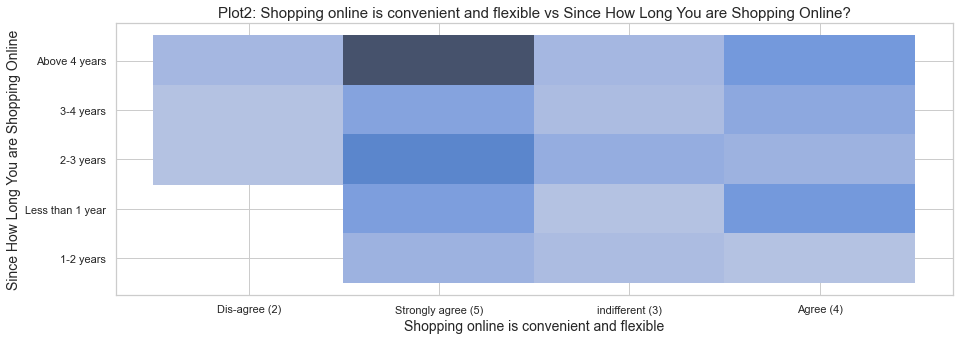

In [1555]:
#visualize this column by histplot
plt.figure(figsize=(15,5))
sns.histplot(x= 'Shopping online is convenient and flexible',y= 'Since How Long You are Shopping Online?', data=df)
plt.xlabel('Shopping online is convenient and flexible', fontsize = 14)
plt.ylabel('Since How Long You are Shopping Online', fontsize = 14)
plt.title('Plot2: Shopping online is convenient and flexible vs Since How Long You are Shopping Online?', fontsize = 15)

Observation:
1. In plot1, People's are strongly agree with shopping online is convenient and flexible
2. In plot2, people's who do shopping more than 4 years, they strongly agree about Shopping online is convenient and flexible

In [1556]:
#check the updated shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (103, 71)


# Column33: Return and replacement policy of the e-tailer is important for purchase decision

In [1557]:
#clean the column by using rename command
df.rename(columns={'33 Return and replacement policy of the e-tailer is important for purchase decision': 'Return and replacement policy of the e-tailer is important for purchase decision'}, inplace=True)

In [1558]:
df['Return and replacement policy of the e-tailer is important for purchase decision'].unique() 
#check the unique value

array(['Dis-agree (2)', 'Strongly agree (5)', 'Agree (4)'], dtype=object)

In [1559]:
df['Return and replacement policy of the e-tailer is important for purchase decision'].value_counts() 
#check the counts of unique values

Strongly agree (5)    76
Agree (4)             20
Dis-agree (2)          7
Name: Return and replacement policy of the e-tailer is important for purchase decision, dtype: int64

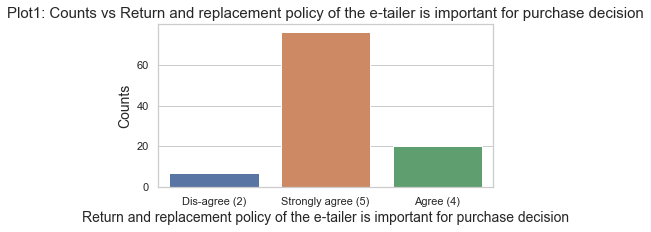

In [1560]:
#visualize this column by Countplot
plt.figure(figsize =(6,3))
sns.countplot(x = 'Return and replacement policy of the e-tailer is important for purchase decision', data=df)
plt.xlabel('Return and replacement policy of the e-tailer is important for purchase decision', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)
plt.title("Plot1: Counts vs Return and replacement policy of the e-tailer is important for purchase decision", fontsize = 15)
plt.savefig('return.jpg')

Observation:
1. In plot1, People's are strongly agree with return and replacement policy of the e-tailor is important for purchase decision

In [1561]:
#check the updated shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (103, 71)


# Column34: Gaining access to loyalty programs is a benefit of shopping online

In [1562]:
#clean the column by using rename command
df.rename(columns={'34 Gaining access to loyalty programs is a benefit of shopping online': 'Gaining access to loyalty programs is a benefit of shopping online'}, inplace=True)

In [1563]:
df['Gaining access to loyalty programs is a benefit of shopping online'].unique() 
#check the unique value

array(['Agree (4)', 'Strongly agree (5)', 'indifferent (3)',
       'Dis-agree (2)', 'Strongly disagree (1)'], dtype=object)

In [1564]:
df['Gaining access to loyalty programs is a benefit of shopping online'].value_counts() 
#check the counts of unique values

Strongly agree (5)       44
Agree (4)                24
indifferent (3)          22
Dis-agree (2)             8
Strongly disagree (1)     5
Name: Gaining access to loyalty programs is a benefit of shopping online, dtype: int64

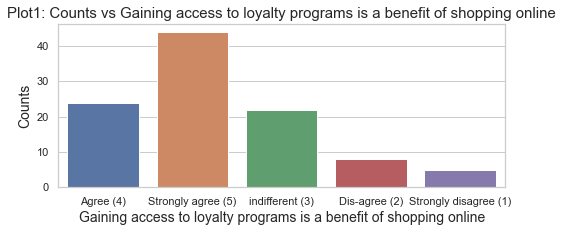

In [1565]:
#visualize this column by Countplot
plt.figure(figsize =(8,3))
sns.countplot(x = 'Gaining access to loyalty programs is a benefit of shopping online', data=df)
plt.xlabel('Gaining access to loyalty programs is a benefit of shopping online', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)
plt.title("Plot1: Counts vs Gaining access to loyalty programs is a benefit of shopping online", fontsize = 15)
plt.savefig('gaining.jpg')

Observation:
1. In plot1, People's are strongly agree with gaining access to loyality programs is a benefit of shopping online

In [1566]:
#check the updated shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (103, 71)


# Column35: Displaying quality Information on the website improves satisfaction of customers

In [1567]:
#clean the column by using rename command
df.rename(columns={'35 Displaying quality Information on the website improves satisfaction of customers': 'Displaying quality Information on the website improves satisfaction of customers'}, inplace=True)

In [1568]:
df['Displaying quality Information on the website improves satisfaction of customers'].unique() 
#check the unique value

array(['indifferent (3)', 'Strongly agree (5)', 'Agree (4)'], dtype=object)

In [1569]:
df['Displaying quality Information on the website improves satisfaction of customers'].value_counts() 
#check the counts of unique values

Strongly agree (5)    49
Agree (4)             31
indifferent (3)       23
Name: Displaying quality Information on the website improves satisfaction of customers, dtype: int64

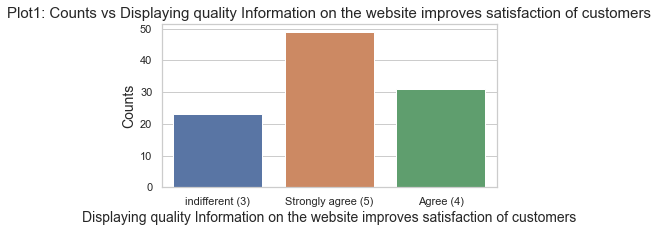

In [1570]:
#visualize this column by Countplot
plt.figure(figsize =(6,3))
sns.countplot(x = 'Displaying quality Information on the website improves satisfaction of customers', data=df)
plt.xlabel('Displaying quality Information on the website improves satisfaction of customers', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)
plt.title("Plot1: Counts vs Displaying quality Information on the website improves satisfaction of customers", fontsize = 15)
plt.savefig('qualityinfo.jpg')

Observation:
1. In plot1, People's are strongly agree with displaying quality information on the website improves satisfaction of customers

In [1571]:
#check the updated shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (103, 71)


# Column36: User derive satisfaction while shopping on a good quality website or application

In [1572]:
#clean the column by using rename command
df.rename(columns={'36 User derive satisfaction while shopping on a good quality website or application': 'User derive satisfaction while shopping on a good quality website or application'}, inplace=True)

In [1573]:
df['User derive satisfaction while shopping on a good quality website or application'].unique() 
#check the unique value

array(['Strongly agree (5)', 'Agree (4)', 'Dis-agree (2)'], dtype=object)

In [1574]:
df['User derive satisfaction while shopping on a good quality website or application'].value_counts()
#check the count of unique value

Strongly agree (5)    66
Agree (4)             35
Dis-agree (2)          2
Name: User derive satisfaction while shopping on a good quality website or application, dtype: int64

Text(0.5, 1.0, 'Plot1: Counts vs User derive satisfaction while shopping on a good quality website or application')

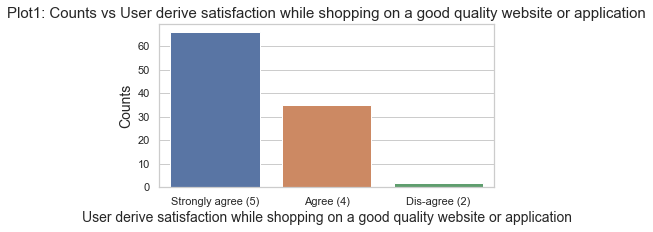

In [1575]:
#visualize this column by Countplot
plt.figure(figsize =(6,3))
sns.countplot(x = 'User derive satisfaction while shopping on a good quality website or application', data=df)
plt.xlabel('User derive satisfaction while shopping on a good quality website or application', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)
plt.title("Plot1: Counts vs User derive satisfaction while shopping on a good quality website or application", fontsize = 15)

Observation:
1. In plot1, People's are strongly agree with User derive satisfaction while shopping on a good quality website or application

In [1576]:
#check the updated shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (103, 71)


# Column37: Net Benefit derived from shopping online can lead to users satisfaction

In [1577]:
#clean the column by using rename command
df.rename(columns={'37 Net Benefit derived from shopping online can lead to users satisfaction': 'Net Benefit derived from shopping online can lead to users satisfaction'}, inplace=True)

In [1578]:
df['Net Benefit derived from shopping online can lead to users satisfaction'].unique() 
#check the unique value

array(['Agree (4)', 'Strongly agree (5)', 'indifferent (3)',
       'Dis-agree (2)'], dtype=object)

In [1579]:
df['Net Benefit derived from shopping online can lead to users satisfaction'].value_counts()
#check the count of unique value

Strongly agree (5)    61
Agree (4)             22
indifferent (3)       15
Dis-agree (2)          5
Name: Net Benefit derived from shopping online can lead to users satisfaction, dtype: int64

Text(0.5, 1.0, 'Plot1: Counts vs Net Benefit derived from shopping online can lead to users satisfaction')

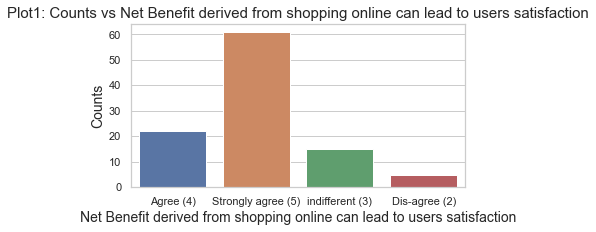

In [1580]:
#visualize this column by Countplot
plt.figure(figsize =(6,3))
sns.countplot(x = 'Net Benefit derived from shopping online can lead to users satisfaction', data=df)
plt.xlabel('Net Benefit derived from shopping online can lead to users satisfaction', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)
plt.title("Plot1: Counts vs Net Benefit derived from shopping online can lead to users satisfaction", fontsize = 15)

Observation:
1. In plot1, People's are strongly agree with Net Benefit derived from shopping online can lead to users satisfaction

In [1581]:
#check the updated shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (103, 71)


# Column38: User satisfaction cannot exist without trust

In [1582]:
#clean the column by using rename command
df.rename(columns={'38 User satisfaction cannot exist without trust': 'User satisfaction cannot exist without trust'}, inplace=True)

In [1583]:
df['User satisfaction cannot exist without trust'].unique() #check the unique value

array(['Strongly agree (5)', 'Agree (4)', 'Strongly disagree (1)',
       'Dis-agree (2)', 'indifferent (3)'], dtype=object)

In [1584]:
df['User satisfaction cannot exist without trust'].value_counts()#check the count of unique value

Strongly agree (5)       47
Agree (4)                44
Strongly disagree (1)     8
Dis-agree (2)             2
indifferent (3)           2
Name: User satisfaction cannot exist without trust, dtype: int64

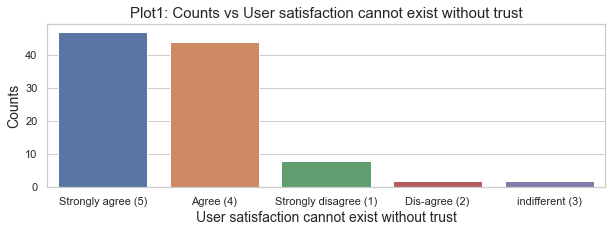

In [1585]:
#visualize this column by Countplot
plt.figure(figsize =(10,3))
sns.countplot(x = 'User satisfaction cannot exist without trust', data=df)
plt.xlabel('User satisfaction cannot exist without trust', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)
plt.title("Plot1: Counts vs User satisfaction cannot exist without trust", fontsize = 15)
plt.savefig('satisfaction.jpg')

Observation:
1. In plot1, People's are strongly agree with user satisfaction cannot exist without trust

In [1586]:
#check the updated shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (103, 71)


# Column39: Offering a wide variety of listed product in several category

In [1587]:
#clean the column by using rename command
df.rename(columns={'39 Offering a wide variety of listed product in several category': 'Offering a wide variety of listed product in several category'}, inplace=True)

In [1588]:
df['Offering a wide variety of listed product in several category'].unique() #check the unique value

array(['indifferent (3)', 'Strongly agree (5)', 'Agree (4)',
       'Dis-agree (2)'], dtype=object)

In [1589]:
df['Offering a wide variety of listed product in several category'].value_counts()#check the count of unique value

Strongly agree (5)    42
Agree (4)             39
indifferent (3)       20
Dis-agree (2)          2
Name: Offering a wide variety of listed product in several category, dtype: int64

Text(0.5, 1.0, 'Plot1: Counts vs Offering a wide variety of listed product in several category')

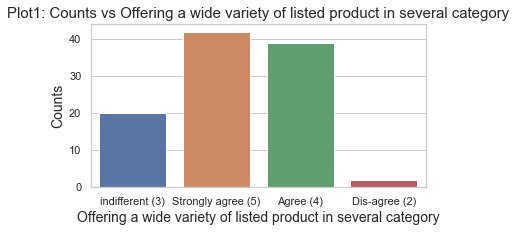

In [1590]:
#visualize this column by Countplot
plt.figure(figsize =(6,3))
sns.countplot(x = 'Offering a wide variety of listed product in several category', data=df)
plt.xlabel('Offering a wide variety of listed product in several category', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)
plt.title("Plot1: Counts vs Offering a wide variety of listed product in several category", fontsize = 15)

Observation:
1. In plot1, People's are strongly agree with offering a wide variety of listed product in several category.

In [1591]:
#check the updated shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (103, 71)


# Column40: Provision of complete and relevant product information

In [1592]:
#clean the column by using rename command
df.rename(columns={'40 Provision of complete and relevant product information': 'Provision of complete and relevant product information'}, inplace=True)

In [1593]:
df['Provision of complete and relevant product information'].unique() #check the unique value

array(['indifferent (3)', 'Strongly agree (5)', 'Agree (4)',
       'Disagree (2)'], dtype=object)

In [1594]:
df['Provision of complete and relevant product information'].value_counts()#check the count of unique value

Strongly agree (5)    48
Agree (4)             41
indifferent (3)       12
Disagree (2)           2
Name: Provision of complete and relevant product information, dtype: int64

Text(0.5, 1.0, 'Plot1: Counts vs Provision of complete and relevant product information')

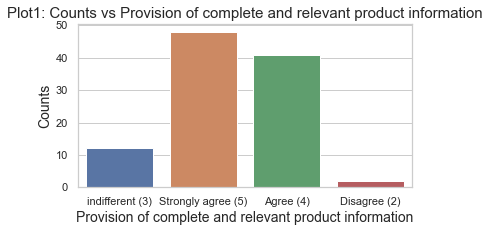

In [1595]:
#visualize this column by Countplot
plt.figure(figsize =(6,3))
sns.countplot(x = 'Provision of complete and relevant product information', data=df)
plt.xlabel('Provision of complete and relevant product information', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)
plt.title("Plot1: Counts vs Provision of complete and relevant product information", fontsize = 15)

Observation:
1. In plot1, the count of strongly agree are more than others

In [1596]:
#check the updated shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (103, 71)


# Column41: Monetary savings

In [1597]:
df.rename(columns={'41 Monetary savings': 'Monetary savings'}, inplace=True)

In [1598]:
df['Monetary savings'].unique() #check the unique value

array(['Disagree (2)', 'Strongly agree (5)', 'Agree (4)',
       'indifferent (3)'], dtype=object)

In [1599]:
df['Monetary savings'].value_counts()#check the count of unique value

Strongly agree (5)    59
Agree (4)             27
Disagree (2)          12
indifferent (3)        5
Name: Monetary savings, dtype: int64

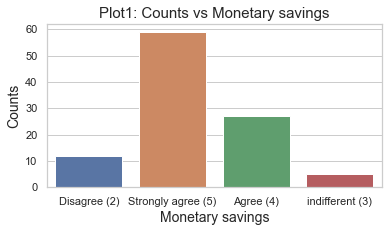

In [1600]:
#visualize this column by Countplot
plt.figure(figsize =(6,3))
sns.countplot(x = 'Monetary savings', data=df)
plt.xlabel('Monetary savings', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)
plt.title("Plot1: Counts vs Monetary savings", fontsize = 15)
plt.savefig('monetarysavings.jpg')

Observation:
1. In plot1, People's are strongly agree with Monetary savings

In [1601]:
#check the updated shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (103, 71)


# Column42: The Convenience of patronizing the online retailer

In [1602]:
df.rename(columns={'42 The Convenience of patronizing the online retailer': 'The Convenience of patronizing the online retailer'}, inplace=True)

In [1603]:
df['The Convenience of patronizing the online retailer'].unique() #check the unique value

array(['indifferent (3)', 'Agree (4)', 'Strongly agree (5)'], dtype=object)

In [1604]:
df['The Convenience of patronizing the online retailer'].value_counts()#check the count of unique value

Agree (4)             55
indifferent (3)       28
Strongly agree (5)    20
Name: The Convenience of patronizing the online retailer, dtype: int64

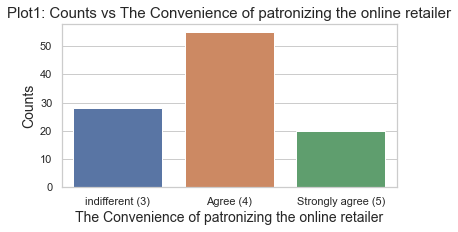

In [1605]:
#visualize this column by Countplot
plt.figure(figsize =(6,3))
sns.countplot(x = 'The Convenience of patronizing the online retailer', data=df)
plt.xlabel('The Convenience of patronizing the online retailer', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)
plt.title("Plot1: Counts vs The Convenience of patronizing the online retailer", fontsize = 15)
plt.savefig('retailer.jpg')

Observation:
1. In plot1, the count of strongly agree are more than others

In [1606]:
#check the updated shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (103, 71)


# Column43: Shopping on the website gives you the sense of adventure

In [1607]:
df.rename(columns={'43 Shopping on the website gives you the sense of adventure': 'Shopping on the website gives you the sense of adventure'}, inplace=True)

In [1608]:
df['Shopping on the website gives you the sense of adventure'].unique() #check the unique value

array(['Agree (4)', 'indifferent (3)', 'Strongly agree (5)',
       'Dis-agree (2)', 'Strongly disagree (1)'], dtype=object)

In [1609]:
df['Shopping on the website gives you the sense of adventure'].value_counts()#check the count of unique value

Agree (4)                42
indifferent (3)          24
Strongly agree (5)       20
Dis-agree (2)            15
Strongly disagree (1)     2
Name: Shopping on the website gives you the sense of adventure, dtype: int64

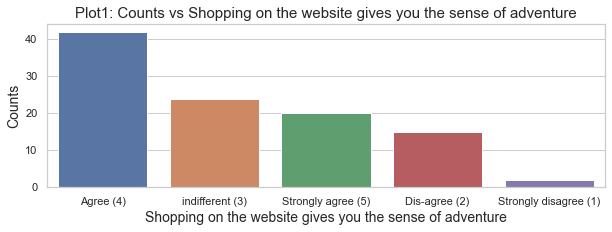

In [1610]:
#visualize this column by Countplot
plt.figure(figsize =(10,3))
sns.countplot(x = 'Shopping on the website gives you the sense of adventure', data=df)
plt.xlabel('Shopping on the website gives you the sense of adventure', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)
plt.title("Plot1: Counts vs Shopping on the website gives you the sense of adventure", fontsize = 15)
plt.savefig('adventure.jpg')

Observation:
1. In plot1, People's are agree with the shopping on the website gives us the sense of adventure

In [1611]:
#check the updated shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (103, 71)


# Column44: Shopping on your preferred e-tailer enhances your social status

In [1612]:
df.rename(columns={'44 Shopping on your preferred e-tailer enhances your social status': 'Shopping on your preferred e-tailer enhances your social status'}, inplace=True)

In [1613]:
df['Shopping on your preferred e-tailer enhances your social status'].unique() #check the unique value

array(['Agree (4)', 'indifferent (3)', 'Strongly agree (5)',
       'Strongly disagree (1)', 'Dis-agree (2)'], dtype=object)

In [1614]:
df['Shopping on your preferred e-tailer enhances your social status'].value_counts()#check the count of unique value

indifferent (3)          39
Agree (4)                21
Strongly agree (5)       17
Strongly disagree (1)    16
Dis-agree (2)            10
Name: Shopping on your preferred e-tailer enhances your social status, dtype: int64

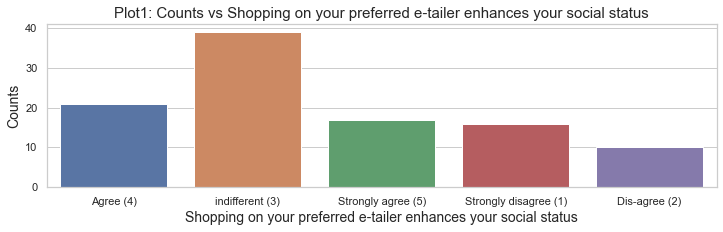

In [1615]:
#visualize this column by Countplot
plt.figure(figsize =(12,3))
sns.countplot(x = 'Shopping on your preferred e-tailer enhances your social status', data=df)
plt.xlabel('Shopping on your preferred e-tailer enhances your social status', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)
plt.title("Plot1: Counts vs Shopping on your preferred e-tailer enhances your social status", fontsize = 15)
plt.savefig('socialstatus.jpg')

Observation:
1. In plot1, The maximum opinion on 'Shopping on your preferred e-tailer enhances your social status'is indifferent

In [1616]:
#check the updated shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (103, 71)


# Column45: You feel gratification shopping on your favorite e-tailer

In [1617]:
df.rename(columns={'45 You feel gratification shopping on your favorite e-tailer': 'You feel gratification shopping on your favorite e-tailer'}, inplace=True)

In [1618]:
df['You feel gratification shopping on your favorite e-tailer'].unique() #check the unique value

array(['Strongly agree (5)', 'indifferent (3)', 'Agree (4)',
       'Strongly disagree (1)', 'Disagree (2)'], dtype=object)

In [1619]:
df['You feel gratification shopping on your favorite e-tailer'].value_counts()#check the count of unique value

indifferent (3)          38
Strongly agree (5)       25
Agree (4)                24
Strongly disagree (1)     8
Disagree (2)              8
Name: You feel gratification shopping on your favorite e-tailer, dtype: int64

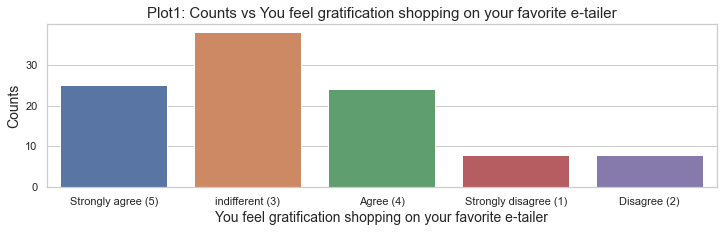

In [1620]:
#visualize this column by Countplot
plt.figure(figsize =(12,3))
sns.countplot(x = 'You feel gratification shopping on your favorite e-tailer', data=df)
plt.xlabel('You feel gratification shopping on your favorite e-tailer', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)
plt.title("Plot1: Counts vs You feel gratification shopping on your favorite e-tailer", fontsize = 15)
plt.savefig('e-tailor.jpg')

Observation:
1. In plot1, People feels indifferent that they feel gratification shopping on their favourite e-tailor

In [1621]:
#check the updated shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (103, 71)


# Column46: Shopping on the website helps you fulfill certain roles

In [1622]:
df.rename(columns={'46 Shopping on the website helps you fulfill certain roles': 'Shopping on the website helps you fulfill certain roles'}, inplace=True)

In [1623]:
df['Shopping on the website helps you fulfill certain roles'].unique() #check the unique value

array(['Agree (4)', 'Strongly agree (5)', 'indifferent (3)',
       'Strongly disagree (1)', 'Dis-agree (2)'], dtype=object)

In [1624]:
df['Shopping on the website helps you fulfill certain roles'].value_counts()#check the count of unique value

indifferent (3)          35
Agree (4)                33
Strongly disagree (1)    16
Strongly agree (5)       12
Dis-agree (2)             7
Name: Shopping on the website helps you fulfill certain roles, dtype: int64

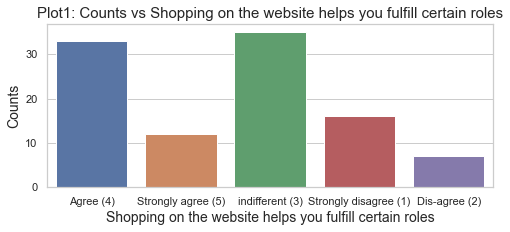

In [1625]:
#visualize this column by Countplot
plt.figure(figsize =(8,3))
sns.countplot(x = 'Shopping on the website helps you fulfill certain roles', data=df)
plt.xlabel('Shopping on the website helps you fulfill certain roles', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)
plt.title("Plot1: Counts vs Shopping on the website helps you fulfill certain roles", fontsize = 15)
plt.savefig('roles.jpg')

Text(0.5, 1.0, 'Plot2: Shopping on the website helps you fulfill certain roles vs How old are you?')

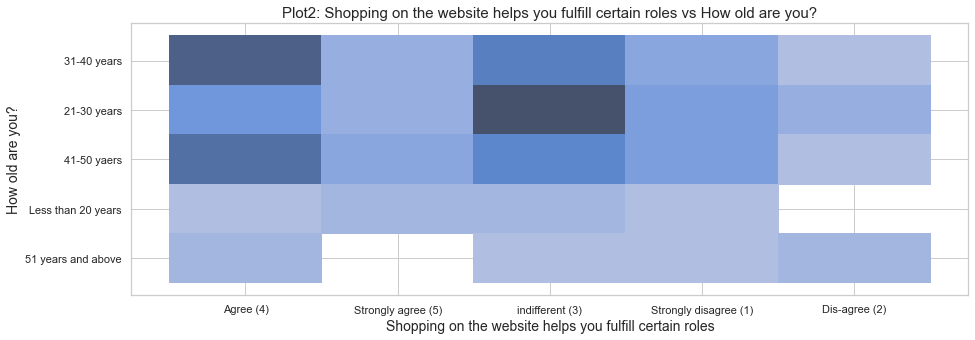

In [1706]:
#visualize this column by histplot
plt.figure(figsize=(15,5))
sns.histplot(x= 'Shopping on the website helps you fulfill certain roles',y= 'How old are you?', data=df)
plt.xlabel('Shopping on the website helps you fulfill certain roles', fontsize = 14)
plt.ylabel('How old are you?', fontsize = 14)
plt.title('Plot2: Shopping on the website helps you fulfill certain roles vs How old are you?', fontsize = 15)

Observation:
1. In plot1, People’s opinions are indifferent that Shopping on the website helps you fulfill certain roles
2. In plot2, 21-30 years old go to indefferent option.

In [1626]:
#check the updated shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (103, 71)


# Column47: Getting value for money spent

In [1708]:
df.rename(columns={'47 Getting value for money spent': 'Getting value for money spent'}, inplace=True)

In [1709]:
df['Getting value for money spent'].unique() #check the unique value

array(['Strongly agree (5)', 'Agree (4)', 'indifferent (3)'], dtype=object)

In [1710]:
df['Getting value for money spent'].value_counts()#check the count of unique value

Agree (4)             57
Strongly agree (5)    32
indifferent (3)       14
Name: Getting value for money spent, dtype: int64

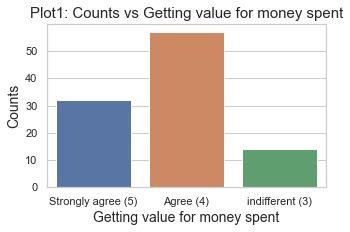

In [1716]:
#visualize this column by Countplot
plt.figure(figsize =(5,3))
sns.countplot(x = 'Getting value for money spent', data=df)
plt.xlabel('Getting value for money spent', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)
plt.title("Plot1: Counts vs Getting value for money spent", fontsize = 15)
plt.savefig('value.jpg')

Observation:
1. In plot1, People's are agree with Getting value for money spent

In [1631]:
#check the updated shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (103, 71)


# Column48: From the following, tick any (or all) of the online retailers you have shopped from

In [1632]:
df.rename(columns={'From the following, tick any (or all) of the online retailers you have shopped from;                                                                           ': 'From the following, tick any (or all) of the online retailers you have shopped from'}, inplace=True)

In [1633]:
df['From the following, tick any (or all) of the online retailers you have shopped from'].unique() #check the unique value

array(['Amazon.in, Paytm.com',
       'Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com',
       'Amazon.in, Paytm.com, Myntra.com',
       'Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com',
       'Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com',
       'Amazon.in, Flipkart.com', 'Amazon.in, Flipkart.com, Snapdeal.com',
       'Amazon.in', 'Amazon.in, Flipkart.com, Paytm.com'], dtype=object)

In [1634]:
df['From the following, tick any (or all) of the online retailers you have shopped from'].value_counts()#check the count of unique value

Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    36
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               16
Amazon.in, Flipkart.com                                         12
Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com                12
Amazon.in, Flipkart.com, Snapdeal.com                            8
Amazon.in, Paytm.com, Myntra.com                                 8
Amazon.in, Paytm.com                                             5
Amazon.in                                                        4
Amazon.in, Flipkart.com, Paytm.com                               2
Name: From the following, tick any (or all) of the online retailers you have shopped from, dtype: int64

Observation:
1. We can see, many peoples like more than one company
2. People's are more liking all the companies


In [1635]:
#check the updated shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (103, 71)


# Column49:Easy to use website or application

In [1721]:
df['Easy to use website or application'].unique() #check the unique value

array(['Paytm.com', 'Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com',
       'Amazon.in, Paytm.com, Myntra.com',
       'Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com',
       'Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com',
       'Amazon.in, Flipkart.com', 'Amazon.in, Flipkart.com, Myntra.com',
       'Amazon.in', 'Amazon.in, Paytm.com', 'Flipkart.com'], dtype=object)

In [1722]:
df['Easy to use website or application'].value_counts()#check the count of unique value

Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    28
Amazon.in, Flipkart.com                                         18
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               16
Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com                10
Amazon.in                                                        8
Amazon.in, Paytm.com, Myntra.com                                 8
Amazon.in, Flipkart.com, Myntra.com                              6
Paytm.com                                                        5
Amazon.in, Paytm.com                                             2
Flipkart.com                                                     2
Name: Easy to use website or application, dtype: int64

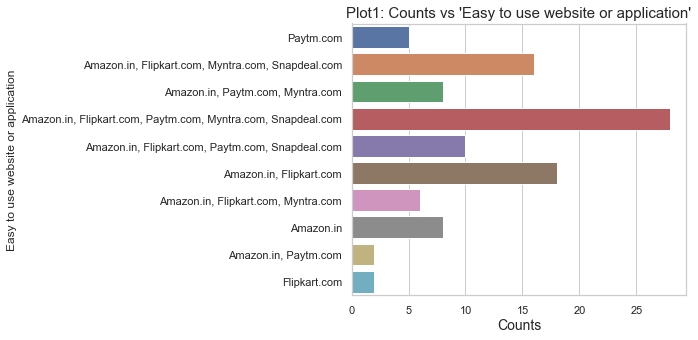

In [1740]:
#visualize this column by Countplot
plt.figure(figsize =(6,5))
sns.countplot(y = 'Easy to use website or application', data=df)
#plt.ylabel('Easy to use website or application', fontsize = 14)
plt.xlabel('Counts', fontsize = 14)
plt.title("Plot1: Counts vs 'Easy to use website or application'", fontsize = 15)
plt.savefig('easy.jpg')

Observation:
1. In plot1, People thinks all the companies website and their applications are easy to use.
2. But as a individual choice, they chosse Amazon 

In [1639]:
#check the updated shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (103, 71)


# Column50:Visual appealing web-page layout

In [1640]:
df['Visual appealing web-page layout'].unique() #check the unique valueVisual appealing web-page layout

array(['Flipkart.com', 'Amazon.in, Myntra.com',
       'Amazon.in, Paytm.com, Myntra.com',
       'Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com',
       'Myntra.com', 'Amazon.in, Flipkart.com',
       'Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com',
       'Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com',
       'Flipkart.com, Myntra.com', 'Amazon.in'], dtype=object)

In [1641]:
df['Visual appealing web-page layout'].value_counts()#check the count of unique value

Amazon.in, Flipkart.com                                         33
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    16
Amazon.in                                                       12
Myntra.com                                                       8
Amazon.in, Paytm.com, Myntra.com                                 8
Amazon.in, Myntra.com                                            6
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com                5
Flipkart.com                                                     5
Flipkart.com, Myntra.com                                         5
Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com                 5
Name: Visual appealing web-page layout, dtype: int64

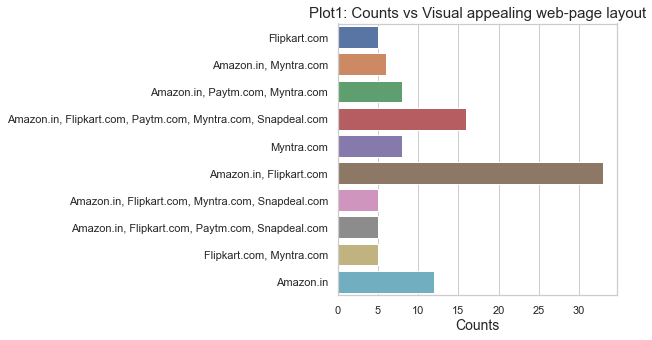

In [1741]:
#visualize this column by Countplot
plt.figure(figsize =(5,5))
sns.countplot(y = 'Visual appealing web-page layout', data=df)
plt.ylabel('', fontsize = 14)
plt.xlabel('Counts', fontsize = 14)
plt.title("Plot1: Counts vs Visual appealing web-page layout", fontsize = 15)
plt.savefig('visual.jpg')

Observation:
1. In plot1, People likes amazon and filpcart webpage layout

In [1655]:
#check the updated shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (103, 71)


# Column51: Wide variety of product on offer

In [1816]:
#Rename the column to make it clean and proper 
df.rename(columns={'Wild variety of product on offer': 'Wide variety of product on offer'}, inplace=True)

In [1817]:
df['Wide variety of product on offer'].unique() #check the unique value

array(['Flipkart.com', 'Flipkart.com, Myntra.com',
       'Amazon.in, Myntra.com', 'Amazon.in, Flipkart.com', 'Myntra.com',
       'Amazon.in, Flipkart.com, Paytm.com', 'Amazon.in',
       'Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com', 'Paytm.com'],
      dtype=object)

In [1818]:
df['Wide variety of product on offer'].value_counts()#check the count of unique value

Amazon.in, Flipkart.com                              50
Amazon.in                                            13
Myntra.com                                            8
Amazon.in, Myntra.com                                 8
Flipkart.com, Myntra.com                              6
Amazon.in, Flipkart.com, Paytm.com                    6
Flipkart.com                                          5
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com     5
Paytm.com                                             2
Name: Wide variety of product on offer, dtype: int64

Text(0.5, 1.0, 'Plot1: Counts vs Wide variety of product on offer')

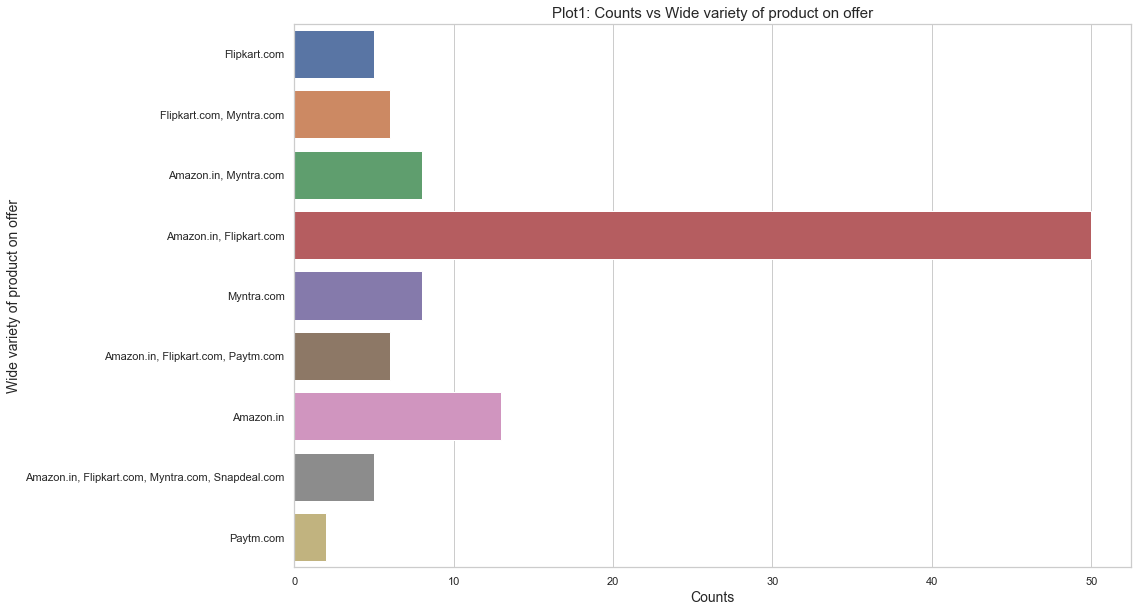

In [1819]:
#visualize this column by Countplot
plt.figure(figsize =(15,10))
sns.countplot(y = 'Wide variety of product on offer', data=df)
plt.ylabel('Wide variety of product on offer', fontsize = 14)
plt.xlabel('Counts', fontsize = 14)
plt.title("Plot1: Counts vs Wide variety of product on offer", fontsize = 15)

Observation:
1. In plot1, People's likes Amazon and flipcart the most for wide variety of product on offer

In [1659]:
#check the updated shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (103, 71)


# Column52: Complete, relevant description information of products

In [1660]:
df['Complete, relevant description information of products'].unique() #check the unique value

array(['Snapdeal.com', 'Amazon.in, Flipkart.com, Myntra.com',
       'Amazon.in, Paytm.com, Myntra.com', 'Amazon.in, Flipkart.com',
       'Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com',
       'Amazon.in, Flipkart.com, Paytm.com', 'Flipkart.com, Snapdeal.com',
       'Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com', 'Amazon.in',
       'Amazon.in, Flipkart.com, Snapdeal.com', 'Flipkart.com'],
      dtype=object)

In [1661]:
df['Complete, relevant description information of products'].value_counts()#check the count of unique value

Amazon.in, Flipkart.com                                         39
Amazon.in                                                       12
Amazon.in, Flipkart.com, Paytm.com                              11
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com     8
Amazon.in, Paytm.com, Myntra.com                                 8
Amazon.in, Flipkart.com, Myntra.com                              6
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com                5
Flipkart.com, Snapdeal.com                                       5
Snapdeal.com                                                     5
Amazon.in, Flipkart.com, Snapdeal.com                            2
Flipkart.com                                                     2
Name: Complete, relevant description information of products, dtype: int64

Text(0.5, 1.0, 'Plot1: Counts vs Complete, relevant description information of products ')

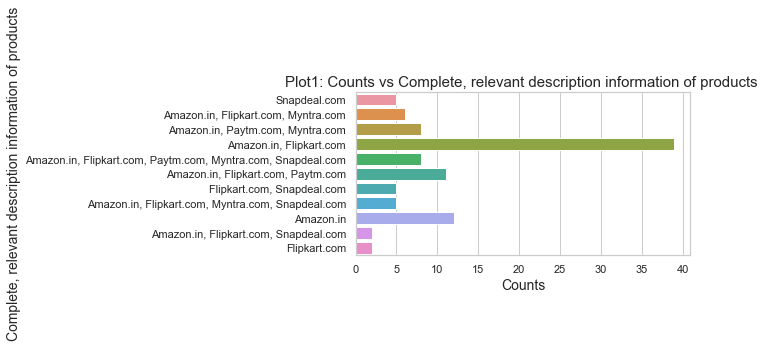

In [1742]:
#visualize this column by Countplot
plt.figure(figsize =(6,3))
sns.countplot(y = 'Complete, relevant description information of products', data=df)
plt.ylabel('Complete, relevant description information of products', fontsize = 14)
plt.xlabel('Counts', fontsize = 14)
plt.title("Plot1: Counts vs Complete, relevant description information of products ", fontsize = 15)

Text(0.5, 1.0, 'Plot2: Complete information on listed seller and product being offered is important for purchase decision vs Complete, relevant description information of products')

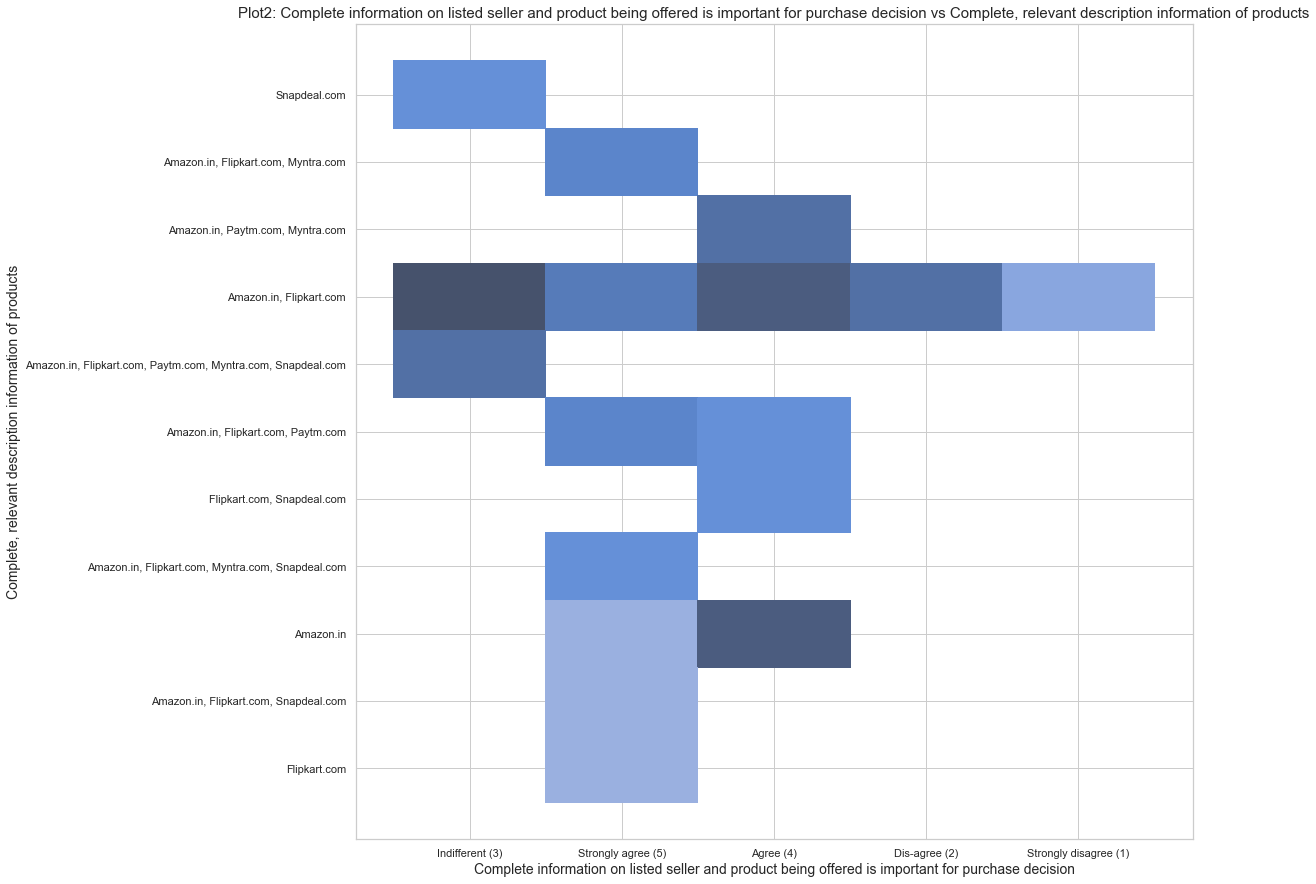

In [1745]:
#visualize this column by histplot
plt.figure(figsize=(15,15))
sns.histplot(x= 'Complete information on listed seller and product being offered is important for purchase decision',y= 'Complete, relevant description information of products', data=df)
plt.xlabel('Complete information on listed seller and product being offered is important for purchase decision', fontsize = 14)
plt.ylabel('Complete, relevant description information of products', fontsize = 14)
plt.title('Plot2: Complete information on listed seller and product being offered is important for purchase decision vs Complete, relevant description information of products', fontsize = 15)

Observation:
1. In plot1, People feels that complete and relevant description information of products are necessary and better on Amazon and FlipKart websites and their application.
2. In plot2, More peoples are 'indifferent' opinion when compare it with Complete information on listed seller and product being offered is important for purchase decision

In [1663]:
#check the updated shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (103, 71)


# Column53:Fast loading website speed of website and application

In [1664]:
df['Fast loading website speed of website and application'].unique() #check the unique value

array(['Snapdeal.com', 'Amazon.in, Flipkart.com, Myntra.com',
       'Amazon.in, Paytm.com', 'Amazon.in, Flipkart.com, Snapdeal.com',
       'Amazon.in',
       'Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com',
       'Amazon.in, Flipkart.com, Paytm.com',
       'Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com',
       'Amazon.in, Flipkart.com', 'Flipkart.com'], dtype=object)

In [1665]:
df['Fast loading website speed of website and application'].value_counts()#check the count of unique value

Amazon.in, Paytm.com                                            19
Amazon.in                                                       18
Amazon.in, Flipkart.com, Snapdeal.com                           11
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    11
Amazon.in, Flipkart.com, Myntra.com                             11
Amazon.in, Flipkart.com                                         11
Amazon.in, Flipkart.com, Paytm.com                              10
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com                5
Snapdeal.com                                                     5
Flipkart.com                                                     2
Name: Fast loading website speed of website and application, dtype: int64

Text(0.5, 1.0, 'Plot1: Counts vs Fast loading website speed of website and application')

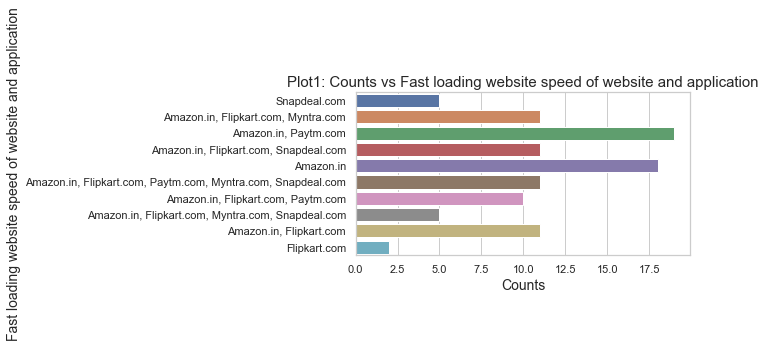

In [1746]:
#visualize this column by Countplot
plt.figure(figsize =(6,3))
sns.countplot(y= 'Fast loading website speed of website and application', data=df)
plt.ylabel('Fast loading website speed of website and application', fontsize = 14)
plt.xlabel('Counts', fontsize = 14)
plt.title("Plot1: Counts vs Fast loading website speed of website and application", fontsize = 15)

Observation:
1. In plot1, People thinks that Amazon and Paytm Fast loading website speed of website and application
2. Only Amazon website speed is faster than other company
3. Flipkart has lowest speed of loading website and application

In [1667]:
#check the updated shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (103, 71)


# Column54:Reliability of the website or application

In [1668]:
df['Reliability of the website or application'].unique() #check the unique value

array(['Paytm.com', 'Myntra.com', 'Amazon.in, Paytm.com, Myntra.com',
       'Amazon.in, Flipkart.com, Paytm.com',
       'Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com',
       'Amazon.in, Flipkart.com, Snapdeal.com', 'Amazon.in',
       'Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com',
       'Amazon.in, Flipkart.com', 'Flipkart.com'], dtype=object)

In [1669]:
df['Reliability of the website or application'].value_counts()#check the count of unique value

Amazon.in                                            20
Amazon.in, Flipkart.com                              18
Amazon.in, Flipkart.com, Paytm.com                   16
Amazon.in, Paytm.com, Myntra.com                     16
Amazon.in, Flipkart.com, Snapdeal.com                 7
Myntra.com                                            6
Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com      6
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com     5
Paytm.com                                             5
Flipkart.com                                          4
Name: Reliability of the website or application, dtype: int64

Text(0.5, 1.0, 'Plot1: Counts vs Reliability of the website or application')

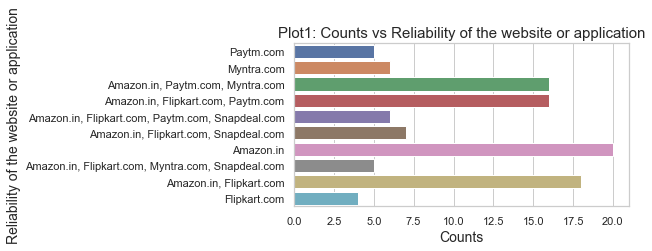

In [1747]:
#visualize this column by Countplot
plt.figure(figsize =(6,3))
sns.countplot(y = 'Reliability of the website or application', data=df)
plt.ylabel('Reliability of the website or application', fontsize = 14)
plt.xlabel('Counts', fontsize = 14)
plt.title("Plot1: Counts vs Reliability of the website or application", fontsize = 15)

Observations:
1. In plot1, People thinks that Amazon has better reliability of the website or application
2. Flipkart has worst reliabilty of the website and application

In [1672]:
#check the updated shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (103, 71)


# Column55:Quickness to complete purchase

In [1673]:
df['Quickness to complete purchase'].unique() #check the unique value

array(['Paytm.com', 'Amazon.com, Flipkart.com, Myntra.com',
       'Amazon.com, Paytm.com, Myntra.com',
       'Amazon.com, Flipkart.com, Paytm.com',
       'Amazon.com, Flipkart.com, Paytm.com, Myntra.com, Snapdeal',
       'Amazon.com', 'Flipkart.com, Myntra.com, Snapdeal',
       'Amazon.com, Flipkart.com', 'Flipkart.com'], dtype=object)

In [1674]:
df['Quickness to complete purchase'].value_counts()#check the count of unique value

Amazon.com                                                   22
Amazon.com, Flipkart.com, Paytm.com                          21
Amazon.com, Flipkart.com                                     13
Amazon.com, Flipkart.com, Myntra.com                         11
Paytm.com                                                    11
Amazon.com, Paytm.com, Myntra.com                             8
Amazon.com, Flipkart.com, Paytm.com, Myntra.com, Snapdeal     8
Flipkart.com, Myntra.com, Snapdeal                            5
Flipkart.com                                                  4
Name: Quickness to complete purchase, dtype: int64

Text(0.5, 1.0, 'Plot1: Counts vs Quickness to complete purchase')

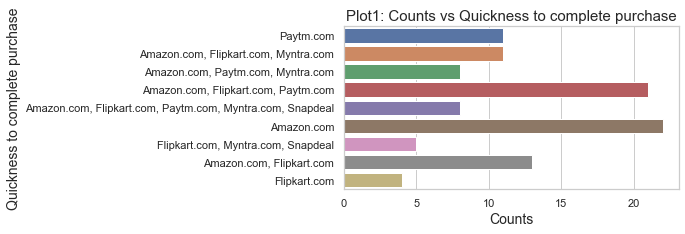

In [1748]:
#visualize this column by Countplot
plt.figure(figsize =(6,3))
sns.countplot(y= 'Quickness to complete purchase', data=df)
plt.ylabel('Quickness to complete purchase', fontsize = 14)
plt.xlabel('Counts', fontsize = 14)
plt.title("Plot1: Counts vs Quickness to complete purchase", fontsize = 15)

Observations:
1. In plot1, People thinks that Amazon has better quickness to complete purchase
2. Flipkart has worst quickness to complete purchase

In [1676]:
#check the updated shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (103, 71)


# Column56:Availability of several payment options

In [1677]:
df['Availability of several payment options'].unique() #check the unique value

array(['Patym.com', 'Amazon.in, Flipkart.com, Myntra.com',
       'Patym.com, Myntra.com',
       'Amazon.in, Flipkart.com, Patym.com, Myntra.com, Snapdeal.com',
       'Amazon.in, Flipkart.com, Snapdeal.com', 'Amazon.in, Flipkart.com',
       'Flipkart.com, Myntra.com, Snapdeal.com', 'Amazon.in, Patym.com',
       'Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com', 'Amazon.in',
       'Flipkart.com'], dtype=object)

In [1678]:
df['Availability of several payment options'].value_counts()#check the count of unique value

Amazon.in, Flipkart.com                                         25
Amazon.in, Flipkart.com, Myntra.com                             17
Amazon.in, Flipkart.com, Patym.com, Myntra.com, Snapdeal.com    17
Patym.com, Myntra.com                                            8
Amazon.in, Flipkart.com, Snapdeal.com                            7
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com                6
Amazon.in                                                        6
Amazon.in, Patym.com                                             5
Patym.com                                                        5
Flipkart.com, Myntra.com, Snapdeal.com                           5
Flipkart.com                                                     2
Name: Availability of several payment options, dtype: int64

Text(0.5, 1.0, 'Plot1: Counts vs Availability of several payment options')

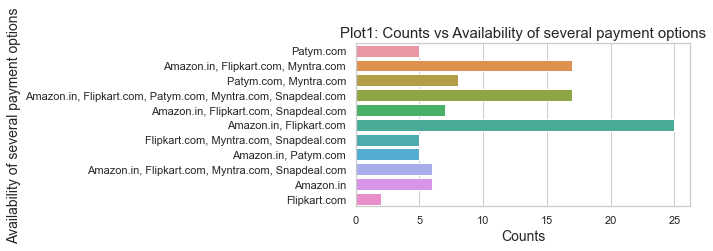

In [1749]:
#visualize this column by Countplot
plt.figure(figsize =(6,3))
sns.countplot(y = 'Availability of several payment options', data=df)
plt.ylabel('Availability of several payment options', fontsize = 14)
plt.xlabel('Counts', fontsize = 14)
plt.title("Plot1: Counts vs Availability of several payment options", fontsize = 15)

Observations:
1. In plot1, People thinks that both (Amazon and Flipkart) has better Availability of several payment options
2. Flipkart has worst Availability of several payment options
3. Individually Amazon has best Availability of several payment options

In [1680]:
#check the updated shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (103, 71)


# Column57:Speedy order delivery

In [1681]:
df.rename(columns={'Speedy order delivery ': 'Speedy order delivery'}, inplace=True)

In [1682]:
df['Speedy order delivery'].unique() #check the unique value

array(['Amazon.in', 'Amazon.in, Flipkart.com',
       'Amazon.in, Flipkart.com, Snapdeal.com',
       'Flipkart.com, Myntra.com, Snapdeal.com',
       'Amazon.in, Flipkart.com, Myntra.com', 'Flipkart.com'],
      dtype=object)

In [1683]:
df['Speedy order delivery'].value_counts()#check the count of unique value

Amazon.in                                 43
Amazon.in, Flipkart.com                   30
Amazon.in, Flipkart.com, Snapdeal.com     16
Amazon.in, Flipkart.com, Myntra.com        5
Flipkart.com, Myntra.com, Snapdeal.com     5
Flipkart.com                               4
Name: Speedy order delivery, dtype: int64

Text(0.5, 1.0, 'Plot1: Counts vs Speedy order delivery')

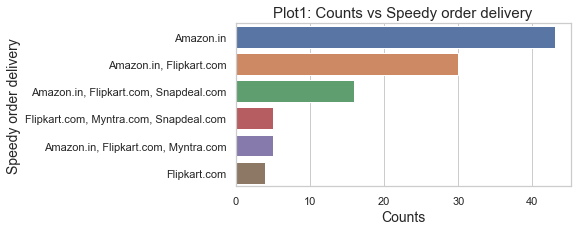

In [1750]:
#visualize this column by Countplot
plt.figure(figsize =(6,3))
sns.countplot(y = 'Speedy order delivery', data=df)
plt.ylabel('Speedy order delivery', fontsize = 14)
plt.xlabel('Counts', fontsize = 14)
plt.title("Plot1: Counts vs Speedy order delivery", fontsize = 15)

Observation:
1. In plot1, Amazon have best speedy order delivery and flipKart has worst

In [1685]:
#check the updated shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (103, 71)


# Column58:Privacy of customers’ information

In [1686]:
df['Privacy of customers’ information'].unique() #check the unique value

array(['Amazon.in', 'Myntra.com', 'Amazon.in, Flipkart.com, Myntra.com',
       'Amazon.in, Paytm.com',
       'Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com',
       'Paytm.com', 'Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com',
       'Amazon.in, Flipkart.com', 'Amazon.in, Flipkart.com, Paytm.com',
       'Amazon.in, Flipkart.com, Snapdeal.com', 'Flipkart.com'],
      dtype=object)

In [1687]:
df['Privacy of customers’ information'].value_counts()#check the count of unique value

Amazon.in                                                       24
Amazon.in, Flipkart.com                                         19
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    11
Amazon.in, Flipkart.com, Myntra.com                             11
Paytm.com                                                        8
Amazon.in, Paytm.com                                             8
Myntra.com                                                       6
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com                5
Amazon.in, Flipkart.com, Paytm.com                               5
Flipkart.com                                                     4
Amazon.in, Flipkart.com, Snapdeal.com                            2
Name: Privacy of customers’ information, dtype: int64

Text(0.5, 1.0, 'Plot1: Counts vs Privacy of customers’ information')

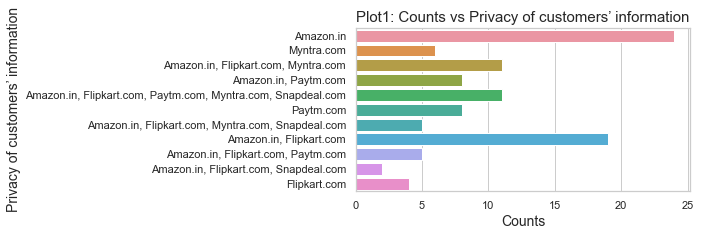

In [1751]:
#visualize this column by Countplot
plt.figure(figsize =(6,3))
sns.countplot(y = 'Privacy of customers’ information', data=df)
plt.ylabel('Privacy of customers’ information', fontsize = 14)
plt.xlabel('Counts', fontsize = 14)
plt.title("Plot1: Counts vs Privacy of customers’ information", fontsize = 15)

Observation:
1. In plot1, Amazon have best privacy of customers information and flipKart has worst

In [1689]:
#check the updated shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (103, 71)


# Column59:Security of customer financial information

In [1690]:
df['Security of customer financial information'].unique() #check the unique value

array(['Amazon.in', 'Myntra.com', 'Amazon.in, Paytm.com, Myntra.com',
       'Amazon.in, Flipkart.com, Snapdeal.com', 'Paytm.com',
       'Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com',
       'Flipkart.com',
       'Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com',
       'Amazon.in, Flipkart.com', 'Amazon.in, Flipkart.com, Paytm.com',
       'Amazon.in, Snapdeal.com'], dtype=object)

In [1691]:
df['Security of customer financial information'].value_counts()#check the count of unique value

Amazon.in                                                       16
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    16
Flipkart.com                                                    12
Amazon.in, Flipkart.com, Snapdeal.com                           11
Amazon.in, Flipkart.com                                         10
Paytm.com                                                        8
Amazon.in, Paytm.com, Myntra.com                                 8
Myntra.com                                                       6
Amazon.in, Snapdeal.com                                          6
Amazon.in, Flipkart.com, Paytm.com                               5
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com                5
Name: Security of customer financial information, dtype: int64

In [1752]:
#visualize this column by Countplot
plt.figure(figsize =(6,3))
sns.countplot(y = 'Security of customer financial information', data=df)
plt.ylabel('Security of customer financial information', fontsize = 14)
plt.xlabel('Counts', fontsize = 14)
plt.title("Plot1: Counts vs Security of customer financial information", fontsize = 15)

Text(0.5, 1.0, 'Plot1: Counts vs Security of customer financial information')

Observation:
1. In plot1, Amazon have best Security of customer financial information and Myntra has worst

In [1693]:
#check the updated shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (103, 71)


# Column60:Perceived Trustworthiness

In [1694]:
df['Perceived Trustworthiness'].unique() #check the unique value

array(['Flipkart.com', 'Myntra.com', 'Amazon.in, Myntra.com',
       'Amazon.in, Flipkart.com, Snapdeal.com',
       'Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com',
       'Amazon.in', 'Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com',
       'Amazon.in, Flipkart.com', 'Amazon.in, Flipkart.com, Paytm.com'],
      dtype=object)

In [1695]:
df['Perceived Trustworthiness'].value_counts()#check the count of unique value

Amazon.in                                                       25
Amazon.in, Flipkart.com, Snapdeal.com                           16
Amazon.in, Myntra.com                                           16
Amazon.in, Flipkart.com                                         12
Flipkart.com                                                     9
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com                8
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com     6
Myntra.com                                                       6
Amazon.in, Flipkart.com, Paytm.com                               5
Name: Perceived Trustworthiness, dtype: int64

In [1753]:
#visualize this column by Countplot
plt.figure(figsize =(6,3))
sns.countplot(y = 'Perceived Trustworthiness', data=df)
plt.ylabel('Perceived Trustworthiness', fontsize = 14)
plt.xlabel('Counts', fontsize = 14)
plt.title("Plot1: Counts vs Perceived Trustworthiness", fontsize = 15)

Text(0.5, 1.0, 'Plot1: Counts vs Perceived Trustworthiness')

Observation:
1. In plot1, Amazon is more trustworthy than flipkart and myntra

In [1697]:
#check the updated shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (103, 71)


# Column61:Presence of online assistance through multi-channel

In [1698]:
df['Presence of online assistance through multi-channel'].unique() #check the unique value

array(['Paytm.com', 'Amazon.in, Flipkart.com, Myntra.com', 'Myntra.com',
       'Amazon.in, Flipkart.com, Myntra.com, Snapdeal',
       'Amazon.in, Myntra.com', 'Amazon.in, Flipkart.com, Paytm.com',
       'Amazon.in', 'Amazon.in, Flipkart.com', 'Amazon.in, Snapdeal',
       'Flipkart.com'], dtype=object)

In [1699]:
df['Presence of online assistance through multi-channel'].value_counts()#check the count of unique value

Amazon.in, Flipkart.com, Myntra.com, Snapdeal    24
Amazon.in                                        21
Amazon.in, Flipkart.com                          15
Myntra.com                                        8
Amazon.in, Snapdeal                               8
Amazon.in, Myntra.com                             8
Amazon.in, Flipkart.com, Myntra.com               6
Amazon.in, Flipkart.com, Paytm.com                6
Paytm.com                                         5
Flipkart.com                                      2
Name: Presence of online assistance through multi-channel, dtype: int64

Text(0.5, 1.0, 'Plot1: Counts vs Presence of online assistance through multi-channel')

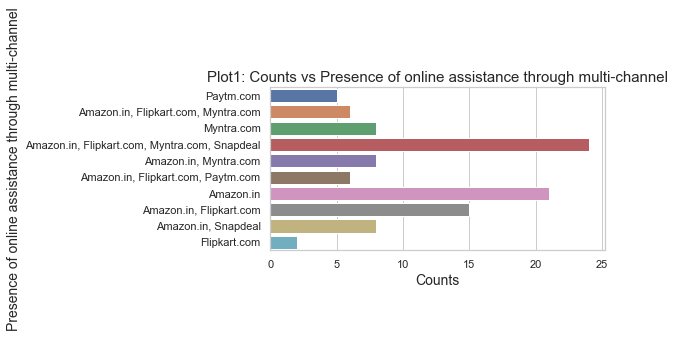

In [1754]:
#visualize this column by Countplot
plt.figure(figsize =(6,3))
sns.countplot(y = 'Presence of online assistance through multi-channel', data=df)
plt.ylabel('Presence of online assistance through multi-channel', fontsize = 14)
plt.xlabel('Counts', fontsize = 14)
plt.title("Plot1: Counts vs Presence of online assistance through multi-channel", fontsize = 15)

Observation:
1. In plot1, Amazon is more Presence of online assistance through multi-channel than flipkart and paytm.com

In [1701]:
#check the updated shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (103, 71)


# Column62:Longer time to get logged in (promotion, sales period)

In [1756]:
df['Longer time to get logged in (promotion, sales period)'].unique() #check the unique value

array(['Amazon.in', 'Amazon.in, Flipkart.com', 'Myntra.com',
       'Snapdeal.com', 'Flipkart.com, Paytm.com',
       'Flipkart.com, Paytm.com, Snapdeal.com',
       'Amazon.in, Flipkart.com, Snapdeal.com', 'Paytm.com',
       'Amazon.in, Paytm.com', 'Flipkart.com'], dtype=object)

In [1757]:
df['Longer time to get logged in (promotion, sales period)'].value_counts()#check the count of unique value

Amazon.in                                18
Amazon.in, Flipkart.com                  16
Paytm.com                                14
Myntra.com                               13
Snapdeal.com                             11
Amazon.in, Flipkart.com, Snapdeal.com    10
Flipkart.com, Paytm.com                   8
Flipkart.com, Paytm.com, Snapdeal.com     6
Amazon.in, Paytm.com                      5
Flipkart.com                              2
Name: Longer time to get logged in (promotion, sales period), dtype: int64

In [1759]:
#visualize this column by Countplot
plt.figure(figsize =(6,3))
sns.countplot(y = 'Longer time to get logged in (promotion, sales period)', data=df)
plt.ylabel('Longer time to get logged in (promotion, sales period)', fontsize = 14)
plt.xlabel('Counts', fontsize = 14)
plt.title("Plot1: Counts vs Longer time to get logged in (promotion, sales period)", fontsize = 15)

Text(0.5, 1.0, 'Plot1: Counts vs Longer time to get logged in (promotion, sales period)')

Observations
1. Amazon has more Longer time to get logged in (promotion, sales period) than other companies

In [ ]:
#check the updated shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

# Column63:Longer time in displaying graphics and photos (promotion, sales period)

In [1760]:
df['Longer time in displaying graphics and photos (promotion, sales period)'].unique() #check the unique value

array(['Amazon.in', 'Myntra.com', 'Myntra.com, Snapdeal.com', 'Paytm.com',
       'Amazon.in, Paytm.com', 'Amazon.in, Flipkart.com',
       'Amazon.in, Myntra.com, Snapdeal.com',
       'Flipkart.com, Snapdeal.com', 'Snapdeal.com', 'Flipkart.com'],
      dtype=object)

In [1761]:
df['Longer time in displaying graphics and photos (promotion, sales period)'].value_counts()#check the count of unique value

Amazon.in, Flipkart.com                25
Amazon.in                              14
Myntra.com                             14
Myntra.com, Snapdeal.com               11
Snapdeal.com                           10
Paytm.com                               8
Amazon.in, Paytm.com                    6
Flipkart.com, Snapdeal.com              6
Amazon.in, Myntra.com, Snapdeal.com     5
Flipkart.com                            4
Name: Longer time in displaying graphics and photos (promotion, sales period), dtype: int64

In [1767]:
#visualize this column by Countplot
plt.figure(figsize =(6,8))
sns.countplot(y = 'Longer time in displaying graphics and photos (promotion, sales period)', data=df)
plt.ylabel('Longer time in displaying graphics and photos (promotion, sales period)', fontsize = 14)
plt.xlabel('Counts', fontsize = 14)
plt.title("Plot1: Counts vs Longer time in displaying graphics and photos (promotion, sales period)", fontsize = 15)

Text(0.5, 1.0, 'Plot1: Counts vs Longer time in displaying graphics and photos (promotion, sales period)')

Observations
1. Amazon and Flipkart has more Longer time in displaying graphics and photos (promotion, sales period) than other companies

In [1768]:
#check the updated shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (103, 71)


# Column64: Late declaration of price (promotion, sales period)

In [1769]:
df['Late declaration of price (promotion, sales period)'].unique() #check the unique value

array(['Flipkart.com', 'snapdeal.com', 'Myntra.com', 'Paytm.com',
       'Amazon.in, Paytm.com', 'Amazon.in', 'Paytm.com, snapdeal.com',
       'Amazon.in, Flipkart.com'], dtype=object)

In [1770]:
df['Late declaration of price (promotion, sales period)'].value_counts()#check the count of unique value

Myntra.com                 30
Paytm.com                  24
Flipkart.com               14
snapdeal.com               14
Amazon.in                  11
Amazon.in, Paytm.com        6
Amazon.in, Flipkart.com     2
Paytm.com, snapdeal.com     2
Name: Late declaration of price (promotion, sales period), dtype: int64

Text(0.5, 1.0, 'Plot1: Counts vs Late declaration of price (promotion, sales period)')

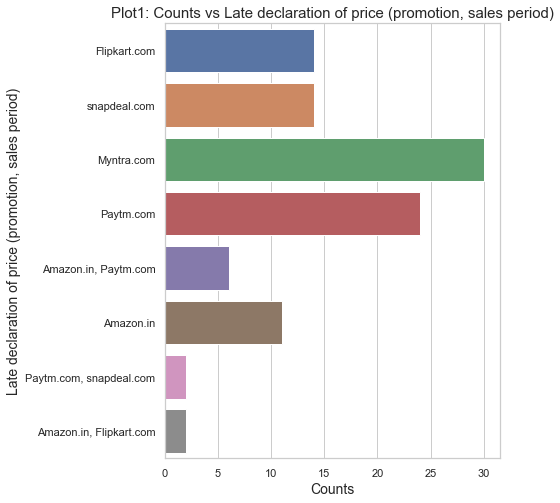

In [1773]:
#visualize this column by Countplot
plt.figure(figsize =(6,8))
sns.countplot(y = 'Late declaration of price (promotion, sales period)', data=df)
plt.ylabel('Late declaration of price (promotion, sales period)', fontsize = 14)
plt.xlabel('Counts', fontsize = 14)
plt.title("Plot1: Counts vs Late declaration of price (promotion, sales period)", fontsize = 15)

Observation:
1. In plot1, Myntra and paytm is good at Late declaration of price (promotion, sales period)

In [ ]:
#check the updated shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

# Column65:Longer page loading time (promotion, sales period)

In [1774]:
df['Longer page loading time (promotion, sales period)'].unique() #check the unique value

array(['Flipkart.com', 'Snapdeal.com', 'Myntra.com', 'Paytm.com',
       'Amazon.in, Paytm.com', 'Amazon.in, Flipkart.com',
       'Amazon.in, Snapdeal.com', 'Flipkart.com, Snapdeal.com',
       'Paytm.com, Snapdeal.com', 'Amazon.in',
       'Amazon.in, Paytm.com, Myntra.com'], dtype=object)

In [1775]:
df['Longer page loading time (promotion, sales period)'].value_counts()#check the count of unique value

Paytm.com                           27
Myntra.com                          22
Flipkart.com                        11
Amazon.in, Flipkart.com              8
Snapdeal.com                         8
Amazon.in, Paytm.com                 6
Amazon.in, Snapdeal.com              5
Flipkart.com, Snapdeal.com           5
Paytm.com, Snapdeal.com              5
Amazon.in                            4
Amazon.in, Paytm.com, Myntra.com     2
Name: Longer page loading time (promotion, sales period), dtype: int64

Text(0.5, 1.0, 'Plot1: Counts vs Longer page loading time (promotion, sales period)')

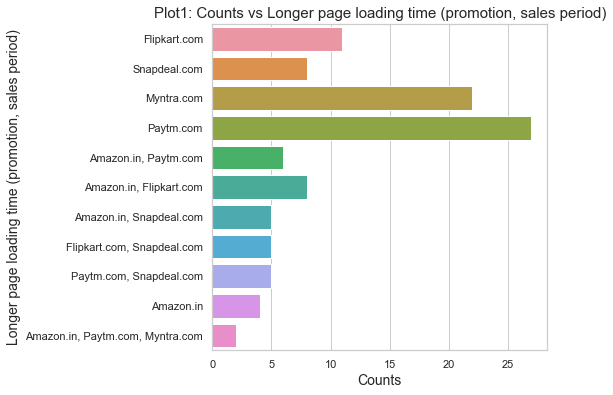

In [1780]:
#visualize this column by Countplot
plt.figure(figsize =(6,6))
sns.countplot(y = 'Longer page loading time (promotion, sales period)', data=df)
plt.ylabel('Longer page loading time (promotion, sales period)', fontsize = 14)
plt.xlabel('Counts', fontsize = 14)
plt.title("Plot1: Counts vs Longer page loading time (promotion, sales period)", fontsize = 15)

Observation:
1. In plot1, Myntra and paytm is good at Longer page loading time (promotion, sales period)

In [ ]:
#check the updated shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

# Column66:Limited mode of payment on most products (promotion, sales period)

In [1781]:
df['Limited mode of payment on most products (promotion, sales period)'].unique() #check the unique value

array(['Amazon.in', 'Snapdeal.com', 'Paytm.com', 'Amazon.in, Paytm.com',
       'Flipkart.com', 'Amazon.in, Flipkart.com',
       'Paytm.com, Snapdeal.com', 'Myntra.com, Snapdeal.com'],
      dtype=object)

In [1782]:
df['Limited mode of payment on most products (promotion, sales period)'].value_counts()#check the count of unique value

Snapdeal.com                33
Amazon.in                   22
Amazon.in, Flipkart.com     13
Flipkart.com                11
Paytm.com                   11
Amazon.in, Paytm.com         6
Paytm.com, Snapdeal.com      5
Myntra.com, Snapdeal.com     2
Name: Limited mode of payment on most products (promotion, sales period), dtype: int64

Text(0.5, 1.0, 'Plot1: Counts vs Limited mode of payment on most products (promotion, sales period)')

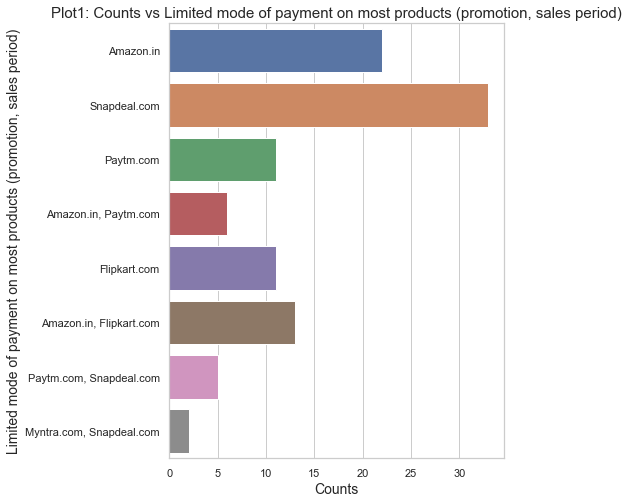

In [1786]:
#visualize this column by Countplot
plt.figure(figsize =(6,8))
sns.countplot(y = 'Limited mode of payment on most products (promotion, sales period)', data=df)
plt.ylabel('Limited mode of payment on most products (promotion, sales period)', fontsize = 14)
plt.xlabel('Counts', fontsize = 14)
plt.title("Plot1: Counts vs Limited mode of payment on most products (promotion, sales period)", fontsize = 15)

Observation:
1. In plot1, snapdeal is good at Limited mode of payment on most products (promotion, sales period)

In [1787]:
#check the updated shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (103, 71)


# Column67:Longer delivery period

In [1788]:
df['Longer delivery period'].unique() #check the unique value

array(['Paytm.com', 'Snapdeal.com', 'Flipkart.com', 'Amazon.in',
       'Paytm.com, Snapdeal.com', 'Myntra.com'], dtype=object)

In [1789]:
df['Longer delivery period'].value_counts()#check the count of unique value

Paytm.com                  32
Snapdeal.com               24
Flipkart.com               18
Amazon.in                  11
Paytm.com, Snapdeal.com    10
Myntra.com                  8
Name: Longer delivery period, dtype: int64

Text(0.5, 1.0, 'Plot1: Counts vs Longer delivery period')

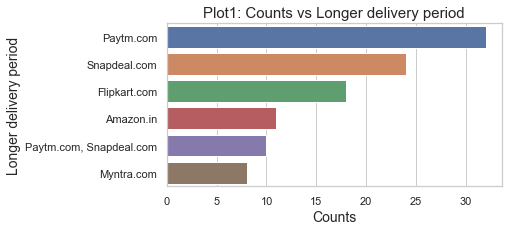

In [1791]:
#visualize this column by Countplot
plt.figure(figsize =(6,3))
sns.countplot(y = 'Longer delivery period', data=df)
plt.ylabel('Longer delivery period', fontsize = 14)
plt.xlabel('Counts', fontsize = 14)
plt.title("Plot1: Counts vs Longer delivery period", fontsize = 15)

Observation:
1. In plot1, Paytm has longer delivery period than others

In [ ]:
#check the updated shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

# Column68:Change in website/Application design

In [1792]:
df['Change in website/Application design'].unique() #check the unique value

array(['Flipkart.com', 'Amazon.in', 'Paytm.com',
       'Amazon.in, Flipkart.com', 'Myntra.com', 'Snapdeal.com',
       'Flipkart.com, Myntra.com'], dtype=object)

In [1793]:
df['Change in website/Application design'].value_counts()#check the count of unique value

Amazon.in                   38
Paytm.com                   23
Amazon.in, Flipkart.com     18
Myntra.com                  13
Flipkart.com                 7
Flipkart.com, Myntra.com     2
Snapdeal.com                 2
Name: Change in website/Application design, dtype: int64

Text(0.5, 1.0, 'Plot1: Counts vs Change in website/Application design')

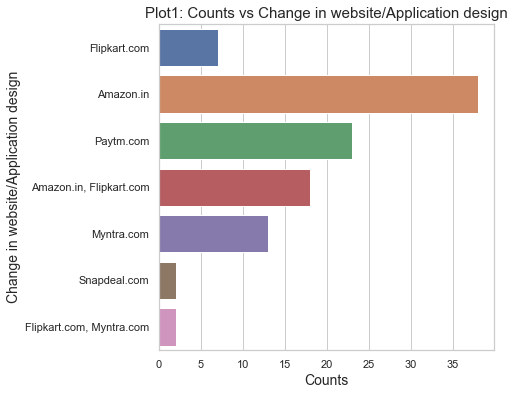

In [1796]:
#visualize this column by Countplot
plt.figure(figsize =(6,6))
sns.countplot(y = 'Change in website/Application design', data=df)
plt.ylabel('Change in website/Application design', fontsize = 14)
plt.xlabel('Counts', fontsize = 14)
plt.title("Plot1: Counts vs Change in website/Application design", fontsize = 15)

Observation:
1. In plot1, Amazon is better at Change in website/Application design

In [1797]:
#check the updated shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (103, 71)


# Column69:Frequent disruption when moving from one page to another

In [1798]:
df['Frequent disruption when moving from one page to another'].unique() #check the unique value

array(['Amazon.in', 'Myntra.com', 'Paytm.com', 'Amazon.in, Flipkart.com',
       'Snapdeal.com', 'Flipkart.com', 'Myntra.com, Snapdeal.com',
       'Flipkart.com, Snapdeal.com'], dtype=object)

In [1799]:
df['Frequent disruption when moving from one page to another'].value_counts()#check the count of unique value

Myntra.com                    21
Amazon.in                     19
Snapdeal.com                  18
Paytm.com                     14
Amazon.in, Flipkart.com       11
Flipkart.com                  10
Flipkart.com, Snapdeal.com     5
Myntra.com, Snapdeal.com       5
Name: Frequent disruption when moving from one page to another, dtype: int64

In [1801]:
#visualize this column by Countplot
plt.figure(figsize =(6,8))
sns.countplot(y = 'Frequent disruption when moving from one page to another', data=df)
plt.ylabel('Frequent disruption when moving from one page to another', fontsize = 14)
plt.xlabel('Counts', fontsize = 14)
plt.title("Plot1: Counts vs Frequent disruption when moving from one page to another", fontsize = 15)

Text(0.5, 1.0, 'Plot1: Counts vs Frequent disruption when moving from one page to another')

Observation:
1. In plot1, Amazon and Myntra has high Frequent disruption when moving from one page to another while Filpkart has low

In [1802]:
#check the updated shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (103, 71)


# Column70:Website is as efficient as before

In [1803]:
df['Website is as efficient as before'].unique() #check the unique value

array(['Amazon.in', 'Amazon.in, Flipkart.com',
       'Amazon.in, Flipkart.com, Paytm.com', 'Paytm.com', 'Snapdeal.com',
       'Myntra.com, Snapdeal.com', 'Flipkart.com', 'Amazon.in, Paytm.com'],
      dtype=object)

In [1804]:
df['Website is as efficient as before'].value_counts()#check the count of unique value

Amazon.in                             35
Flipkart.com                          17
Amazon.in, Flipkart.com               15
Amazon.in, Flipkart.com, Paytm.com    11
Paytm.com                              8
Amazon.in, Paytm.com                   7
Snapdeal.com                           5
Myntra.com, Snapdeal.com               5
Name: Website is as efficient as before, dtype: int64

In [1807]:
#visualize this column by Countplot
plt.figure(figsize =(6,6))
sns.countplot(y = 'Website is as efficient as before', data=df)
plt.ylabel('Website is as efficient as before', fontsize = 14)
plt.xlabel('Counts', fontsize = 14)
plt.title("Plot1: Counts vs Website is as efficient as before", fontsize = 15)

Text(0.5, 1.0, 'Plot1: Counts vs Website is as efficient as before')

Observation:
1. In plot1, Amazon website is more efficient than other

In [1808]:
#check the updated shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (103, 71)


# Column71:Which of the Indian online retailer would you recommend to a friend?

In [1809]:
df['Which of the Indian online retailer would you recommend to a friend?'].unique() #check the unique value

array(['Flipkart.com', 'Amazon.in, Myntra.com',
       'Amazon.in, Paytm.com, Myntra.com', 'Amazon.in, Flipkart.com',
       'Amazon.in, Paytm.com',
       'Flipkart.com, Paytm.com, Myntra.com, snapdeal.com', 'Amazon.in',
       'Amazon.in, Flipkart.com, Myntra.com'], dtype=object)

In [1810]:
df['Which of the Indian online retailer would you recommend to a friend?'].value_counts()#check the count of unique value

Amazon.in                                            28
Amazon.in, Flipkart.com                              22
Flipkart.com                                         15
Amazon.in, Myntra.com                                14
Amazon.in, Paytm.com, Myntra.com                      8
Amazon.in, Paytm.com                                  6
Amazon.in, Flipkart.com, Myntra.com                   5
Flipkart.com, Paytm.com, Myntra.com, snapdeal.com     5
Name: Which of the Indian online retailer would you recommend to a friend?, dtype: int64

In [1813]:
#visualize this column by Countplot
plt.figure(figsize =(6,9))
sns.countplot(y = 'Which of the Indian online retailer would you recommend to a friend?', data=df)
plt.ylabel('Which of the Indian online retailer would you recommend to a friend?', fontsize = 14)
plt.xlabel('Counts', fontsize = 14)
plt.title("Plot1: Counts vs Which of the Indian online retailer would you recommend to a friend?", fontsize = 15)

Text(0.5, 1.0, 'Plot1: Counts vs Which of the Indian online retailer would you recommend to a friend?')

Observation:
1. In plot1, Amazon is most recommendable website than others

In [1814]:
#check the updated shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (103, 71)
